<a href="https://www.kaggle.com/code/sahilprajapati143/retail-analysis-on-large-data-by-sahil-prajapati?scriptVersionId=183632453" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# "Revolutionizing Retail: Data-driven Decision Making with Python for Customer Behavior Analysis"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = 'plotly_dark'

#Data Gathering

In [2]:
df=pd.read_csv("/kaggle/input/retail-analysis-large-dataset/new_retail_data.csv")

In [3]:
df.shape

(302010, 30)

In [4]:
pd.set_option('display.max_columns', None) # here some columns was not showed so i was used display.max_columns  for see all columns data in my dataframe

In [5]:
df.head()

Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0  1.414787e+09            3959 Amanda Burgs    Dortmund           Berlin   
1  6.852900e+09           82072 Dawn Centers  Nottingham          England   
2  8.362160e+09            4133 Young Canyon     Geelong  New South Wales   
3  2.776752e+09  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4  9.098268e+09    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country   Age  Gender Income Customer_Segment        Date  \
0  77985.0    Germany  21.0    Male    Low          Regular   9/18/2023   
1  99071.0         UK  19.0  Female    Low          Premium  12/31/2023   
2  75929.0  Australia  48.0    Male    Low          Regular   4/26/2023   
3  88420.0     Canada  56.0    Male   High          Premium    5/8/2023   
4  48704.0         UK  22.0    Male    Low          Premium   1/10/2024   

     Year      Month      Time  Total_Purchases      Amount  Total_Amount  \
0  2023.0  September  22:03:55              3.0  108.028757    324.086270   
1  2023.0   December   8:42:04              2.0  403.353907    806.707815   
2  2023.0      April   4:06:29              3.0  354.477600   1063.432799   
3  2023.0        May  14:55:17              7.0  352.407717   2466.854021   
4  2024.0    January  16:54:07              2.0  124.276524    248.553049   

  Product_Category  Product_Brand Product_Type   Feedback Shipping_Method  \
0         Clothing           Nike       Shorts  Excellent        Same-Day   
1      Electronics        Samsung       Tablet  Excellent        Standard   
2            Books  Penguin Books   Children's    Average        Same-Day   
3       Home Decor     Home Depot        Tools  Excellent        Standard   
4          Grocery         Nestle    Chocolate        Bad        Standard   

  Payment_Method Order_Status  Ratings           products  
0     Debit Card      Shipped      5.0     Cycling shorts  
1    Credit Card   Processing      4.0         Lenovo Tab  
2    Credit Card   Processing      2.0   Sports equipment  
3         PayPal   Processing      4.0      Utility knife  
4           Cash      Shipped      1.0  Chocolate cookies

In [6]:
df.tail()

Transaction_ID  Customer_ID            Name                     Email  \
302005       4246475.0      12104.0    Meagan Ellis      Courtney60@gmail.com   
302006       1197603.0      69772.0     Mathew Beck      Jennifer71@gmail.com   
302007       7743242.0      28449.0      Daniel Lee  Christopher100@gmail.com   
302008       9301950.0      45477.0  Patrick Wilson       Rebecca65@gmail.com   
302009       2882826.0      53626.0  Dustin Merritt       William14@gmail.com   

               Phone                       Address        City  \
302005  7.466354e+09        389 Todd Path Apt. 159  Townsville   
302006  5.754305e+09             52809 Mark Forges     Hanover   
302007  9.382530e+09  407 Aaron Crossing Suite 495    Brighton   
302008  9.373222e+09               3204 Baird Port     Halifax   
302009  9.518927e+09           143 Amanda Crescent      Tucson   

                  State  Zipcode    Country   Age  Gender  Income  \
302005  New South Wales   4567.0  Australia  31.0    Male  Medium   
302006           Berlin  16852.0    Germany  35.0  Female     Low   
302007          England  88038.0         UK  41.0    Male     Low   
302008          Ontario  67608.0     Canada  41.0    Male  Medium   
302009    West Virginia  25242.0        USA  28.0  Female     Low   

       Customer_Segment        Date    Year      Month      Time  \
302005          Regular   1/20/2024  2024.0    January  23:40:29   
302006              New  12/28/2023  2023.0   December   2:55:45   
302007          Premium   2/27/2024  2024.0   February   2:43:49   
302008              New    9/3/2023  2023.0  September  11:20:31   
302009          Premium    1/8/2024  2024.0    January  11:44:36   

        Total_Purchases      Amount  Total_Amount Product_Category  \
302005              5.0  194.792597    973.962984            Books   
302006              1.0  285.137301    285.137301      Electronics   
302007              3.0   60.701761    182.105285         Clothing   
302008              1.0  120.834784    120.834784       Home Decor   
302009              7.0  340.319059   2382.233417       Home Decor   

        Product_Brand Product_Type   Feedback Shipping_Method Payment_Method  \
302005  Penguin Books      Fiction        Bad        Same-Day           Cash   
302006          Apple       Laptop  Excellent        Same-Day           Cash   
302007         Adidas       Jacket    Average         Express           Cash   
302008           IKEA    Furniture       Good        Standard           Cash   
302009     Home Depot  Decorations    Average        Same-Day           Cash   

       Order_Status  Ratings            products  
302005   Processing      1.0  Historical fiction  
302006   Processing      5.0             LG Gram  
302007      Shipped      2.0               Parka  
302008      Shipped      4.0            TV stand  
302009      Shipped      2.0              Clocks

In [7]:
df.info() #dataframe info represent the null , datatype of the columns present in dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

#Dataset Description:

##Dataset Description:
* The dataset represents retail transactional data. It contains information about customers, their purchases, products, and transaction details. The data includes various attributes such as customer ID, name, email, phone, address, city, state, zipcode, country, age, gender, income, customer segment, last purchase date, total purchases, amount spent, product category, product brand, product type, feedback, shipping method, payment method, and order status.

##Key Points:
##Customer Information:
* Includes customer details like ID, name, email, phone, address, city, state, zipcode, country, age, and gender.
Customer segments are categorized into Premium, Regular, and New.
##Transaction Details:
* Transaction-specific data such as transaction ID, last purchase date, total purchases, amount spent, total purchase amount, feedback, shipping method, payment method, and order status.
##Product Information:
* Contains product-related details such as product category, brand, and type.
Products are categorized into electronics, clothing, grocery, books, and home decor.
##Geographic Information:
* Contains location details including city, state, and country.
Available for various countries including USA, UK, Canada, Australia, and Germany.
##Temporal Information:
* Last purchase date is provided along with separate columns for year, month, date, and time.
Allows analysis based on temporal patterns and trends.
##Data Quality:
* Some rows contain null values, and others are duplicates, which may need to be handled during data preprocessing.
Null values are randomly distributed across rows.
Duplicate rows are available at different parts of the dataset.
##Potential Analysis:
* Customer segmentation analysis based on demographics, purchase behavior, and feedback.
Sales trend analysis over time to identify peak seasons or trends.
Product performance analysis to determine popular categories, brands, or types.
Geographic analysis to understand regional preferences and trends.
Payment and shipping method analysis to optimize services.
Customer satisfaction analysis based on feedback and order status.
##Data Preprocessing:
* Handling null values and duplicates.
Parsing and formatting temporal data.
Encoding categorical variables.
Scaling numerical variables if required.
Splitting data into training and testing sets for modeling.

#Columns Brief Description

## Transaction_ID:
* Type: int64
* Explanation: Unique identifier for each transaction.

## Customer_ID:
* Type: int64
* Explanation: Unique identifier for each customer.

## Name:
* Type: object
* Explanation: Name of the customer.

## Email:
* Type: object
* Explanation: Email address of the customer.

## Phone:
* Type: object
* Explanation: Phone number of the customer.

## Address:
* Type: object
* Explanation: Address of the customer.

## City:
* Type: object
* Explanation: City where the customer resides.

## State:
* Type: object
* Explanation: State where the customer resides.

## Zipcode:
* Type: object
* Explanation: Zip code of the customer's address.

## Country:
* Type: object
* Explanation: Country where the customer resides.

## Age:
* Type: int64
* Explanation: Age of the customer.

## Gender:
* Type: object
* Explanation: Gender of the customer.

## Income:
* Type: object
* Explanation: Income level of the customer.

## Customer_Segment:
* Type: object
* Explanation: Segment of the customer (e.g., Premium, Regular, New).

## Year:
* Type: int64
* Explanation: Year component extracted from the last purchase date.

## Month:
* Type: object
* Explanation: Month component extracted from the last purchase date.

## Date:
* Type: object
* Explanation: Date component extracted from the last purchase date.

## Time:
* Type: object
* Explanation: Time component extracted from the last purchase date.

## Total_Purchases:
* Type: int64
* Explanation: Total number of purchases made by the customer.

## Amount:
* Type: float64
* Explanation: Amount spent in a single transaction.

## Total_Purchase_Amount:
* Type: float64
* Explanation: Total amount spent by the customer (calculated as Amount * Total_Purchases).

## Product_Category:
* Type: object
* Explanation: Category of the purchased product.

## Product_Brand:
* Type: object
* Explanation: Brand of the purchased product.

## Product_Type:
* Type: object
* Explanation: Type of the purchased product.

## Feedback:
* Type: object
* Explanation: Feedback provided by the customer on the purchase.

## Shipping_Method:
* Type: object
* Explanation: Method used for shipping the product.

## Payment_Method:
* Type: object
* Explanation: Method used for payment.

## Order_Status:
* Type: object
* Explanation: Status of the order (e.g., Pending, Processing, Shipped, Delivered).


#Some additional information that can be derived from the dataset:
* These insights can aid in making data-driven decisions to improve overall business performance and enhance the customer experience.



##Customer demographics:

Analyzing the distribution of age, gender, and income level among customers can provide insights into the target demographic for the retail business.
Segmentation by demographic factors can help in personalized marketing and product recommendations.
##Purchase behavior:

Understanding the frequency of purchases, average transaction amount, and total purchase amount per customer segment can help in tailoring marketing strategies.
Customer segmentation based on purchase behavior can aid in creating targeted promotions and loyalty programs.
##Geographical analysis:

Examining sales performance across different countries, states, and cities can identify regions with high customer engagement and potential areas for expansion.
Geographic analysis can reveal regional preferences, cultural influences, and market trends.
##Product performance:

Evaluating the popularity of product categories, brands, and types based on sales volume and customer feedback can guide inventory management and product assortment decisions.
Analysis of product performance can identify best-selling items, slow-moving inventory, and opportunities for product diversification.
##Customer satisfaction:

Assessing feedback provided by customers can highlight areas for improvement in product quality, service, or overall shopping experience.
Customer satisfaction surveys and sentiment analysis can uncover insights into customer preferences and pain points.
##Shipping and payment preferences:

Analyzing the preferred shipping and payment methods among customers can optimize logistics and payment processing operations.
Offering flexible shipping options and secure payment gateways can enhance the overall shopping experience.
##Order fulfillment:

Monitoring the order status distribution can help in streamlining the order fulfillment process and reducing delivery times.
Efficient order processing and timely delivery are crucial for customer satisfaction and retention.
##Seasonal trends:

Identifying seasonal variations in purchase behavior and product demand can inform marketing campaigns and inventory planning for seasonal products.
Seasonal promotions, discounts, and themed campaigns can capitalize on seasonal trends and consumer spending patterns.
##Customer retention:

Tracking customer churn rates and analyzing factors contributing to customer retention can guide efforts to enhance customer loyalty and repeat business.
Implementing customer retention strategies such as loyalty programs, personalized offers, and proactive customer support can foster long-term relationships with customers.







#Issues with the dataset

## 1.Dirty Data :

`table`:real_retail_data_project :
* 1.In `City` Column some city name having like this type :MÃ¼nster,St. John's,DÃ¼sseldorf instead of : "Düsseldorf"-`Accuracy`
* 2.In So Many Columns Having NAN OR Blank Values in Dataset so it has :- `Completeness`issues
* Some country zipcode has 4 digit and same those country again have 5 digit zipcode in dataset so it is nessesary to have code with 5 numbers  :`Consistancy` issue
* The inconsistency in representing country names, where some are abbreviated (e.g., "USA", "UK") while others are spelled out in full (e.g., "Germany"), falls under the `"Completeness"` dimension of data quality.: `Completeness Isue`
* Transaction_ID and Customer_ID should be integers or strings without decimal points (`Accuracy`).
* Phone and Zipcode should ideally be strings to retain leading zeros if applicable (`Accuracy`).
* Age should be represented as integers within a reasonable range (`Validity`).
* Names, addresses, city, state, country, gender, income, customer segment, product category, product brand, product type, feedback, shipping method, payment method, and order status should be properly formatted strings (`Consistency`).
* Date-related fields should be consistent and properly formatted for temporal analysis (`Accuracy`).
* Total_Purchases should be integers, and Amount, Total_Amount should be floats without negative values (`Accuracy`).


## 2.Messy Data :


* City names containing special characters or incorrect encoding (e.g., MÃ¼nster, St. John's, DÃ¼sseldorf).
* Columns with missing or blank values, such as NaNs, in the dataset.
* Inconsistent zip code lengths within the same country (e.g., some zip codes have 4 digits while others have 5 digits).
* Inconsistent representation of country names, with some abbreviated (e.g., "USA", "Germany") and others spelled out in full (e.g., "United Kingdom").
* Transaction_ID and Customer_ID columns containing decimal points or non-integer values.
* Phone and Zipcode columns represented as numeric types instead of strings, potentially losing leading zeros.
* Age values not within a reasonable integer range.
* Columns containing improperly formatted strings, such as names, addresses, gender, income, customer segment, product category, product brand, product
type, feedback, shipping method, payment method, and order status.
* Inconsistent formatting and representation of date-related fields.
* Total_Purchases column containing non-integer values, and Amount and Total_Amount columns containing negative values.


##Summary

* Accuracy: Incorrect character encoding, Transaction_ID and Customer_ID format, phone and zipcode formatting, date-related fields, and numeric fields like Amount and Total_Amount.
* Completeness: Missing values (NaNs or blanks).
* Consistency: Inconsistent zip code lengths, inconsistent country name representations, properly formatted strings for various text fields.
* Validity: Age values within a reasonable range.

# Data Assessment :
#1.Manual Assessment:

##Transaction_ID:

This column appears to be a unique identifier for each transaction. It's of type float64, but it might be more appropriate as an integer type since transaction IDs are typically whole numbers.
##Customer_ID:

Similar to Transaction_ID, this column seems to be a unique identifier for each customer. It's also of type float64, but it should be integer as well for consistency and efficiency.
##Name:

Contains the names of customers. It's expected to be of string data type, which is suitable for storing textual information like names.
##Email:

Stores the email addresses of customers. Should be of string data type, as email addresses are textual data.
##Phone:

Represents the phone numbers of customers. Could be either integer or string data type. Depending on the dataset, phone numbers might contain leading zeros or special characters, so storing them as strings could prevent data loss or formatting issues.
##Address:

Contains the address of customers. Expected to be of string data type. Like names and email addresses, addresses are textual data and are best stored as strings.
##City:

Stores the city names where customers reside. It should be of string data type since city names are textual information.
##State:

Represents the state names where customers reside. Should be of string data type, as state names are textual data.
##Zipcode:

Contains the zip codes of customer addresses. Could be either integer or string data type. While zip codes are numerical in nature, they might include leading zeros, so storing them as strings could be more appropriate.
##Country:

Stores the country names where customers reside. Expected to be of string data type, as country names are textual information.
##Age:

Represents the age of customers. Should be of integer data type, as age is typically represented as whole numbers.
##Gender:

Contains the gender information of customers. Expected to be of string data type. Gender is categorical and can be represented as strings such as "Male," "Female," or "Other."
##Income:

Represents the income level of customers. Should be of string data type. Income levels might be categorical (e.g., "Low," "Medium," "High") or numerical, but storing them as strings allows for flexibility in encoding different income brackets.
##Customer_Segment:

Indicates the segment of customers (e.g., Premium, Regular, New). Expected to be of string data type, as customer segments are categorical.
##Last_Purchase_Date:

Represents the date of the customer's last purchase. Should be split into separate columns for year, month, date, and time. Each component should be of appropriate data types (e.g., int64 for year, object for month, date, and time).
##Total_Purchases:

Contains the total number of purchases made by each customer. Should be of integer data type since it represents whole numbers.
##Amount:

Represents the amount spent in a single transaction. Should be of float data type to accommodate decimal values for monetary amounts.
##Total_Purchase_Amount:

Contains the total amount spent by each customer (calculated as Amount * Total_Purchases). Should be of float data type, similar to Amount, to accommodate decimal values.
##Product_Category:

Indicates the category of the purchased product. Expected to be of string data type, as product categories are categorical.
##Product_Brand:

Stores the brand of the purchased product. Should be of string data type, as product brands are textual information.
##Product_Type:

Represents the type of the purchased product. Expected to be of string data type, as product types are categorical.
##Feedback:

Contains the feedback provided by customers on the purchase. Should be of string data type to store textual feedback.
##Shipping_Method:

Indicates the method used for shipping the product. Expected to be of string data type, as shipping methods are categorical.
##Payment_Method:

Represents the method used for payment. Expected to be of string data type, as payment methods are categorical.
##Order_Status:

Indicates the status of the order (e.g., Pending, Processing, Shipped, Delivered). Expected to be of string data type, as order statuses are categorical.

#Main problem solutions for manual correction. After this is solved, we will again check the information of the data.

* Duplicates Removal: Identify and drop duplicate rows based on unique identifiers like Transaction_ID and Customer_ID.

* Data Type Conversion: Convert Phone and Zipcode columns to string data or int type to preserve leading zeros and maintain consistency.

* Date Conversion: Convert Last_Purchase_Date column to datetime format for easier manipulation and analysis.

* Data Type Consistency Check: Ensure Age, Total_Purchases, and Amount columns are of appropriate data types (integers or floats) for consistency.

* Categorical Columns Conversion: Convert all categorical columns to string data type to ensure uniformity and compatibility for analysis.

#2.Automatic Assesssment:

* head and tail
* sample
* info
* isnull
* duplicated
* describe

In [8]:
df.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [9]:
df.duplicated().sum()

4

In [10]:
df[df.duplicated].head()

Transaction_ID  Customer_ID             Name                  Email  \
299759       4476510.0      20103.0    Christine Kim      James11@gmail.com   
301094       5340129.0      29920.0     Collin Davis   Courtney47@gmail.com   
301362       4942326.0      25416.0    Pamela Martin  Christine83@gmail.com   
301486       3200766.0      49598.0  Mikayla Mueller    Kenneth43@gmail.com   

               Phone                       Address        City  \
299759  2.383778e+09   8176 Randy Squares Apt. 772   Kitchener   
301094  4.087767e+09  371 Cynthia Drives Suite 699  Wollongong   
301362  6.657934e+09             9851 Myers Tunnel   Leicester   
301486  6.980439e+09    716 Joshua Rapids Apt. 790      Bremen   

                  State  Zipcode    Country   Age  Gender Income  \
299759          Ontario   7099.0     Canada  54.0  Female    Low   
301094  New South Wales  47758.0  Australia  54.0    Male    Low   
301362          England  57655.0         UK  63.0    Male    Low   
301486           Berlin  64747.0    Germany  59.0    Male    Low   

       Customer_Segment        Date    Year     Month      Time  \
299759          Regular  12/10/2023  2023.0  December   1:09:09   
301094              New  12/19/2023  2023.0  December  11:33:48   
301362          Regular    5/5/2023  2023.0       May   4:17:21   
301486              New  11/23/2023  2023.0  November  15:35:49   

        Total_Purchases      Amount  Total_Amount Product_Category  \
299759              7.0  134.374182    940.619277         Clothing   
301094              6.0         NaN   2201.568075          Grocery   
301362              8.0  191.906886   1535.255087         Clothing   
301486              9.0  272.327418   2450.946762          Grocery   

       Product_Brand Product_Type   Feedback Shipping_Method Payment_Method  \
299759        Adidas      T-shirt        Bad         Express    Credit Card   
301094         Pepsi   Soft Drink  Excellent         Express           Cash   
301362        Adidas       Jacket    Average        Same-Day           Cash   
301486         Pepsi   Soft Drink        Bad        Standard           Cash   

       Order_Status  Ratings              products  
299759   Processing      1.0  Off-the-shoulder tee  
301094    Delivered      4.0           Fruit punch  
301362      Pending      2.0        Varsity jacket  
301486      Pending      1.0              Iced tea

In [11]:
df.describe()

Transaction_ID    Customer_ID         Phone        Zipcode  \
count    3.016770e+05  301702.000000  3.016480e+05  301670.000000   
mean     5.495823e+06   55006.553934  5.501464e+09   50298.951019   
std      2.595565e+06   26005.675200  2.596017e+09   28972.807134   
min      1.000007e+06   10000.000000  1.000049e+09     501.000000   
25%      3.247930e+06   32469.250000  3.255061e+09   25425.000000   
50%      5.499657e+06   55012.000000  5.505812e+09   50602.500000   
75%      7.739509e+06   77511.000000  7.749860e+09   75252.000000   
max      9.999995e+06   99999.000000  9.999996e+09   99949.000000   

                 Age           Year  Total_Purchases         Amount  \
count  301837.000000  301660.000000    301649.000000  301653.000000   
mean       35.481326    2023.165113         5.359729     255.163659   
std        15.021933       0.371283         2.868575     141.389640   
min        18.000000    2023.000000         1.000000      10.000219   
25%        22.000000    2023.000000         3.000000     132.890764   
50%        32.000000    2023.000000         5.000000     255.470969   
75%        46.000000    2023.000000         8.000000     377.672606   
max        70.000000    2024.000000        10.000000     499.997911   

        Total_Amount        Ratings  
count  301660.000000  301826.000000  
mean     1367.651156       3.162670  
std      1128.998515       1.320827  
min        10.003750       1.000000  
25%       438.724278       2.000000  
50%      1041.117547       3.000000  
75%      2029.999853       4.000000  
max      4999.625796       5.000000

#Manual Assessment Problems Solution Codes. :

* Rename Inaccurate to Accurate Values

In [12]:
#Rename The city Columns That Having in Accurate Values

# Replace incorrect city names

df['City'] = df['City'].str.replace("MÃ¼nster", "Münster")
df['City'] = df['City'].str.replace("St. John's", "St. Johns")
df['City'] = df['City'].str.replace("DÃ¼sseldorf", "Düsseldorf")

* Solving Zipcode Issues with numbers

In [13]:
df['Zipcode'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 302010 entries, 0 to 302009
Series name: Zipcode
Non-Null Count   Dtype  
--------------   -----  
301670 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [14]:
mean_zipcode = df['Zipcode'].mean()
mean_zipcode

50298.95101932575

In [15]:
df['Zipcode'].fillna(mean_zipcode, inplace=True)

# Convert 'Zipcode' to integers
df['Zipcode'] = df['Zipcode'].astype(np.int64)

/tmp/ipykernel_18/1451050977.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Zipcode'].fillna(mean_zipcode, inplace=True)


In [16]:
# Count occurrences of zip codes with 4 digits
zip_4_digits_count = (df['Zipcode'].astype(str).str.len() == 4).sum()

# Count occurrences of zip codes with 5 digits
zip_5_digits_count = (df['Zipcode'].astype(str).str.len() ==5).sum()

total_zipcodes = len(df)

zip_4_digits_percentage = (zip_4_digits_count / total_zipcodes) * 100

zip_5_digits_percentage = (zip_5_digits_count / total_zipcodes) * 100


In [17]:
print("Number of 4-digit zip codes:", zip_4_digits_count)
print("Number of 5-digit zip codes:", zip_5_digits_count)
print("Percentage of 4-digit zip codes:", zip_4_digits_percentage)
print("Percentage of 5-digit zip codes:", zip_5_digits_percentage)

Number of 4-digit zip codes: 30347
Number of 5-digit zip codes: 270487
Percentage of 4-digit zip codes: 10.048342770106949
Percentage of 5-digit zip codes: 89.56226615012748


In [18]:
# Convert 'Zipcode' column  integer to string for perform 4 digit to 5 digit strip ope..
df['Zipcode'] = df['Zipcode'].astype(str)

In [19]:
#here we check first  persentage wich one zipcode has more in data set based on it we remove less persentage number zip code bcz it is not consistance ...

import random

# Trim any leading or trailing whitespace
df['Zipcode'] = df['Zipcode'].str.strip()
zip_5_digits = df['Zipcode'].str.len().eq(5).sum()

zip_4_digits = df['Zipcode'].str.len().eq(4)

if zip_4_digits.any():
    df.loc[zip_4_digits, 'Zipcode'] += df[zip_4_digits].apply(lambda x: str(random.randint(0, 9)))


In [20]:
mean_zipcode = df['Zipcode'].astype(float).mean()
df['Zipcode'] = df['Zipcode'].fillna(mean_zipcode)

# Convert 'Zipcode' to integers
df['Zipcode'] = df['Zipcode'].astype(int)

In [21]:
df.head(2)

Transaction_ID  Customer_ID                 Name              Email  \
0       8691788.0      37249.0  Michelle Harrington  Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill   Mark36@gmail.com   

          Phone             Address        City    State  Zipcode  Country  \
0  1.414787e+09   3959 Amanda Burgs    Dortmund   Berlin    77985  Germany   
1  6.852900e+09  82072 Dawn Centers  Nottingham  England    99071       UK   

    Age  Gender Income Customer_Segment        Date    Year      Month  \
0  21.0    Male    Low          Regular   9/18/2023  2023.0  September   
1  19.0  Female    Low          Premium  12/31/2023  2023.0   December   

       Time  Total_Purchases      Amount  Total_Amount Product_Category  \
0  22:03:55              3.0  108.028757    324.086270         Clothing   
1   8:42:04              2.0  403.353907    806.707815      Electronics   

  Product_Brand Product_Type   Feedback Shipping_Method Payment_Method  \
0          Nike       Shorts  Excellent        Same-Day     Debit Card   
1       Samsung       Tablet  Excellent        Standard    Credit Card   

  Order_Status  Ratings        products  
0      Shipped      5.0  Cycling shorts  
1   Processing      4.0      Lenovo Tab

In [22]:
df['Zipcode'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 302010 entries, 0 to 302009
Series name: Zipcode
Non-Null Count   Dtype
--------------   -----
302010 non-null  int64
dtypes: int64(1)
memory usage: 2.3 MB


* Now we solved Countries Completeness Issue

In [23]:
# Rename country names
country = {"USA": "United States of America", "UK": "United Kingdom"}
df['Country'] = df['Country'].map(country).fillna(df['Country'])  #we also fill nan values with country name ...using fillna

In [24]:
df.head(2)

Transaction_ID  Customer_ID                 Name              Email  \
0       8691788.0      37249.0  Michelle Harrington  Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill   Mark36@gmail.com   

          Phone             Address        City    State  Zipcode  \
0  1.414787e+09   3959 Amanda Burgs    Dortmund   Berlin    77985   
1  6.852900e+09  82072 Dawn Centers  Nottingham  England    99071   

          Country   Age  Gender Income Customer_Segment        Date    Year  \
0         Germany  21.0    Male    Low          Regular   9/18/2023  2023.0   
1  United Kingdom  19.0  Female    Low          Premium  12/31/2023  2023.0   

       Month      Time  Total_Purchases      Amount  Total_Amount  \
0  September  22:03:55              3.0  108.028757    324.086270   
1   December   8:42:04              2.0  403.353907    806.707815   

  Product_Category Product_Brand Product_Type   Feedback Shipping_Method  \
0         Clothing          Nike       Shorts  Excellent        Same-Day   
1      Electronics       Samsung       Tablet  Excellent        Standard   

  Payment_Method Order_Status  Ratings        products  
0     Debit Card      Shipped      5.0  Cycling shorts  
1    Credit Card   Processing      4.0      Lenovo Tab

* Now we convert cust_id and trans_id float to int

In [25]:
# Calculate the mean of 'Transaction_ID' and 'Customer_ID'
mean_transaction_id = df['Transaction_ID'].astype(float).mean()
mean_customer_id = df['Customer_ID'].astype(float).mean()

# Fill NaN values with the mean
df['Transaction_ID'].fillna(mean_transaction_id, inplace=True)
df['Customer_ID'].fillna(mean_customer_id, inplace=True)

# Convert 'Transaction_ID' and 'Customer_ID' to integers
df['Transaction_ID'] = df['Transaction_ID'].astype(int)
df['Customer_ID'] = df['Customer_ID'].astype(int)

/tmp/ipykernel_18/457797147.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Transaction_ID'].fillna(mean_transaction_id, inplace=True)
/tmp/ipykernel_18/457797147.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [26]:
df.head(2)

Transaction_ID  Customer_ID                 Name              Email  \
0         8691788        37249  Michelle Harrington  Ebony39@gmail.com   
1         2174773        69749          Kelsey Hill   Mark36@gmail.com   

          Phone             Address        City    State  Zipcode  \
0  1.414787e+09   3959 Amanda Burgs    Dortmund   Berlin    77985   
1  6.852900e+09  82072 Dawn Centers  Nottingham  England    99071   

          Country   Age  Gender Income Customer_Segment        Date    Year  \
0         Germany  21.0    Male    Low          Regular   9/18/2023  2023.0   
1  United Kingdom  19.0  Female    Low          Premium  12/31/2023  2023.0   

       Month      Time  Total_Purchases      Amount  Total_Amount  \
0  September  22:03:55              3.0  108.028757    324.086270   
1   December   8:42:04              2.0  403.353907    806.707815   

  Product_Category Product_Brand Product_Type   Feedback Shipping_Method  \
0         Clothing          Nike       Shorts  Excellent        Same-Day   
1      Electronics       Samsung       Tablet  Excellent        Standard   

  Payment_Method Order_Status  Ratings        products  
0     Debit Card      Shipped      5.0  Cycling shorts  
1    Credit Card   Processing      4.0      Lenovo Tab

* Converting Phone number Float to int

In [27]:
df['Phone'].fillna(df['Phone'].astype(float).mean(), inplace=True)

df['Phone'] = df['Phone'].astype(int)

/tmp/ipykernel_18/2035507288.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Phone'].fillna(df['Phone'].astype(float).mean(), inplace=True)


In [28]:
df.head(1)

Transaction_ID  Customer_ID                 Name              Email  \
0         8691788        37249  Michelle Harrington  Ebony39@gmail.com   

        Phone            Address      City   State  Zipcode  Country   Age  \
0  1414786801  3959 Amanda Burgs  Dortmund  Berlin    77985  Germany  21.0   

  Gender Income Customer_Segment       Date    Year      Month      Time  \
0   Male    Low          Regular  9/18/2023  2023.0  September  22:03:55   

   Total_Purchases      Amount  Total_Amount Product_Category Product_Brand  \
0              3.0  108.028757     324.08627         Clothing          Nike   

  Product_Type   Feedback Shipping_Method Payment_Method Order_Status  \
0       Shorts  Excellent        Same-Day     Debit Card      Shipped   

   Ratings        products  
0      5.0  Cycling shorts

* Age,Total_Purchases,year float to int

In [29]:
df['Age'].fillna(df['Age'].astype(float).mean(), inplace=True)                   # here we fill NAN values with mean of the columns
df['Total_Purchases'].fillna(df['Total_Purchases'].astype(float).mean(), inplace=True)
df['Year'].fillna(df['Year'].astype(float).mean(), inplace=True)


df['Age'] = df['Age'].astype(int)
df['Total_Purchases'] = df['Total_Purchases'].astype(int)
df['Year'] = df['Year'].astype(int)

/tmp/ipykernel_18/3080454338.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].astype(float).mean(), inplace=True)                   # here we fill NAN values with mean of the columns
/tmp/ipykernel_18/3080454338.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [30]:
# Remove rows with negative Total_Purchases, Amount, and Total_Amount values
df = df[(df['Total_Purchases'] >= 0) & (df['Amount'] >= 0) & (df['Total_Amount'] >= 0)]

In [31]:
#converting date , year ,time into datetime datatype formate

df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
df['Time'] = pd.to_datetime(df['Time']).dt.strftime('%H:%M:%S')


/tmp/ipykernel_18/428185771.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.strftime('%H:%M:%S')


In [32]:
df.head(3)

Transaction_ID  Customer_ID                 Name              Email  \
0         8691788        37249  Michelle Harrington  Ebony39@gmail.com   
1         2174773        69749          Kelsey Hill   Mark36@gmail.com   
2         6679610        30192         Scott Jensen  Shane85@gmail.com   

        Phone             Address        City            State  Zipcode  \
0  1414786801   3959 Amanda Burgs    Dortmund           Berlin    77985   
1  6852899987  82072 Dawn Centers  Nottingham          England    99071   
2  8362160449   4133 Young Canyon     Geelong  New South Wales    75929   

          Country  Age  Gender Income Customer_Segment        Date  Year  \
0         Germany   21    Male    Low          Regular  2023-09-18  2023   
1  United Kingdom   19  Female    Low          Premium  2023-12-31  2023   
2       Australia   48    Male    Low          Regular  2023-04-26  2023   

       Month      Time  Total_Purchases      Amount  Total_Amount  \
0  September  22:03:55                3  108.028757    324.086270   
1   December  08:42:04                2  403.353907    806.707815   
2      April  04:06:29                3  354.477600   1063.432799   

  Product_Category  Product_Brand Product_Type   Feedback Shipping_Method  \
0         Clothing           Nike       Shorts  Excellent        Same-Day   
1      Electronics        Samsung       Tablet  Excellent        Standard   
2            Books  Penguin Books   Children's    Average        Same-Day   

  Payment_Method Order_Status  Ratings          products  
0     Debit Card      Shipped      5.0    Cycling shorts  
1    Credit Card   Processing      4.0        Lenovo Tab  
2    Credit Card   Processing      2.0  Sports equipment

In [33]:
#useing interpolate for filling missing values with available values
df['Total_Purchases'] = df['Total_Purchases'].interpolate(direction='both')
df['Amount'] = df['Amount'].interpolate(direction='both')

df['Total_Amount'] = df['Total_Purchases'] * df['Amount']

#Dropping Null Values Or Fill it

In [34]:
# Calculate the percentage of null values in each column
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage

Transaction_ID      0.000000
Customer_ID         0.000000
Name                0.126450
Email               0.115166
Phone               0.000000
Address             0.104546
City                0.082309
State               0.092598
Zipcode             0.000000
Country             0.089610
Age                 0.000000
Gender              0.104877
Income              0.096248
Customer_Segment    0.071357
Date                0.118817
Year                0.000000
Month               0.090274
Time                0.115830
Total_Purchases     0.000000
Amount              0.000000
Total_Amount        0.000000
Product_Category    0.093925
Product_Brand       0.093261
Product_Type        0.000000
Feedback            0.061068
Shipping_Method     0.110851
Payment_Method      0.098572
Order_Status        0.077994
Ratings             0.061068
products            0.000000
dtype: float64

In [35]:
# Now I Fill the null values through the mean and mode forthe numerical and categorical columns so it was help me for next time my statestical and other mathematical operation

# Fill null values in numerical columns with mean                                      #mean fill values like :if you have 1,2,NAN,4,5 then avg 1to5(1+2+4+5)/4=values...is fill in our NAN val...
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())



In [36]:
# Fill null values in categorical columns with mode                                      #same in Categorical col of you have more time some values then it was getting mode from it ...
categorical_cols = df.select_dtypes(include=['object']).columns                          # like : red,blue,gree,red  : then mode id red it was fill in : NAN values ......
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [37]:
cat_columns = df.select_dtypes(include=['object']).columns
for col in cat_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipykernel_18/3685648931.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [38]:
df.isnull().sum()

Transaction_ID      0
Customer_ID         0
Name                0
Email               0
Phone               0
Address             0
City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64

In [39]:
#if you want to fill numerical nan values then other method is : interpolate

In [40]:
df.shape

(301304, 30)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301304 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301304 non-null  int64  
 1   Customer_ID       301304 non-null  int64  
 2   Name              301304 non-null  object 
 3   Email             301304 non-null  object 
 4   Phone             301304 non-null  int64  
 5   Address           301304 non-null  object 
 6   City              301304 non-null  object 
 7   State             301304 non-null  object 
 8   Zipcode           301304 non-null  int64  
 9   Country           301304 non-null  object 
 10  Age               301304 non-null  int64  
 11  Gender            301304 non-null  object 
 12  Income            301304 non-null  object 
 13  Customer_Segment  301304 non-null  object 
 14  Date              301304 non-null  object 
 15  Year              301304 non-null  int64  
 16  Month             301304 

In [42]:
df.describe()

Transaction_ID    Customer_ID         Phone        Zipcode  \
count    3.013040e+05  301304.000000  3.013040e+05  301304.000000   
mean     5.495707e+06   55005.797331  5.501396e+09   55329.072365   
std      2.594075e+06   25993.484904  2.594447e+09   24719.791270   
min      1.000007e+06   10000.000000  1.000049e+09     501.000000   
25%      3.250671e+06   32487.000000  3.257246e+09   35477.750000   
50%      5.495822e+06   55006.000000  5.501464e+09   55332.000000   
75%      7.737070e+06   77489.000000  7.747494e+09   75204.000000   
max      9.999995e+06   99999.000000  9.999996e+09   99949.000000   

                 Age           Year  Total_Purchases         Amount  \
count  301304.000000  301304.000000    301304.000000  301304.000000   
mean       35.480083    2023.164930         5.359541     255.156504   
std        15.018428       0.371118         2.866895     141.392091   
min        18.000000    2023.000000         1.000000      10.000219   
25%        22.000000    2023.000000         3.000000     132.869731   
50%        32.000000    2023.000000         5.000000     255.455298   
75%        46.000000    2023.000000         8.000000     377.668757   
max        70.000000    2024.000000        10.000000     499.997911   

        Total_Amount        Ratings  
count  301304.000000  301304.000000  
mean     1367.656729       3.162706  
std      1128.582828       1.320448  
min        10.003750       1.000000  
25%       438.991216       2.000000  
50%      1041.660980       3.000000  
75%      2029.952956       4.000000  
max      4999.625796       5.000000

In [43]:
df[df['Total_Purchases']==8].head(1)

Transaction_ID  Customer_ID         Name               Email       Phone  \
8         4155845        80175  Diane Clark  Martin39@gmail.com  6219779557   

                        Address        City            State  Zipcode  \
8  8823 Mariah Heights Apt. 263  Wollongong  New South Wales    39820   

     Country  Age Gender  Income Customer_Segment        Date  Year    Month  \
8  Australia   46   Male  Medium              New  2024-01-06  2024  January   

       Time  Total_Purchases      Amount  Total_Amount Product_Category  \
8  14:38:26                8  328.839302   2630.714414          Grocery   

  Product_Brand Product_Type Feedback Shipping_Method Payment_Method  \
8        Nestle    Chocolate      Bad        Same-Day           Cash   

  Order_Status  Ratings        products  
8    Delivered      1.0  Dark chocolate

#Cheking Duplicate Values

In [44]:
df.duplicated().sum()

3

In [45]:
df.columns

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [46]:
df[df.duplicated()].head()

Transaction_ID  Customer_ID             Name                  Email  \
299759         4476510        20103    Christine Kim      James11@gmail.com   
301362         4942326        25416    Pamela Martin  Christine83@gmail.com   
301486         3200766        49598  Mikayla Mueller    Kenneth43@gmail.com   

             Phone                      Address       City    State  Zipcode  \
299759  2383777672  8176 Randy Squares Apt. 772  Kitchener  Ontario    55332   
301362  6657933964            9851 Myers Tunnel  Leicester  England    57655   
301486  6980439265   716 Joshua Rapids Apt. 790     Bremen   Berlin    64747   

               Country  Age  Gender Income Customer_Segment        Date  Year  \
299759          Canada   54  Female    Low          Regular  2023-12-10  2023   
301362  United Kingdom   63    Male    Low          Regular  2023-05-05  2023   
301486         Germany   59    Male    Low              New  2023-11-23  2023   

           Month      Time  Total_Purchases      Amount  Total_Amount  \
299759  December  01:09:09                7  134.374182    940.619277   
301362       May  04:17:21                8  191.906886   1535.255087   
301486  November  15:35:49                9  272.327418   2450.946762   

       Product_Category Product_Brand Product_Type Feedback Shipping_Method  \
299759         Clothing        Adidas      T-shirt      Bad         Express   
301362         Clothing        Adidas       Jacket  Average        Same-Day   
301486          Grocery         Pepsi   Soft Drink      Bad        Standard   

       Payment_Method Order_Status  Ratings              products  
299759    Credit Card   Processing      1.0  Off-the-shoulder tee  
301362           Cash      Pending      2.0        Varsity jacket  
301486           Cash      Pending      1.0              Iced tea

In [47]:
# Before removing duplicates
print("Shape of DataFrame before removing duplicates:", df.shape)

# Keep only the first occurrence of each duplicated row and remove the rest so it was perfectly removed duplicates from df...
df.drop_duplicates(subset=['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status'], keep='first', inplace=True)

# After removing duplicates
print("Shape of DataFrame after removing duplicates:", df.shape)


Shape of DataFrame before removing duplicates: (301304, 30)
Shape of DataFrame after removing duplicates: (301211, 30)


In [48]:
df.duplicated().sum()

0

* Now Duplicate values Removed Success Fully

#Performing EDA : Exploratory Data Analysis

#Columns type

##Numerical Columns:

* Transaction_ID (int64)
* Customer_ID (int64)
* Phone (int64)
* Zipcode (int64)
* Age (int64)
* Year (int64)
* Total_Purchases (int64)
* Amount (float64)
* Total_Amount (float64)


##Categorical Columns:

* Name (object)
* Email (object)
* Address (object)
* City (object)
* State (object)
* Country (object)
* Gender (object)
* Income (object)
* Customer_Segment (object)
* Date (object)
* Month (object)
* Time (object)
* Product_Category (object)
* Product_Brand (object)
* Product_Type (object)
* Feedback (object)
* Shipping_Method (object)
* Payment_Method (object)
* Order_Status (object)

##Mixed :
* None

#EDA : Exploratory Data Analysis

#1.Univariate Analysis

##Univariate Analysis on Numerical columns

In [49]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64','float64']).columns

In [50]:
# Descriptive statistics : describing numeric columns
descriptive_stats = df[numerical_columns].describe()

In [51]:
descriptive_stats

Transaction_ID    Customer_ID         Phone        Zipcode  \
count    3.012110e+05  301211.000000  3.012110e+05  301211.000000   
mean     5.495799e+06   55005.337737  5.501378e+09   55329.743376   
std      2.594069e+06   25993.364975  2.594448e+09   24719.740348   
min      1.000007e+06   10000.000000  1.000049e+09     501.000000   
25%      3.250764e+06   32487.000000  3.257260e+09   35478.500000   
50%      5.495822e+06   55006.000000  5.501464e+09   55332.000000   
75%      7.737004e+06   77488.500000  7.747517e+09   75207.000000   
max      9.999995e+06   99999.000000  9.999996e+09   99949.000000   

                 Age           Year  Total_Purchases         Amount  \
count  301211.000000  301211.000000    301211.000000  301211.000000   
mean       35.476988    2023.164928         5.359535     255.158625   
std        15.017562       0.371116         2.866928     141.393295   
min        18.000000    2023.000000         1.000000      10.000219   
25%        22.000000    2023.000000         3.000000     132.870443   
50%        32.000000    2023.000000         5.000000     255.448092   
75%        46.000000    2023.000000         8.000000     377.681526   
max        70.000000    2024.000000        10.000000     499.997911   

        Total_Amount        Ratings  
count  301211.000000  301211.000000  
mean     1367.688286       3.162733  
std      1128.638499       1.320476  
min        10.003750       1.000000  
25%       438.993724       2.000000  
50%      1041.596497       3.000000  
75%      2029.953202       4.000000  
max      4999.625796       5.000000

In [52]:
df['Total_Amount'].sum()

411962756.21812564

In [53]:
df['Total_Amount'][0]

324.0862701

In [54]:
df['Amount'][0] * df['Total_Purchases'][0]

324.0862701

In [55]:
df['Amount'].sum()

76856584.63205273

In [56]:
df['Total_Purchases'].sum()

1614351

In [57]:
verify=df['Amount']*df['Total_Purchases']
verify.sum()

411962756.21812564

* **Now we verify complete the amount , total_purchase is equal to getting total amount**

##Age

In [58]:
df['Age'].describe()

count    301211.000000
mean         35.476988
std          15.017562
min          18.000000
25%          22.000000
50%          32.000000
75%          46.000000
max          70.000000
Name: Age, dtype: float64

In [59]:
df['Age'].unique()

array([21, 19, 48, 56, 22, 58, 29, 46, 25, 64, 31, 53, 32, 43, 69, 49, 61,
       41, 38, 59, 20, 67, 50, 26, 66, 24, 54, 28, 34, 65, 40, 68, 36, 57,
       27, 35, 70, 37, 30, 39, 47, 18, 60, 33, 62, 42, 44, 51, 63, 55, 23,
       52, 45])

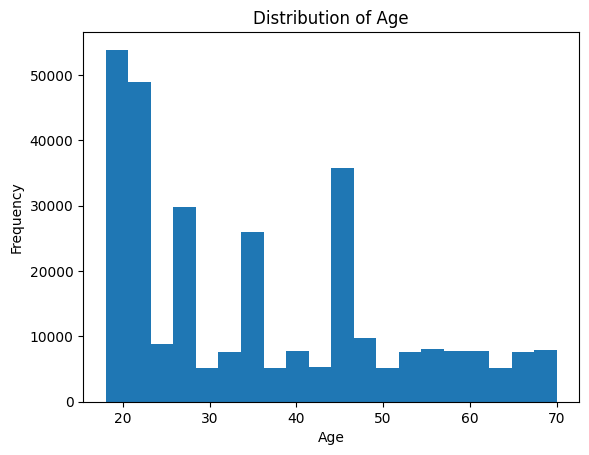

In [60]:
df['Age'].plot(kind='hist',bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

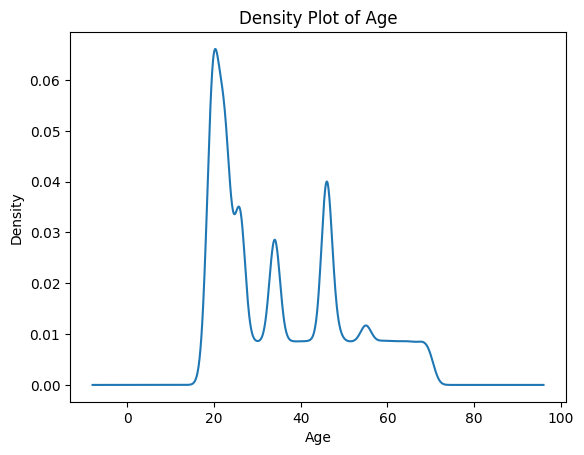

In [61]:
df['Age'].plot(kind='kde')
plt.xlabel('Age')
plt.title('Density Plot of Age')
plt.show()

* **the graph is right side skewed meas the mean , median , mode are positively skew  mans in the left side part you get more mean , median and mode**

In [62]:
df['Age'].skew()

0.6531854974115945

* **Skewness value is 0.653216630887558, it indicates that the distribution is positively skewed. Positive skewness means that the right tail of the distribution is longer or fatter than the left tail, indicating that there are more data points on the left side of the distribution with fewer data points on the right side.**

## Box Plot view for Age

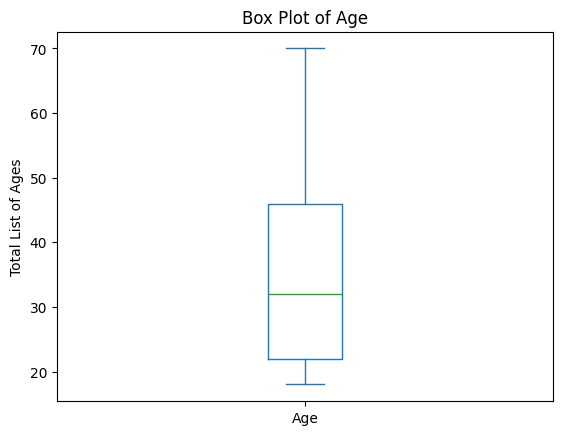

In [63]:
df['Age'].plot(kind='box')
plt.ylabel("Total List of Ages")
plt.title('Box Plot of Age')
plt.show()

* **There have no Any outlier means All values are perfactly given   in box plot we are able to see : first line : max , then box : 75% , then green line : mean show 50% , then bottom box side : 25% and then last line show : min age**

##Year

In [64]:
df['Year'].describe()

count    301211.000000
mean       2023.164928
std           0.371116
min        2023.000000
25%        2023.000000
50%        2023.000000
75%        2023.000000
max        2024.000000
Name: Year, dtype: float64

In [65]:
df['Year'].unique()

array([2023, 2024])

## Histplot view using seaborn

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


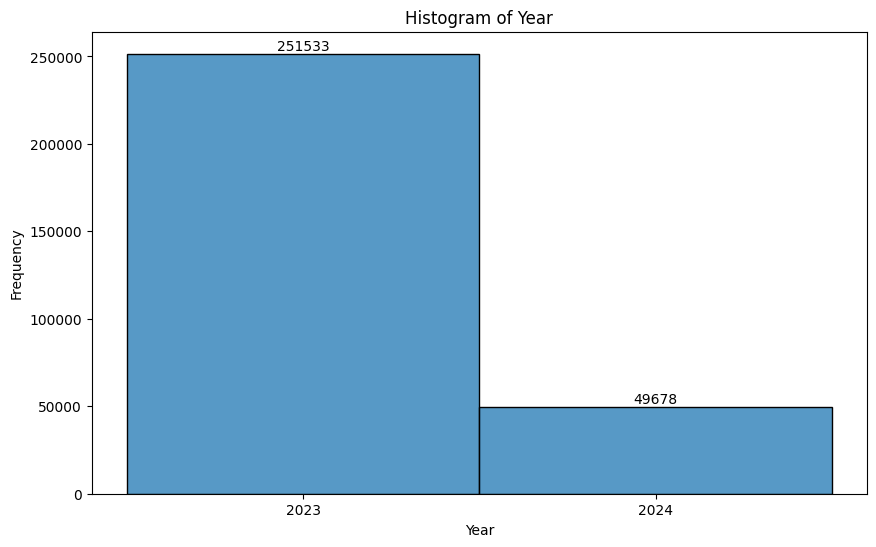

In [66]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='Year', bins=10, discrete=True)

# Customize x-axis ticks to display only integer years
plt.xticks(range(int(df['Year'].min()), int(df['Year'].max()) + 1))
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

* **Month by total Amount retailers get for year 2023.**


In [67]:
df['Date'] = pd.to_datetime(df['Date'])

df_2023 = df[df['Date'].dt.year == 2023]

monthly_amount = df_2023.groupby(df_2023['Date'].dt.month)['Total_Amount'].sum()

monthly_amount = monthly_amount.reindex(range(1, 13), fill_value=0)
print(monthly_amount)

Date
1     0.000000e+00
2     0.000000e+00
3     3.516174e+07
4     3.397197e+07
5     3.443068e+07
6     3.367560e+07
7     3.481066e+07
8     3.510854e+07
9     3.383623e+07
10    3.451428e+07
11    3.412863e+07
12    3.461408e+07
Name: Total_Amount, dtype: float64


* **Here we check in year 2024 by month wise how many profit retailers get**

In [68]:
df['Date'] = pd.to_datetime(df['Date'])

df_2024 = df[df['Date'].dt.year == 2024]

monthly_amount = df_2024.groupby(df_2024['Date'].dt.month)['Total_Amount'].sum()

print(monthly_amount)

Date
1    3.466510e+07
2    3.304524e+07
Name: Total_Amount, dtype: float64


##KDE PLot

/tmp/ipykernel_18/553387953.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['Year'], shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


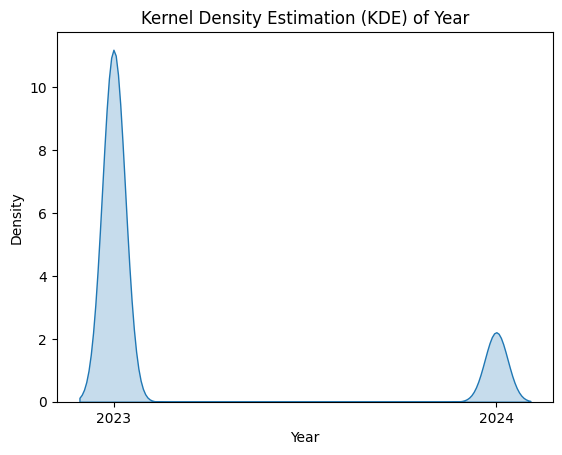

In [69]:
sns.kdeplot(data=df['Year'], shade=True)
plt.title('Kernel Density Estimation (KDE) of Year')
plt.xlabel('Year')
plt.ylabel('Density')

# Customize x-axis ticks to display only integer years
plt.xticks(range(int(df['Year'].min()), int(df['Year'].max()) + 1))

plt.show()


## univariate for : Total purchase , Amount , Total Amount

In [70]:
df['Total_Purchases'].describe()

count    301211.000000
mean          5.359535
std           2.866928
min           1.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          10.000000
Name: Total_Purchases, dtype: float64

<Axes: ylabel='Frequency'>

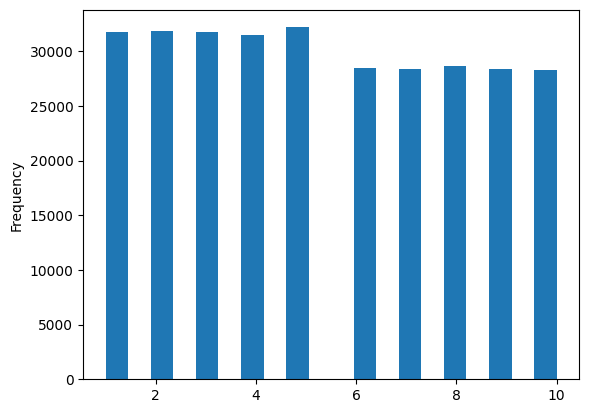

In [71]:
df['Total_Purchases'].plot(kind="hist",bins=20)

<Axes: ylabel='Density'>

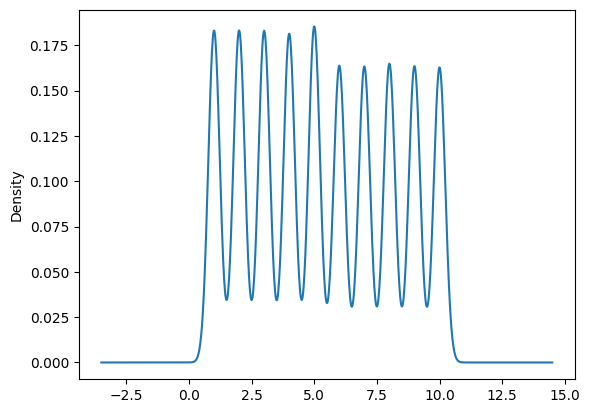

In [72]:
df['Total_Purchases'].plot(kind='kde')


In [73]:
df['Total_Purchases'].skew()

0.07264257631252134

* The Graph of the total Purchase is normally skewed

<Axes: >

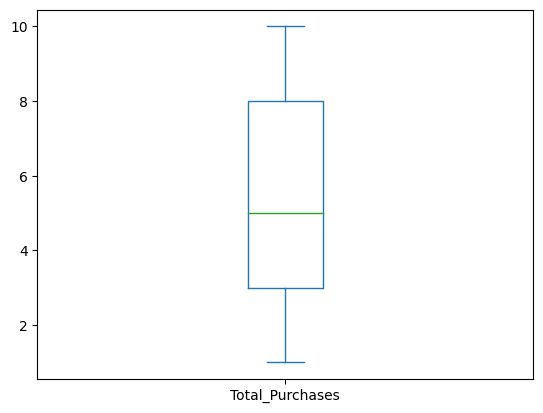

In [74]:
df['Total_Purchases'].plot(kind='box')

## Amount

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


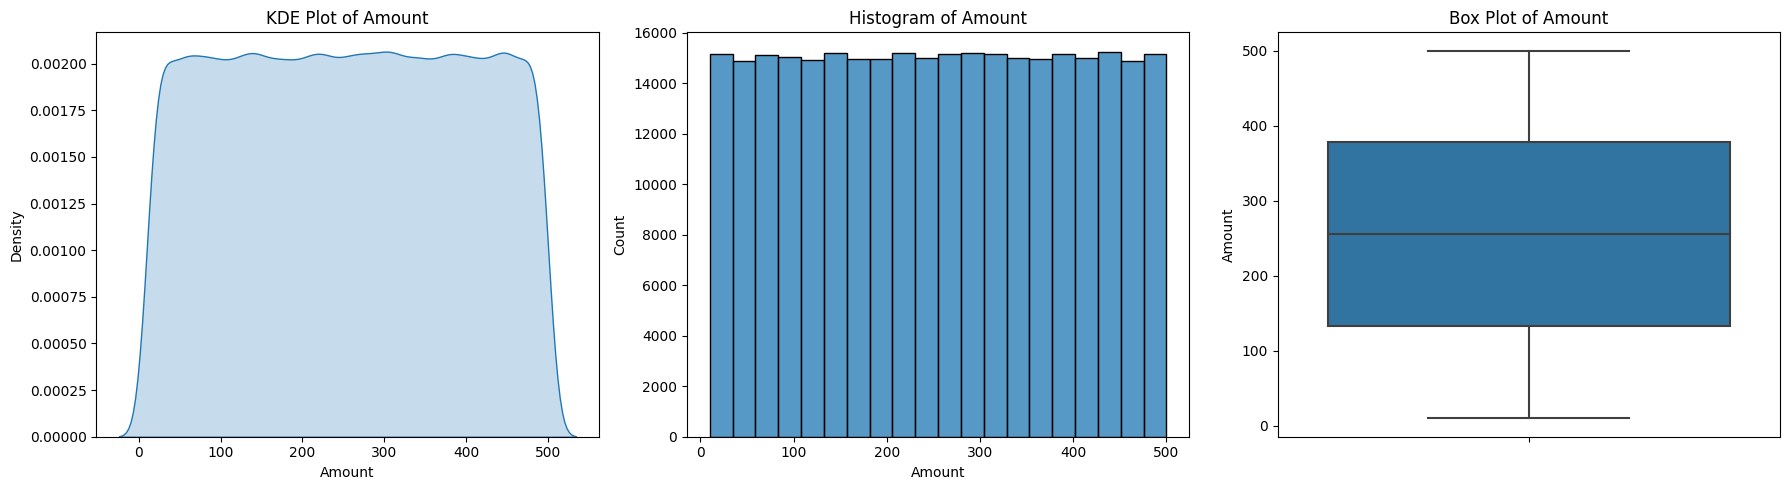

In [75]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot KDE for Amount
sns.kdeplot(data=df, x='Amount', fill=True, ax=axes[0])
axes[0].set_title('KDE Plot of Amount')

# Plot Histogram for Amount
sns.histplot(data=df, x='Amount', bins=20, ax=axes[1])
axes[1].set_title('Histogram of Amount')

# Plot Box plot for Amount
sns.boxplot(data=df,y='Amount', ax=axes[2])
axes[2].set_title('Box Plot of Amount')

plt.tight_layout()
plt.show()

In [76]:
df['Amount'].skew()

-0.002092088359330821

* The graph is neatively skewed

##Total Amount

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


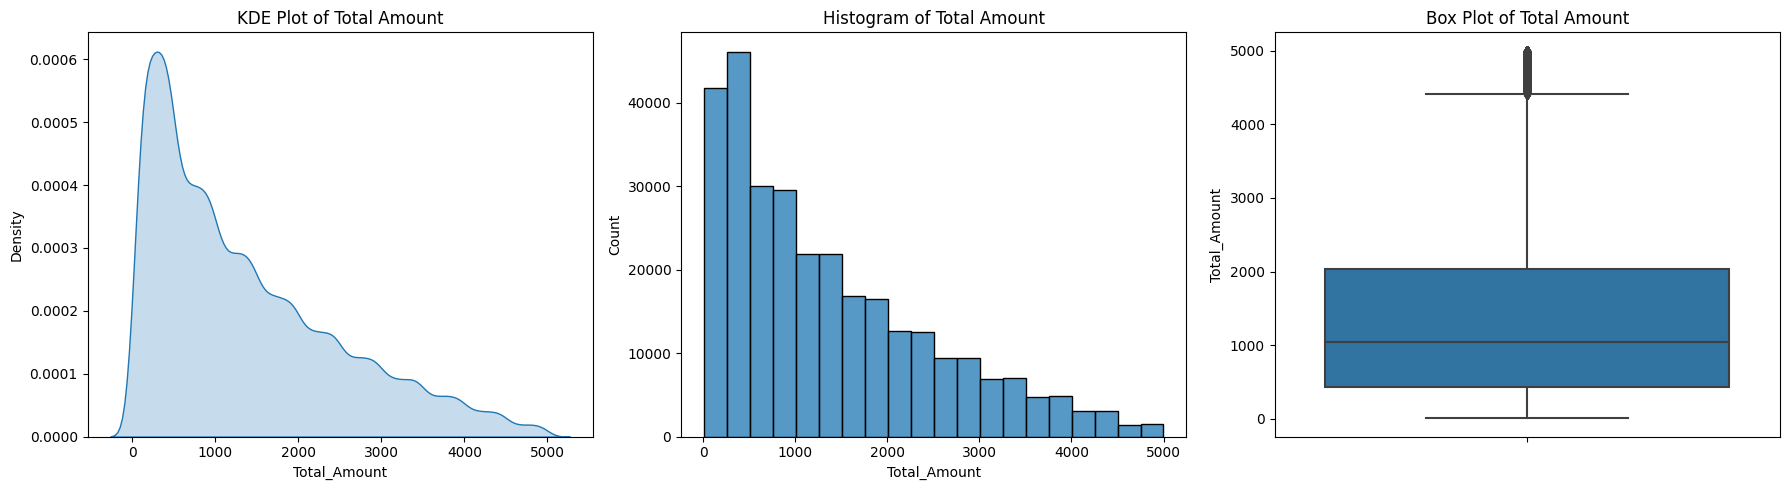

In [77]:

# Now we make a Subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# KDE for Total Amount
sns.kdeplot(data=df, x='Total_Amount', fill=True, ax=axes[0])
axes[0].set_title('KDE Plot of Total Amount')

#  Histogram for Total Amount
sns.histplot(data=df, x='Total_Amount', bins=20, ax=axes[1])
axes[1].set_title('Histogram of Total Amount')

# Plot Box plot for Total Amount
sns.boxplot(data=df, y='Total_Amount', ax=axes[2])
axes[2].set_title('Box Plot of Total Amount')

plt.tight_layout()
plt.show()

* The Graph for total Amount is Positively Skewd

In [78]:
df['Total_Amount'].skew()

0.9727762891509284

# Categorical Columns Wise Univariate Analysis :

##Country

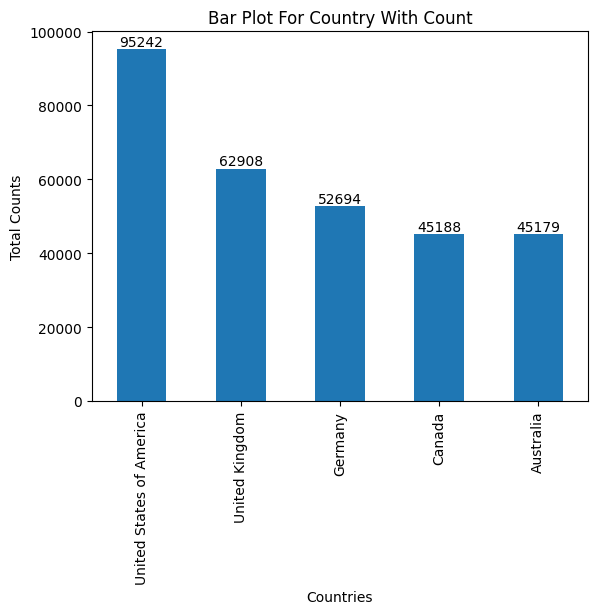

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

ax = df['Country'].value_counts().plot(kind='bar')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')
plt.xlabel("Countries")
plt.ylabel("Total Counts")
plt.title("Bar Plot For Country With Count")
plt.show()


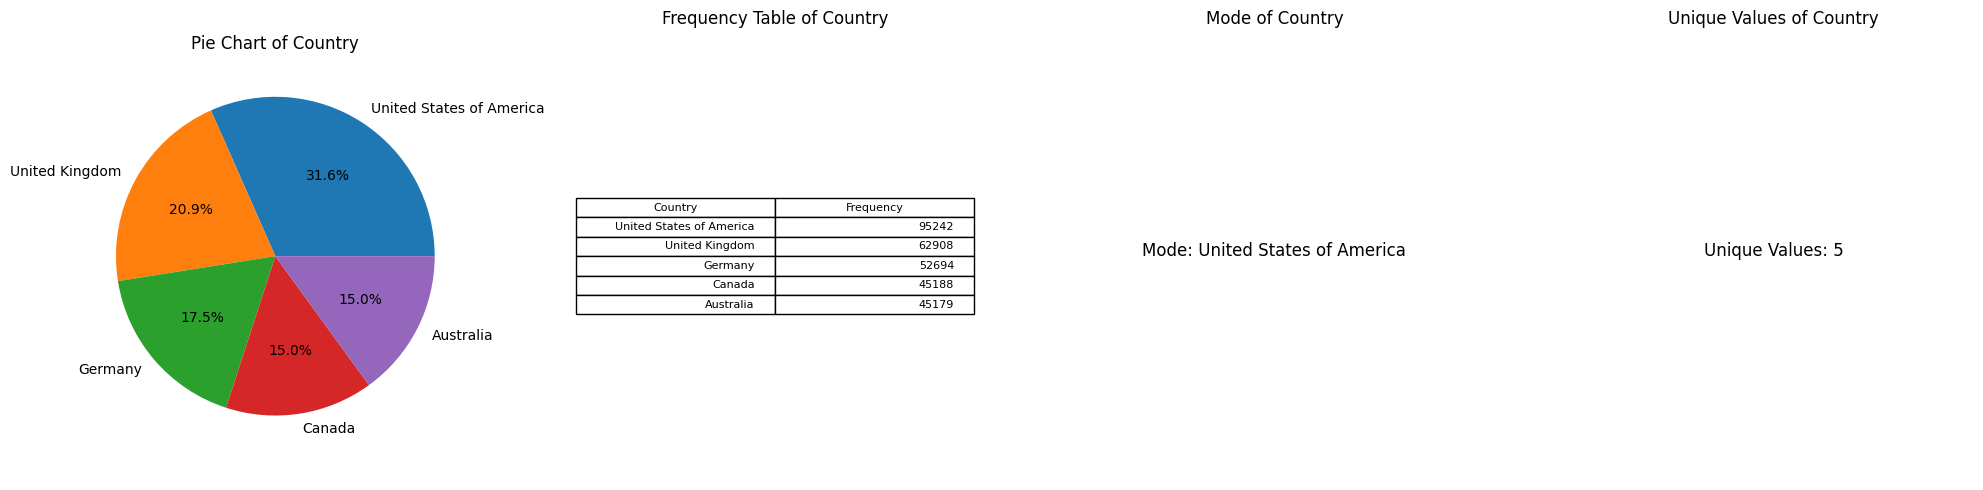

In [80]:
column = 'Country'

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Pie Chart
df[column].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%')
axes[0].set_title(f'Pie Chart of {column}')
axes[0].set_ylabel('')

# Frequency Table
frequency_table = df[column].value_counts().reset_index()
frequency_table.columns = [column, 'Frequency']
axes[1].axis('off')
axes[1].table(cellText=frequency_table.values, colLabels=frequency_table.columns, loc='center')
axes[1].set_title(f'Frequency Table of {column}')

# Mode
mode_value = df[column].mode().values[0]
axes[2].text(0.5, 0.5, f'Mode: {mode_value}', fontsize=12, ha='center')
axes[2].axis('off')
axes[2].set_title(f'Mode of {column}')

# Unique Values
unique_count = df[column].nunique()
axes[3].text(0.5, 0.5, f'Unique Values: {unique_count}', fontsize=12, ha='center')
axes[3].axis('off')
axes[3].set_title(f'Unique Values of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

##State

In [81]:
# Create a bar plot using plotly for better visuals  #here i used reset index for get data in the form of dataframe
state_counts = df['State'].value_counts().reset_index().head(15)
state_counts.columns = ['State', 'Frequency']
fig = px.bar(state_counts, x='State', y='Frequency', title='Bar Plot of State')
fig.show()



In [82]:
df['State'].value_counts()

State
England            63181
Berlin             52687
Ontario            45199
New South Wales    45177
Connecticut        21601
Maine              12170
Georgia             9487
Kansas              5499
New Mexico          5187
New York             995
Maryland             978
Pennsylvania         959
California           951
Texas                951
Nevada               946
Minnesota            943
South Carolina       942
Iowa                 941
West Virginia        941
Ohio                 940
Illinois             937
Mississippi          933
Hawaii               930
Louisiana            927
Michigan             921
Utah                 919
Virginia             917
New Jersey           917
Alabama              905
Montana              904
Oregon               904
Delaware             903
South Dakota         902
Florida              901
Wisconsin            899
Tennessee            899
Wyoming              899
North Carolina       899
Rhode Island         897
Nebraska           

## Gender

In [83]:
df[['Amount','Gender']].describe()

Amount
count  301211.000000
mean      255.158625
std       141.393295
min        10.000219
25%       132.870443
50%       255.448092
75%       377.681526
max       499.997911

In [84]:
df['Gender'].value_counts()

Gender
Male      187407
Female    113804
Name: count, dtype: int64

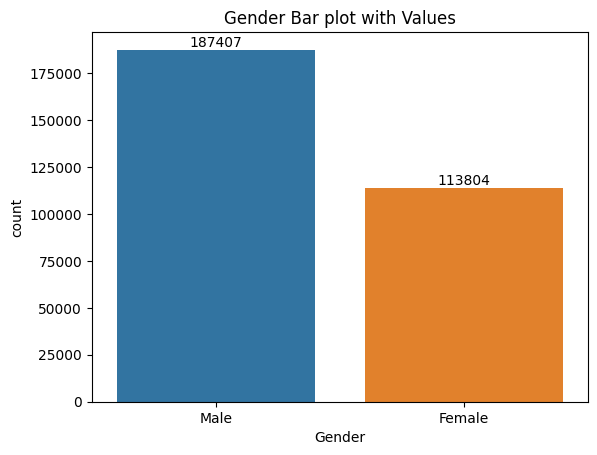

In [85]:
#bar chart
gender=sns.countplot(x='Gender',data=df)

#if i want to show total men and women on plot then i use here this method is called label
for bars in gender.containers:
    gender.bar_label(bars)
plt.title('Gender Bar plot with Values')
plt.show()

In [86]:
gender_counts = df['Gender'].value_counts()

fig = px.pie(names=gender_counts.index, values=gender_counts.values, title='Gender Distribution')
fig.show()

In [87]:
print(f"The Max Number In Gender Is :",df['Gender'].mode().values[0])

The Max Number In Gender Is : Male


## Inclome

In [88]:
df['Income'].describe()

count     301211
unique         3
top       Medium
freq      130186
Name: Income, dtype: object

In [89]:
df['Income'].value_counts()

Income
Medium    130186
Low        95970
High       75055
Name: count, dtype: int64

In [90]:
print(f'Max Numbr of Persons category incomewise:',df['Income'].mode().values[0])

Max Numbr of Persons category incomewise: Medium


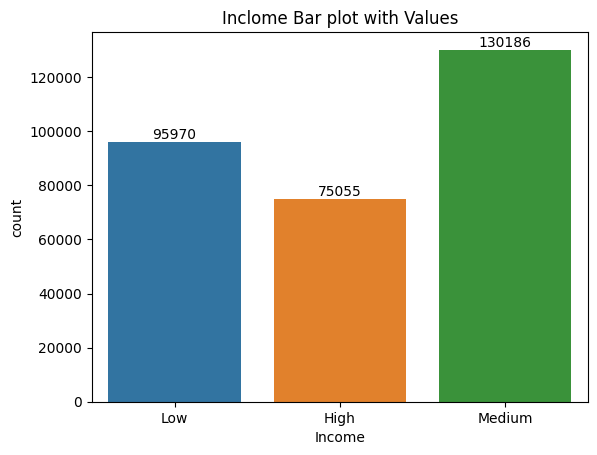

In [91]:
#bar chart
gender=sns.countplot(x='Income',data=df)

for bars in gender.containers:
    gender.bar_label(bars)
plt.title('Inclome Bar plot with Values')
plt.show()

<Axes: ylabel='count'>

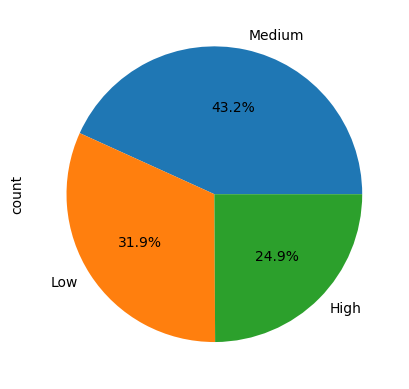

In [92]:
#pie chart
df['Income'].value_counts().plot(kind='pie',  autopct='%1.1f%%')

##Customer_Segment

In [93]:
df['Customer_Segment'].describe()

count      301211
unique          3
top       Regular
freq       146061
Name: Customer_Segment, dtype: object

In [94]:
print(f'Max Numbr of Customer category Availability wise:',df['Customer_Segment'].mode().values[0])

Max Numbr of Customer category Availability wise: Regular


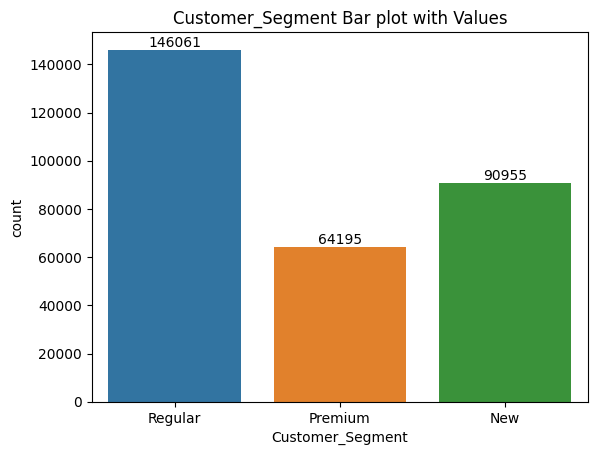

In [95]:
#bar chart
gender=sns.countplot(x='Customer_Segment',data=df)

for bars in gender.containers:
    gender.bar_label(bars)
plt.title('Customer_Segment Bar plot with Values')
plt.show()

<Axes: ylabel='count'>

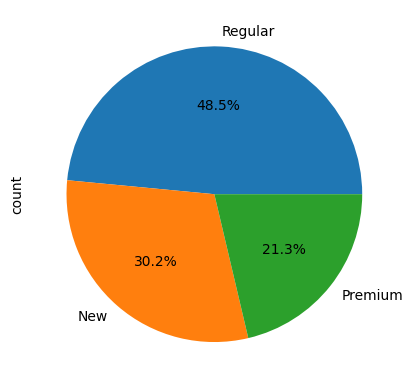

In [96]:
#pie chart
df['Customer_Segment'].value_counts().plot(kind='pie',  autopct='%1.1f%%')

##Month

In [97]:
df['Month'].describe()

count     301211
unique        12
top        April
freq       41458
Name: Month, dtype: object

In [98]:
print(f'Max Numbr of Persons category incomewise:',df['Month'].mode().values[0])

Max Numbr of Persons category incomewise: April


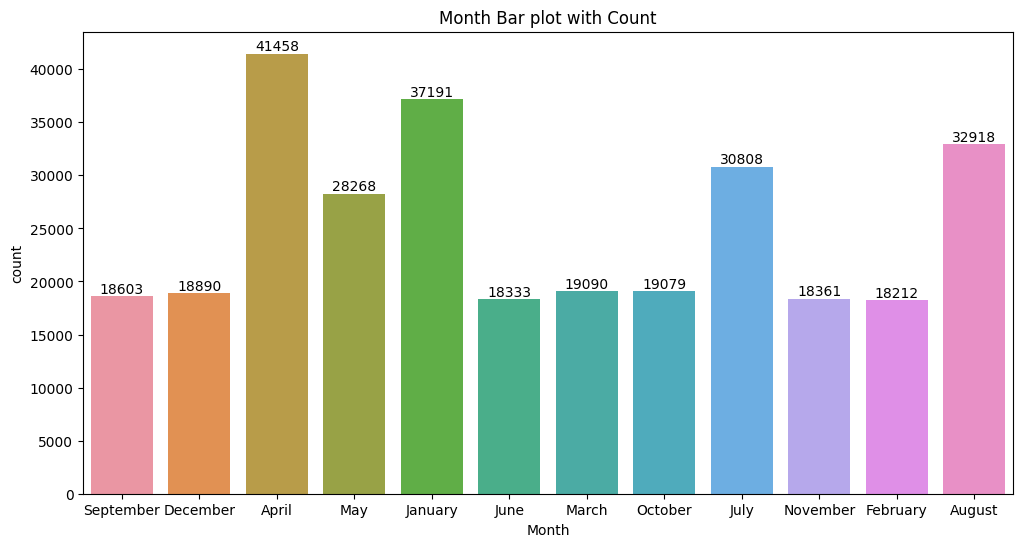

In [99]:
#bar chart
plt.figure(figsize=(12, 6))
gender=sns.countplot(x='Month',data=df)


for bars in gender.containers:
    gender.bar_label(bars)

plt.title('Month Bar plot with Count')
plt.show()

<Axes: ylabel='count'>

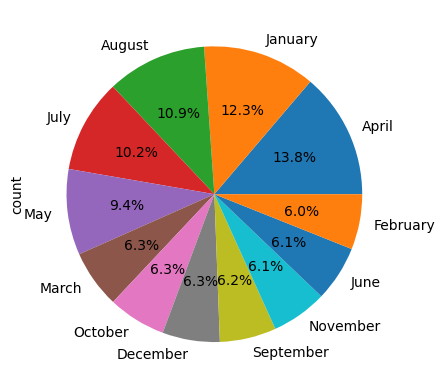

In [100]:
#pie chart
df['Month'].value_counts().plot(kind='pie',  autopct='%1.1f%%')

##Product_Category

In [101]:
df['Product_Category'].describe()

count          301211
unique              5
top       Electronics
freq            71264
Name: Product_Category, dtype: object

In [102]:
print(f'Max Numbr of Purchase category monthwise:',df['Product_Category'].mode().values[0])

Max Numbr of Purchase category monthwise: Electronics


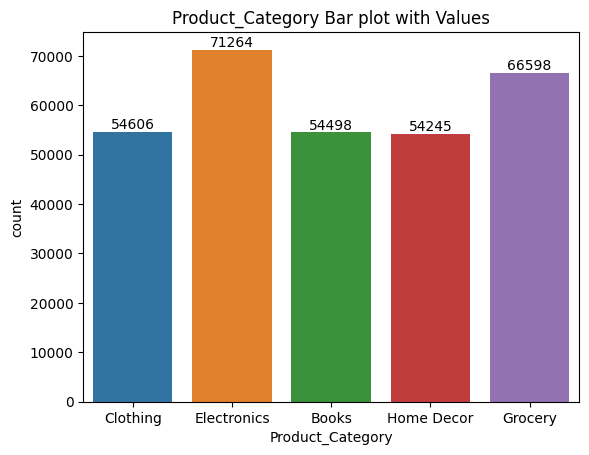

In [103]:
#bar chart
gender=sns.countplot(x='Product_Category',data=df)


for bars in gender.containers:
    gender.bar_label(bars)

plt.title('Product_Category Bar plot with Values')
plt.show()

<Axes: ylabel='count'>

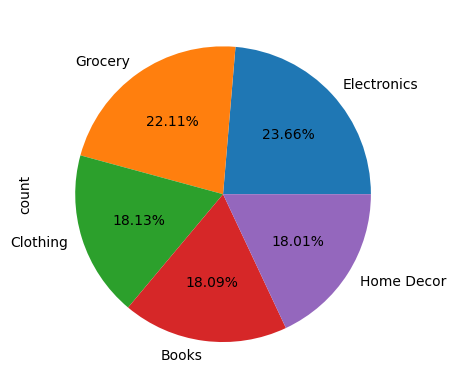

In [104]:
#pie chart
df['Product_Category'].value_counts().plot(kind='pie',  autopct='%1.2f%%')

##Product_Brand

In [105]:
df['Product_Brand'].describe()

count     301211
unique        18
top        Pepsi
freq       30489
Name: Product_Brand, dtype: object

In [106]:
print(f'Max Number of product brand category :',df['Product_Brand'].mode().values[0])

Max Number of product brand category : Pepsi


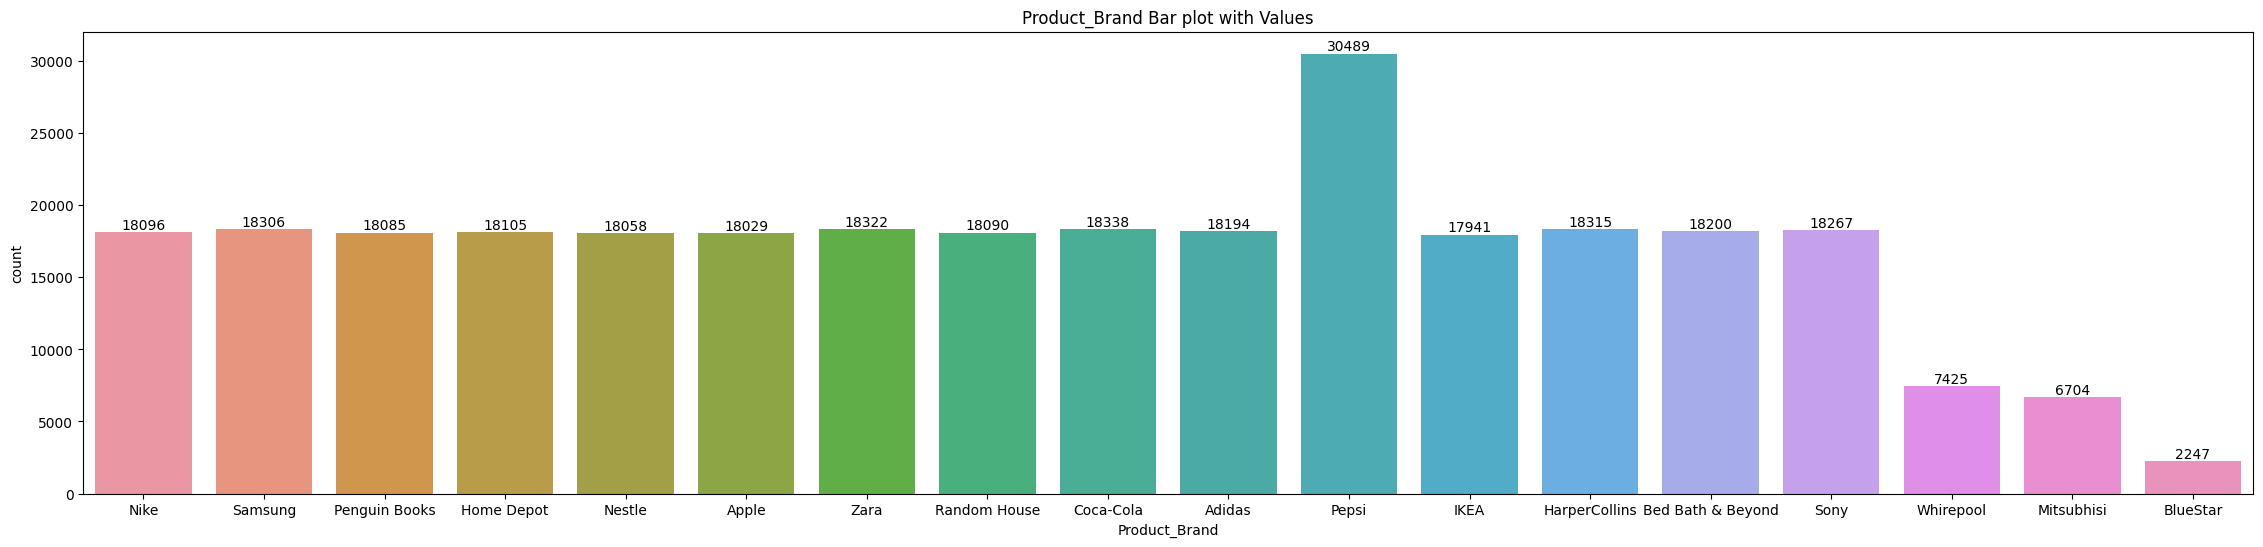

In [107]:
#bar chart
plt.figure(figsize=(28, 6))
gender=sns.countplot(x='Product_Brand',data=df)

for bars in gender.containers:
    gender.bar_label(bars)

plt.title('Product_Brand Bar plot with Values')
plt.show()

<Axes: ylabel='count'>

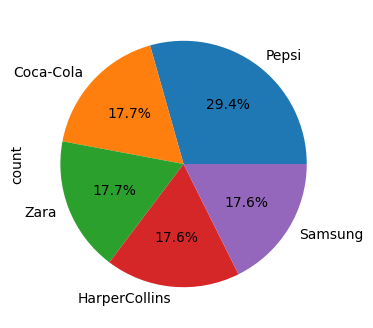

In [108]:
#pie chart
plt.figure(figsize=(4, 4))
df['Product_Brand'].value_counts().head().plot(kind='pie',  autopct='%1.1f%%')

##Product_Type

In [109]:
df['Product_Type'].describe()

count     301211
unique        33
top        Water
freq       24383
Name: Product_Type, dtype: object

In [110]:
df['Product_Type'].value_counts()

Product_Type
Water                                 24383
Smartphone                            18405
Non-Fiction                           18134
Fiction                               17998
Juice                                 12202
Television                            12161
T-shirt                               12149
Decorations                           12139
Shoes                                 12112
Tablet                                12053
Soft Drink                            12003
Furniture                             11940
Fridge                                 7425
Mitsubishi 1.5 Ton 3 Star Split AC     6704
Thriller                               6252
Kitchen                                6212
Coffee                                 6158
Children's                             6134
Jeans                                  6120
Shirt                                  6113
Dress                                  6108
Shorts                                 6072
Headphones         

In [111]:
print(f'Max Number of product Type  :',df['Product_Type'].mode().values[0])

Max Number of product Type  : Water


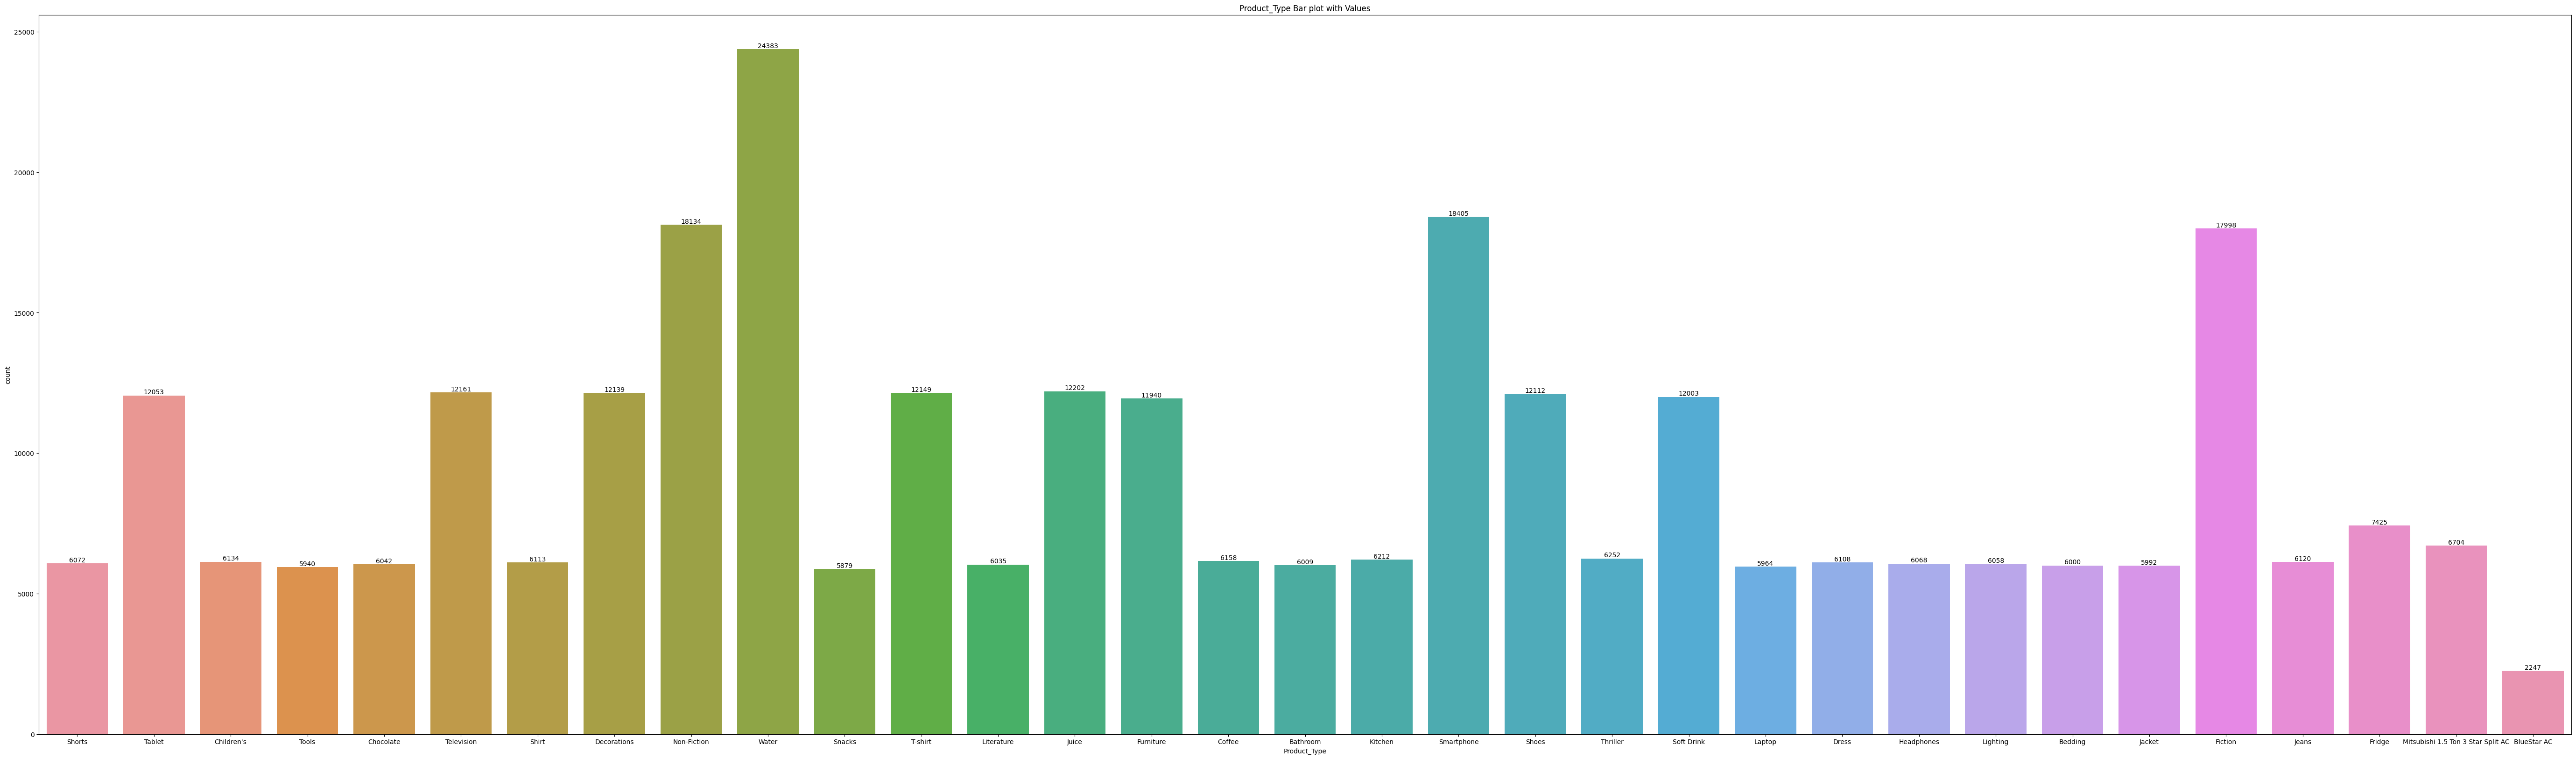

In [112]:
#bar chart
plt.figure(figsize=(70,20))
gender=sns.countplot(x='Product_Type',data=df)

for bars in gender.containers:
    gender.bar_label(bars)

plt.title('Product_Type Bar plot with Values')
plt.show()

<Axes: ylabel='count'>

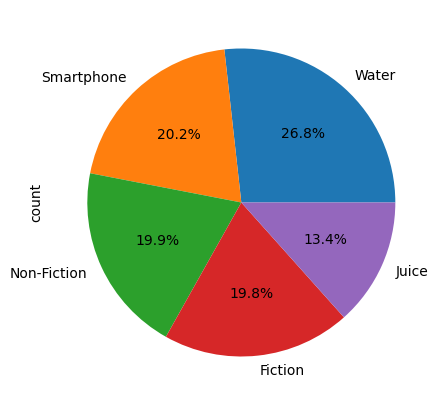

In [113]:
#pie chart
plt.figure(figsize=(5, 5))
df['Product_Type'].value_counts().head(5).plot(kind='pie',  autopct='%1.1f%%')

##Feedback

In [114]:
df['Feedback'].describe()

count        301211
unique            4
top       Excellent
freq         100691
Name: Feedback, dtype: object

In [115]:
print(f'Max Feedback type :',df['Feedback'].mode().values[0])

Max Feedback type : Excellent


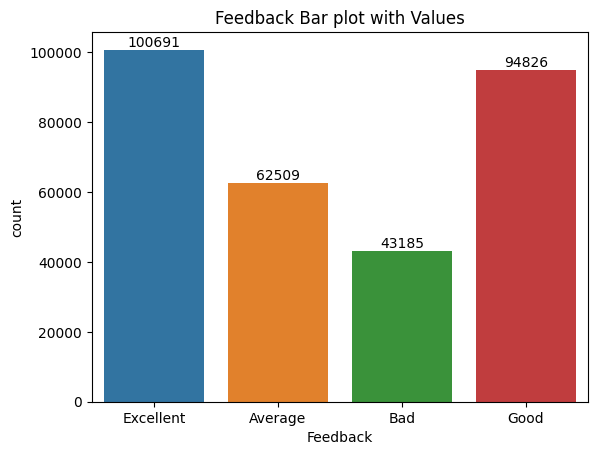

In [116]:
#bar chart
gender=sns.countplot(x='Feedback',data=df)


for bars in gender.containers:
    gender.bar_label(bars)

plt.title('Feedback Bar plot with Values')
plt.show()

<Axes: ylabel='count'>

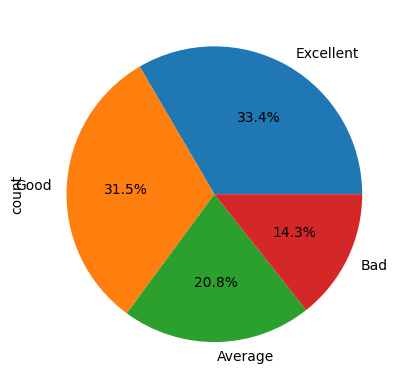

In [117]:
#pie chart
df['Feedback'].value_counts().plot(kind='pie',  autopct='%1.1f%%')

##Shipping Method

In [118]:
df['Shipping_Method'].describe()

count       301211
unique           3
top       Same-Day
freq        104189
Name: Shipping_Method, dtype: object

In [119]:
print(f'Type  of shipping method category :',df['Shipping_Method'].mode().values[0])

Type  of shipping method category : Same-Day


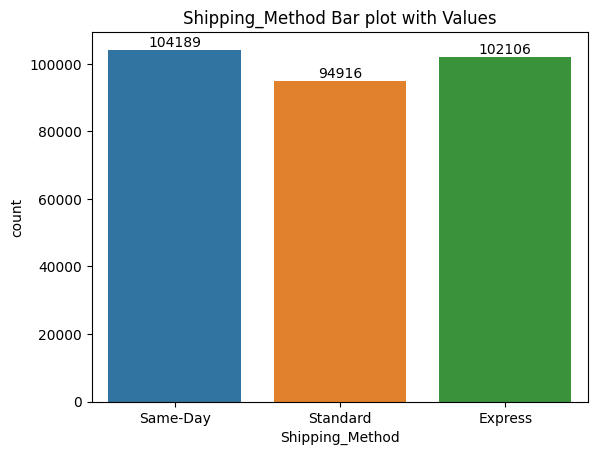

In [120]:
#bar chart
gender=sns.countplot(x='Shipping_Method',data=df)


for bars in gender.containers:
    gender.bar_label(bars)

plt.title('Shipping_Method Bar plot with Values')
plt.show()

<Axes: ylabel='count'>

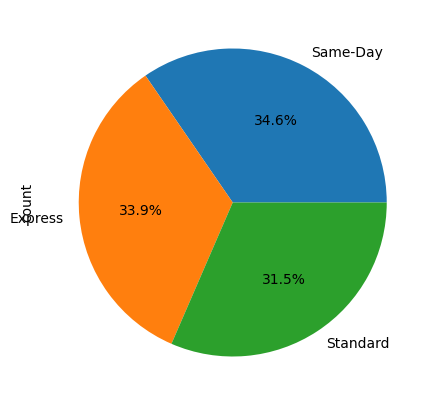

In [121]:
#pie chart
plt.figure(figsize=(6,5))
df['Shipping_Method'].value_counts().plot(kind='pie',  autopct='%1.1f%%')

##Payment_Method

In [122]:
df['Payment_Method'].describe()

count          301211
unique              4
top       Credit Card
freq            90128
Name: Payment_Method, dtype: object

In [123]:
print(f' Number of payment method type :',df['Payment_Method'].mode().values[0])

 Number of payment method type : Credit Card


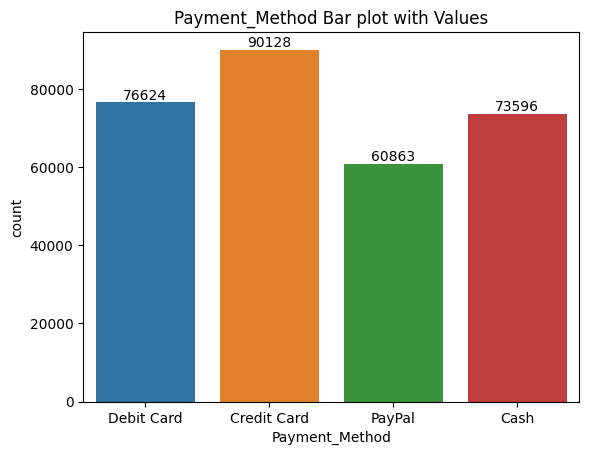

In [124]:
#bar chart
gender=sns.countplot(x='Payment_Method',data=df)

for bars in gender.containers:
    gender.bar_label(bars)

plt.title('Payment_Method Bar plot with Values')
plt.show()

##Payment_Method

In [125]:
df['Payment_Method'].describe()

count          301211
unique              4
top       Credit Card
freq            90128
Name: Payment_Method, dtype: object

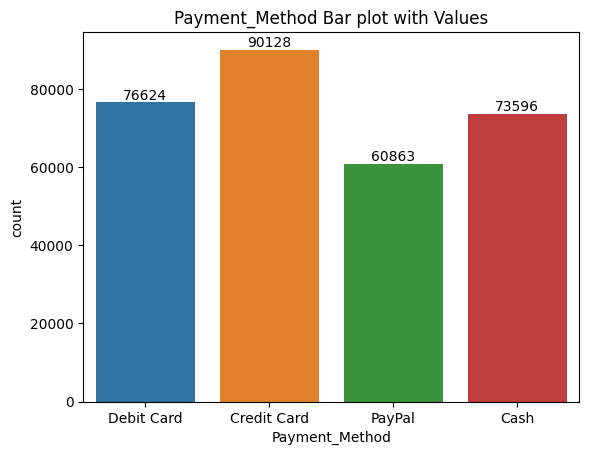

In [126]:
#bar chart
gender=sns.countplot(x='Payment_Method',data=df)


for bars in gender.containers:
    gender.bar_label(bars)

plt.title('Payment_Method Bar plot with Values')
plt.show()

<Axes: ylabel='count'>

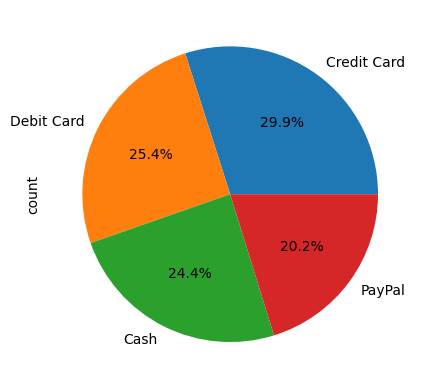

In [127]:
df['Payment_Method'].value_counts().plot(kind='pie',  autopct='%1.1f%%')

#Bivariate Analysis

##numerical-Numerical

## Age- Total Purchase

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



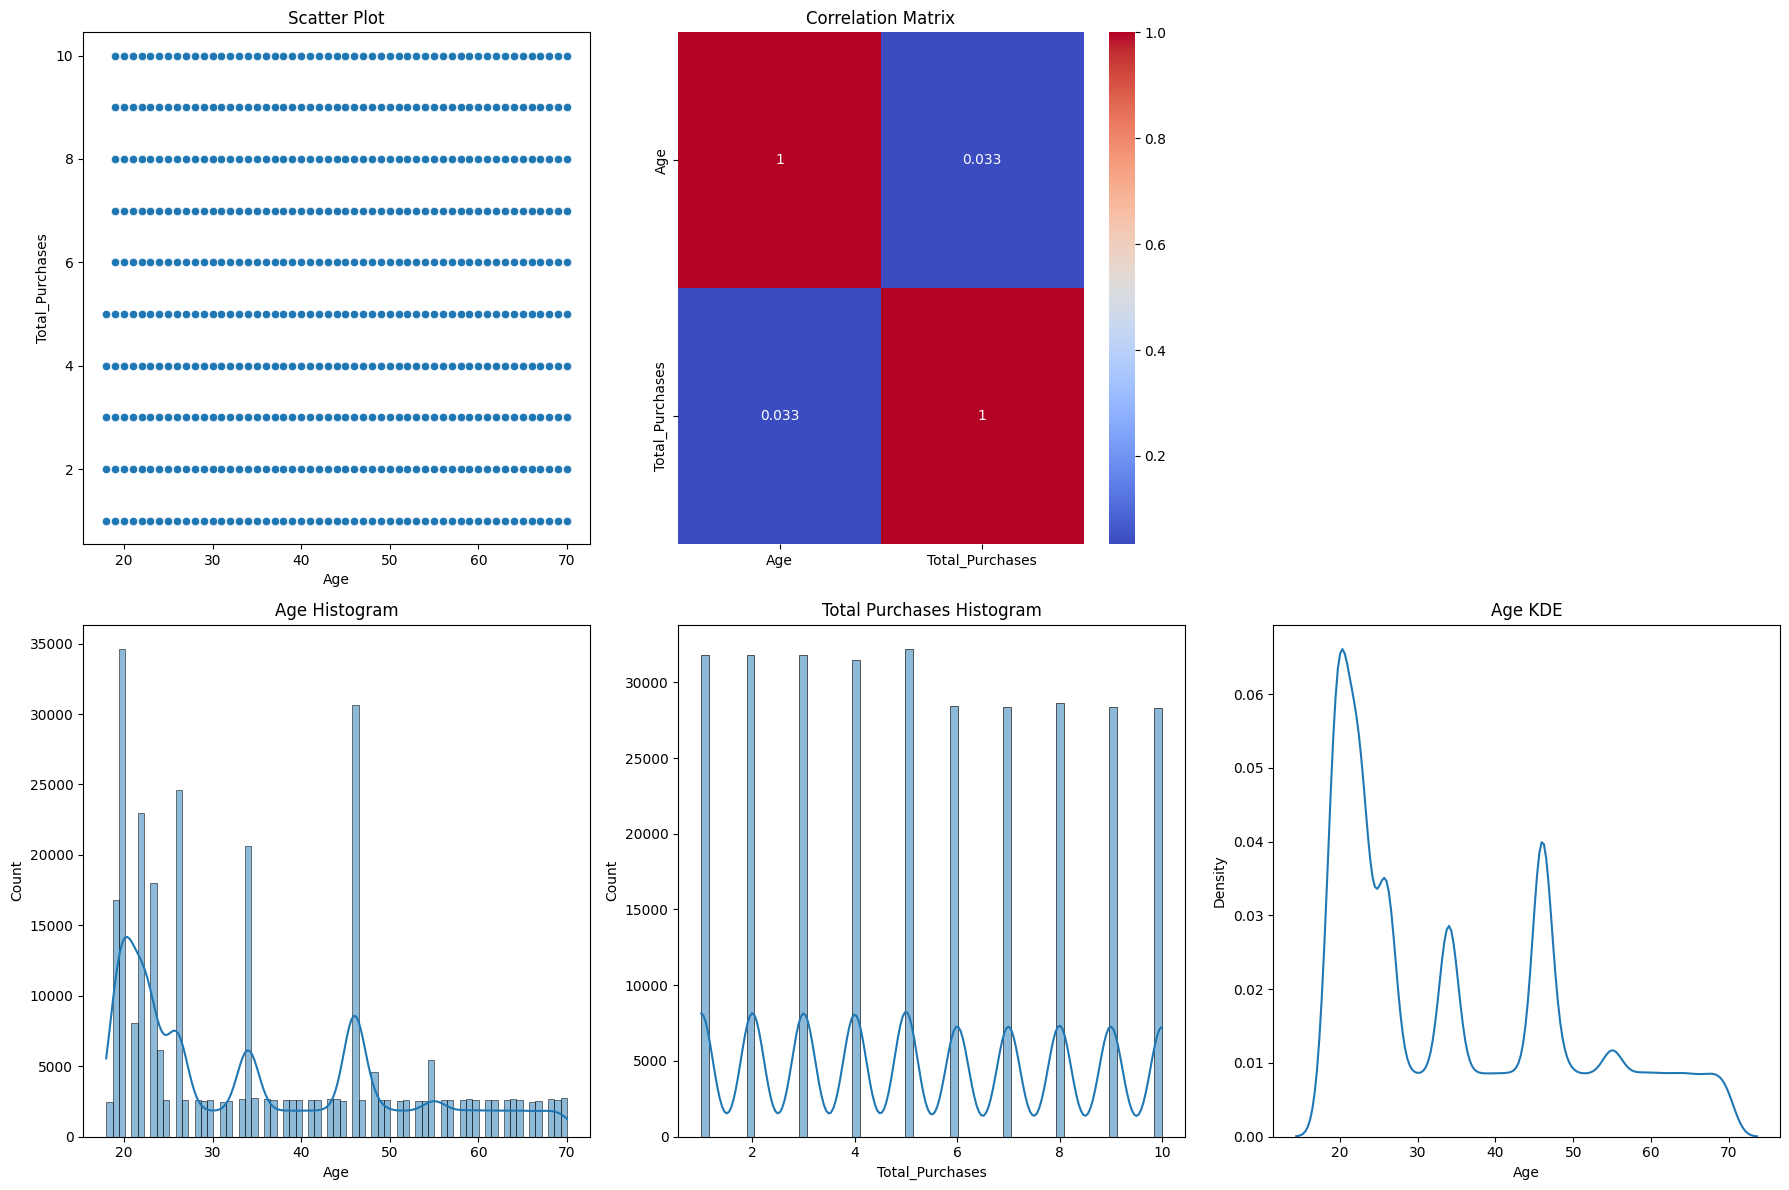

In [128]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Scatter Plot
sns.scatterplot(x='Age', y='Total_Purchases', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Scatter Plot')

# Correlation Matrix
corr = df[['Age', 'Total_Purchases']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Correlation Matrix')


# Histogram for Age
sns.histplot(data=df, x='Age', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Age Histogram')

# Histogram for Total Purchases
sns.histplot(data=df, x='Total_Purchases', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Total Purchases Histogram')

# Kernel Density Estimation Plot for Age
sns.kdeplot(data=df, x='Age', ax=axes[1, 2])
axes[1, 2].set_title('Age KDE')
fig.delaxes(axes[0, 2])
plt.tight_layout()
plt.show()

## Total Purchase and Total Amount Relation

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



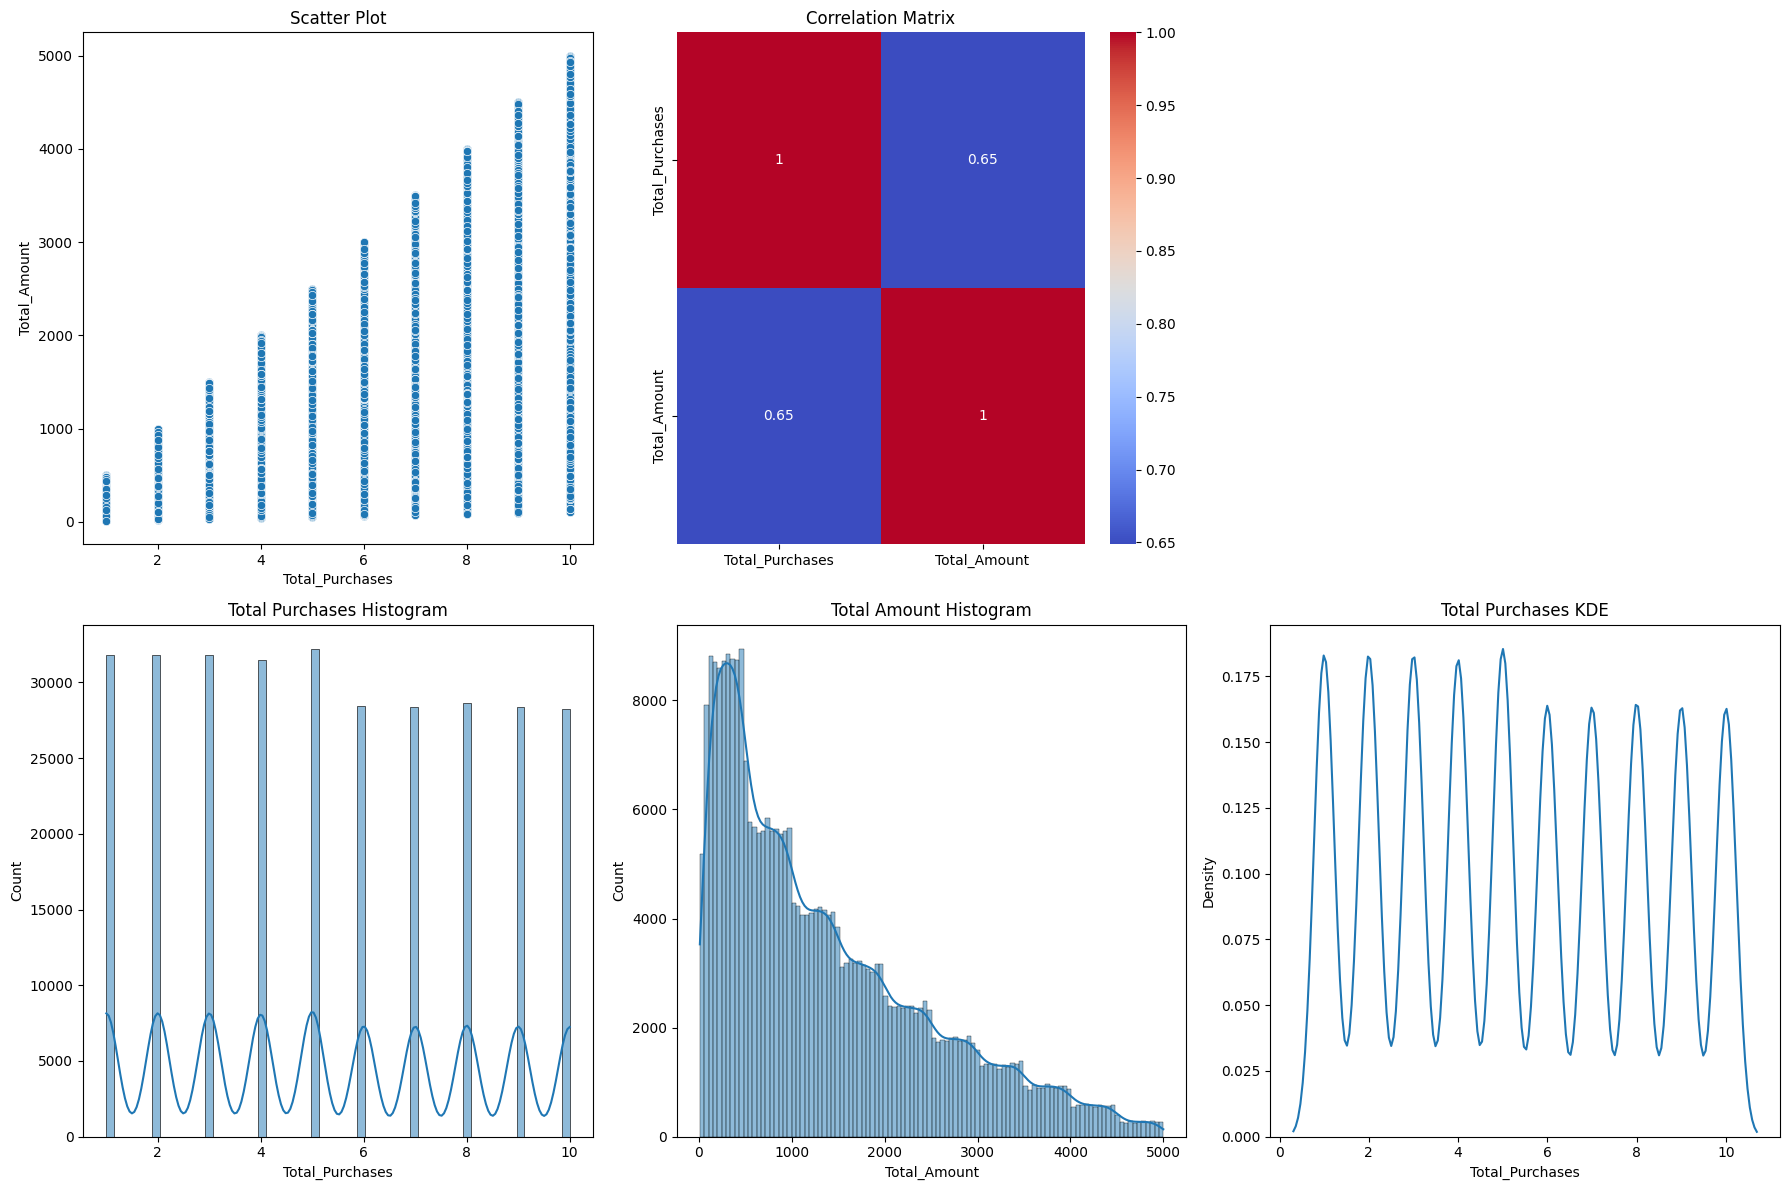

In [129]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Scatter Plot
sns.scatterplot(x='Total_Purchases', y='Total_Amount', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Scatter Plot')

# Correlation Matrix
corr = df[['Total_Purchases', 'Total_Amount']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Correlation Matrix')

# Histogram for Total Purchases
sns.histplot(data=df, x='Total_Purchases', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Total Purchases Histogram')

# Histogram for Total Amount
sns.histplot(data=df, x='Total_Amount', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Total Amount Histogram')

# Kernel Density Estimation Plot for Total Purchases
sns.kdeplot(data=df, x='Total_Purchases', ax=axes[1, 2])
axes[1, 2].set_title('Total Purchases KDE')

# Remove the empty subplot
fig.delaxes(axes[0, 2])
plt.tight_layout()
plt.show()

##Year and Total_Amount: Analyze how the transaction year correlates with the total transaction amount

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



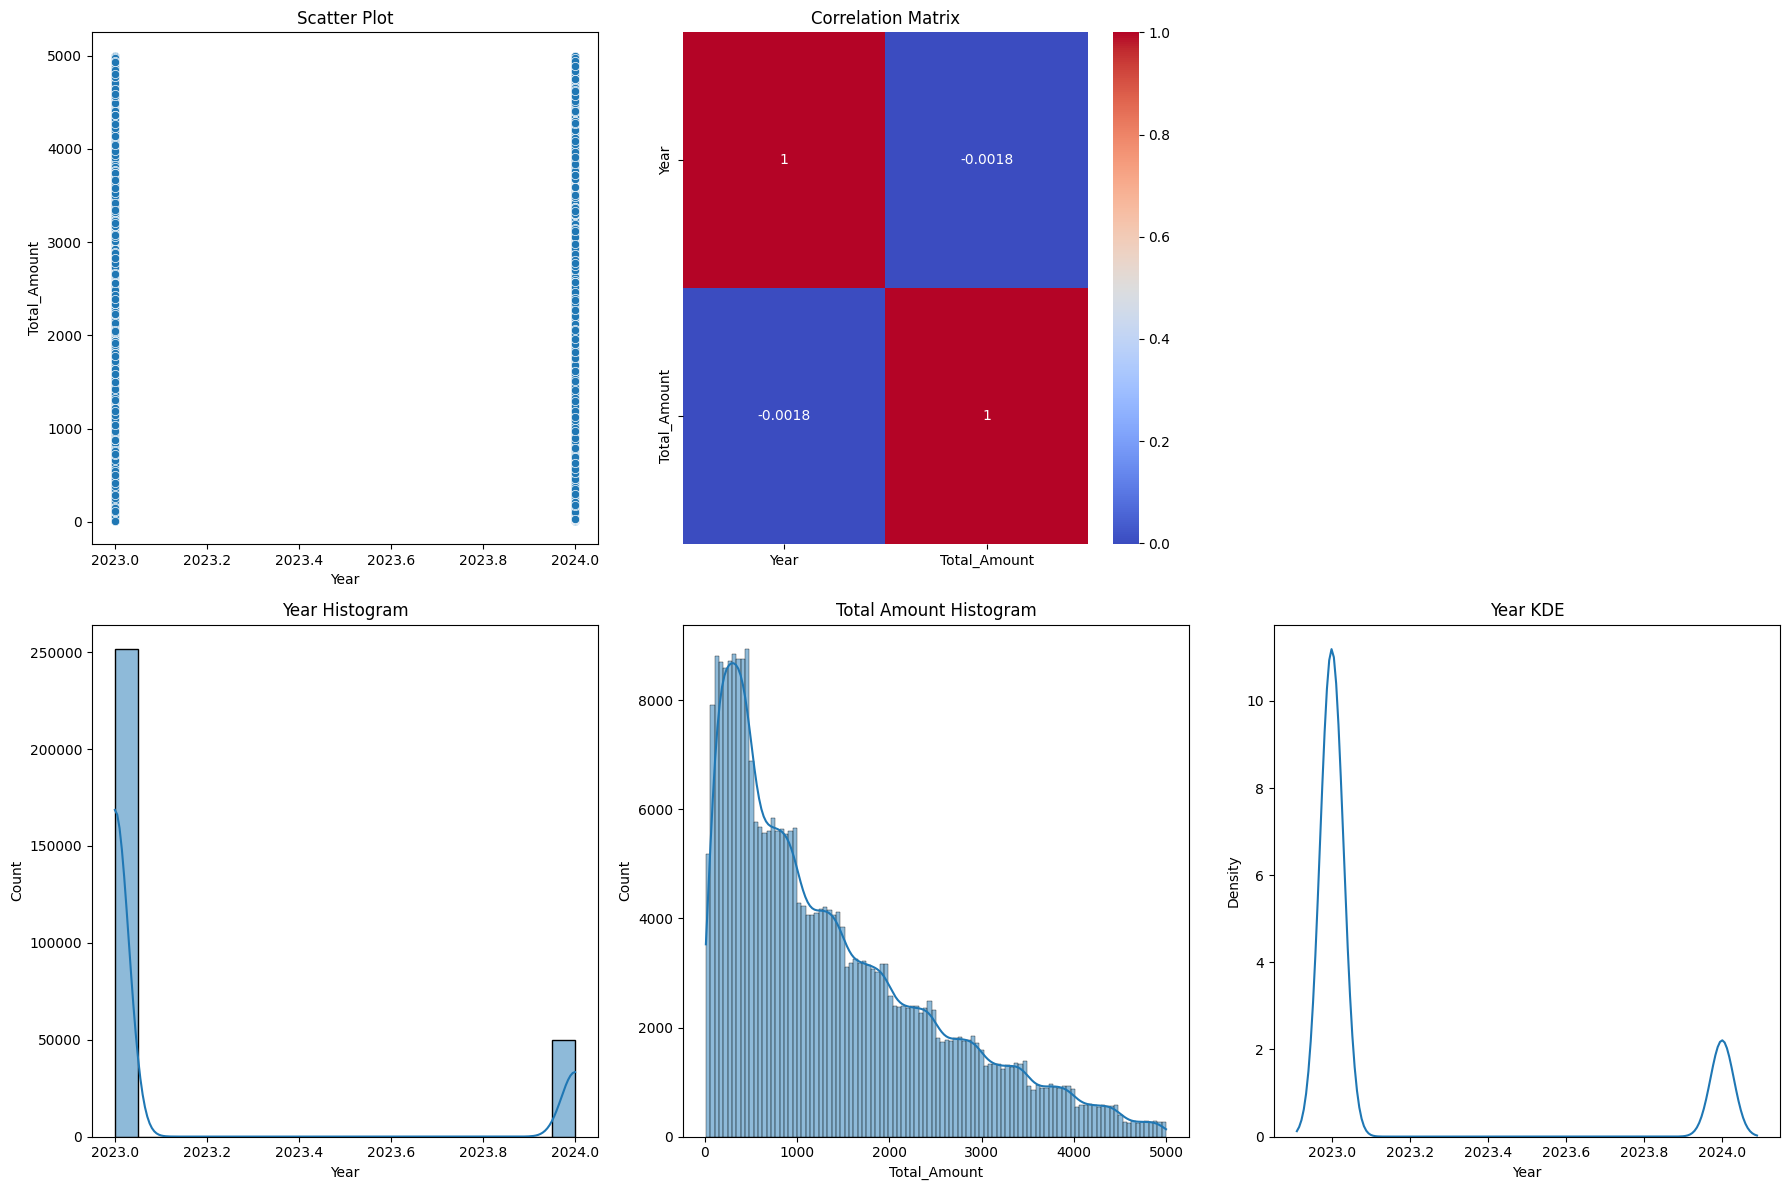

In [130]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Scatter Plot
sns.scatterplot(x='Year', y='Total_Amount', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Scatter Plot')

# Correlation Matrix
corr = df[['Year', 'Total_Amount']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Correlation Matrix')


# Histogram for Year
sns.histplot(data=df, x='Year', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Year Histogram')

# Histogram for Total Amount
sns.histplot(data=df, x='Total_Amount', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Total Amount Histogram')

# Kernel Density Estimation Plot for Year
sns.kdeplot(data=df, x='Year', ax=axes[1, 2])
axes[1, 2].set_title('Year KDE')

# Remove the empty subplot
fig.delaxes(axes[0, 2])
plt.tight_layout()
plt.show()

#Bivariate Analysis on Categorical Columns

##State and Country: Investigate how states are distributed across different countries.
##Gender and Customer_Segment: Explore the distribution of gender within different customer segments.
##Income and Customer_Segment: Analyze how income levels vary among different customer segments.
##Month and Order_Status: Examine the distribution of order statuses across different months.
##Product_Category and Product_Brand: Investigate the relationship between product categories and brands.
##Product_Type and Product_Category: Explore the distribution of product types within different product categories.
##Feedback and Order_Status: Analyze how feedback relates to the order status.
##Shipping_Method and Payment_Method: Explore the distribution of shipping methods and payment methods used.
##Payment_Method and Order_Status: Examine how payment methods are associated with different order statuses.

#State and Country: Investigate how states are distributed across different countries.

In [131]:
df[['State','Country']].describe()

State                   Country
count    301211                    301211
unique       54                         5
top     England  United States of America
freq      63181                     95242

#Gender and Customer_Segment: Explore the distribution of gender within different customer segments

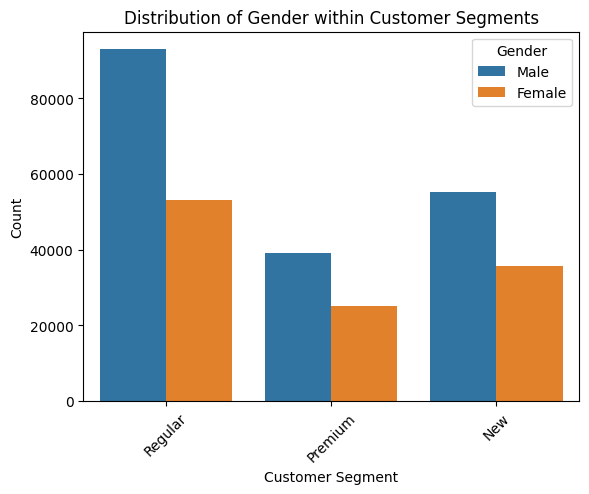

In [132]:
# Create a count plot
sns.countplot(data=df, x='Customer_Segment', hue='Gender')
plt.title('Distribution of Gender within Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Gender')
plt.show()

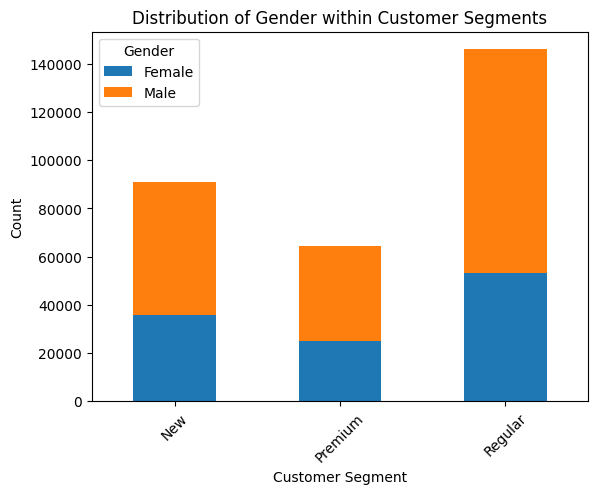

In [133]:
# Create a cross-tabulation between Gender and Customer_Segment
cross_table = pd.crosstab(df['Customer_Segment'], df['Gender'])

cross_table.plot(kind='bar', stacked=True)
plt.title('Distribution of Gender within Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Gender')
plt.show()

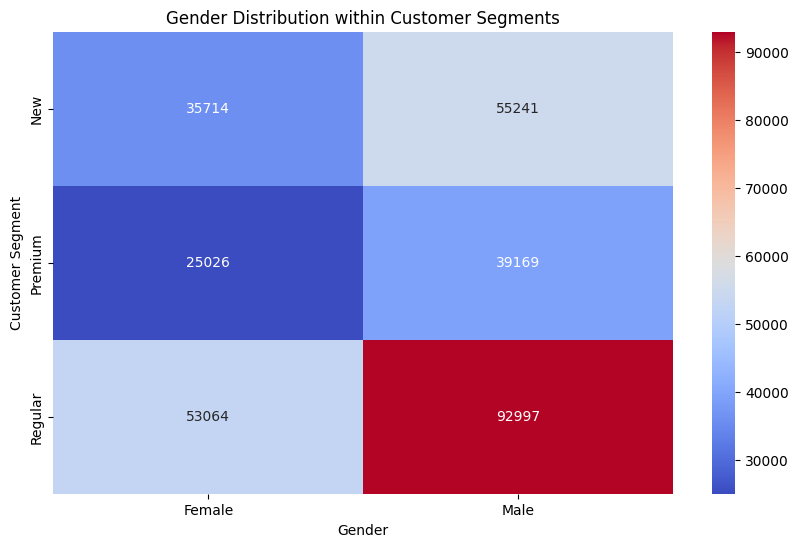

In [134]:
# Create a pivot table to aggregate counts
pivot_table = df.pivot_table(index='Customer_Segment', columns='Gender', aggfunc='size')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Gender Distribution within Customer Segments')
plt.xlabel('Gender')
plt.ylabel('Customer Segment')
plt.show()

#Income and Customer_Segment: Analyze how income levels vary among different customer segments.

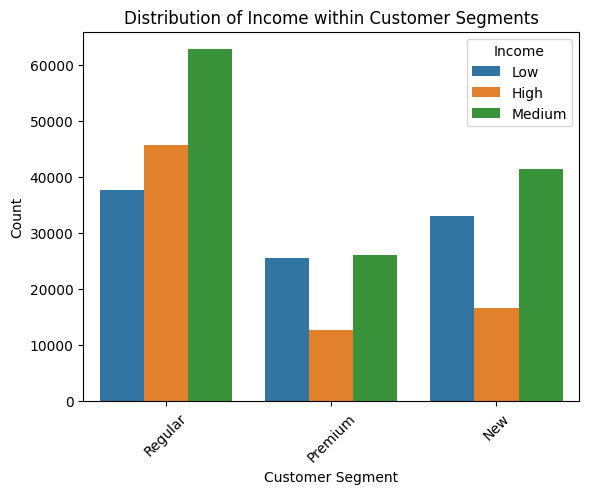

In [135]:
# Create a count plot
sns.countplot(data=df, x='Customer_Segment', hue='Income')
plt.title('Distribution of Income within Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Income')
plt.show()

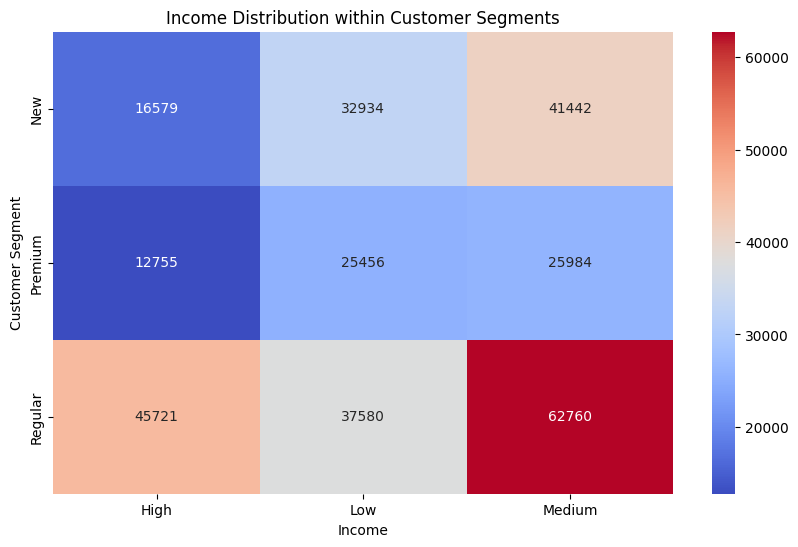

In [136]:
# Create a pivot table to aggregate counts
pivot_table = df.pivot_table(index='Customer_Segment', columns='Income', aggfunc='size')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Income Distribution within Customer Segments')
plt.xlabel('Income')
plt.ylabel('Customer Segment')
plt.show()

#Month and Order_Status: Examine the distribution of order statuses across different months.

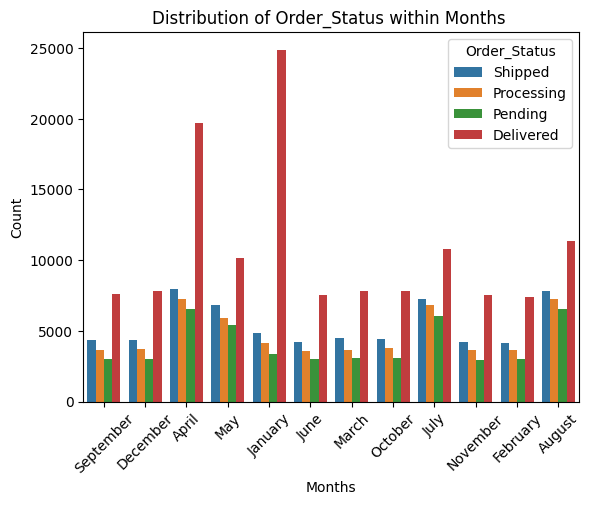

In [137]:
# Create a count plot
sns.countplot(data=df, x='Month', hue='Order_Status')
plt.title('Distribution of Order_Status within Months ')
plt.xlabel('Months')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Order_Status')
plt.show()

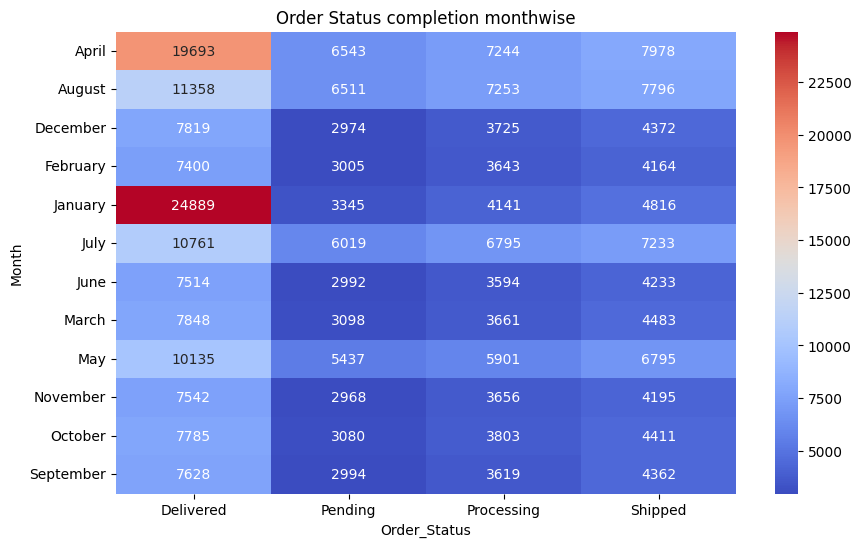

In [138]:
# Create a pivot table to aggregate counts
pivot_table = df.pivot_table(index='Month', columns='Order_Status', aggfunc='size')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Order Status completion monthwise')
plt.xlabel('Order_Status')
plt.ylabel('Month')
plt.show()

#Product_Category and Product_Brand: Investigate the relationship between product categories and brands.

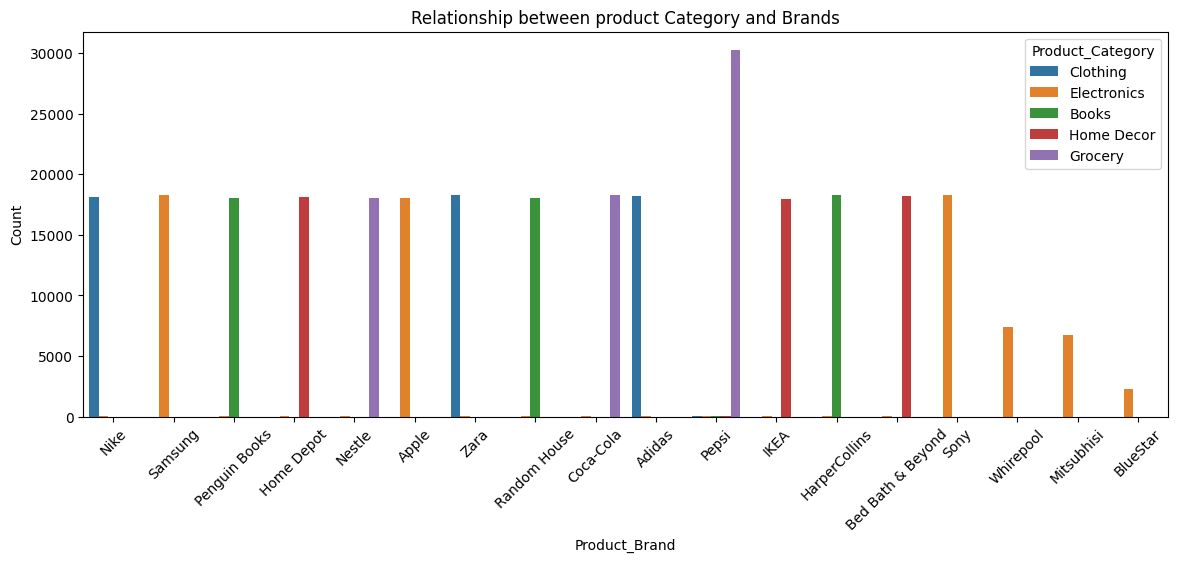

In [139]:
# Create a count plot
plt.figure(figsize=(14,5))
sns.countplot(data=df, x='Product_Brand', hue='Product_Category')
plt.title('Relationship between product Category and Brands')
plt.xlabel('Product_Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Product_Category')
plt.show()

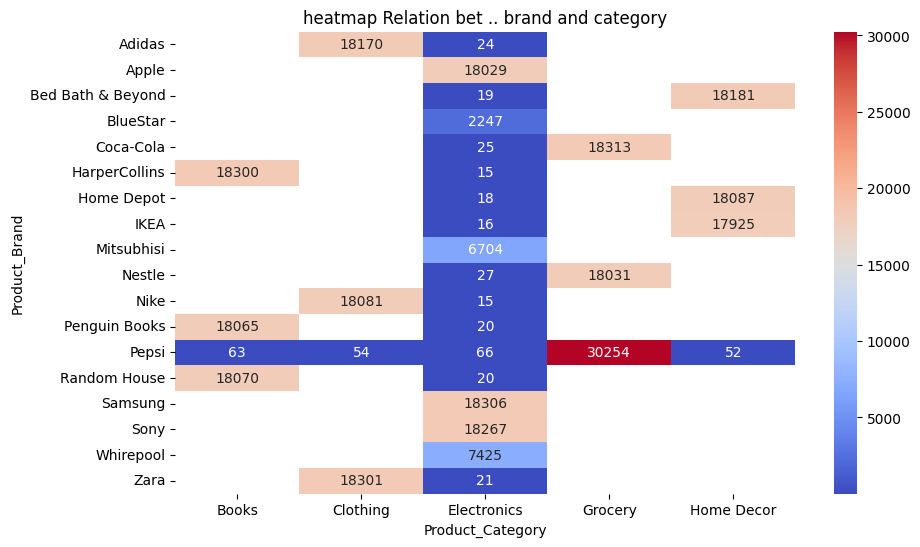

In [140]:
# Create a pivot table to aggregate counts
pivot_table = df.pivot_table(index='Product_Brand', columns='Product_Category', aggfunc='size')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('heatmap Relation bet .. brand and category')
plt.xlabel('Product_Category')
plt.ylabel('Product_Brand')
plt.show()

#Product_Type and Product_Category: Explore the distribution of product types within different product categories

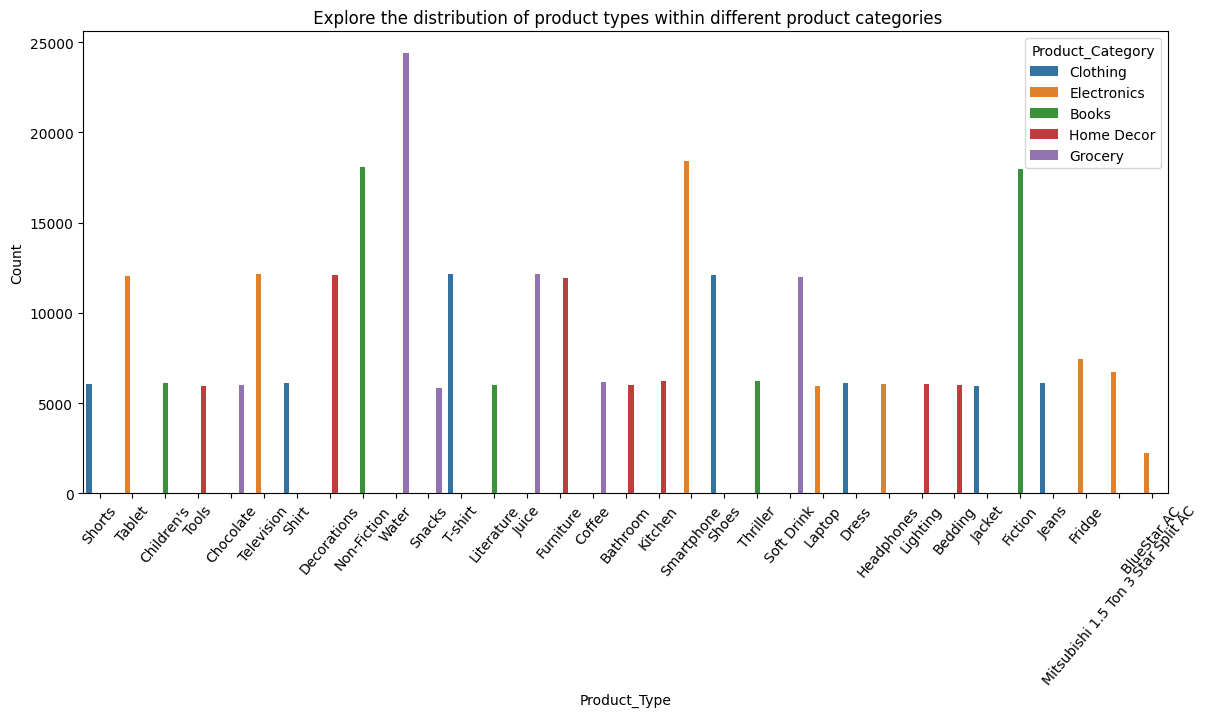

In [141]:
# Create a count plot
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Product_Type', hue='Product_Category')
plt.title(' Explore the distribution of product types within different product categories')
plt.xlabel('Product_Type')
plt.ylabel('Count')
plt.xticks(rotation=50)  # Rotate x-axis labels for better visibility
plt.legend(title='Product_Category')
plt.show()

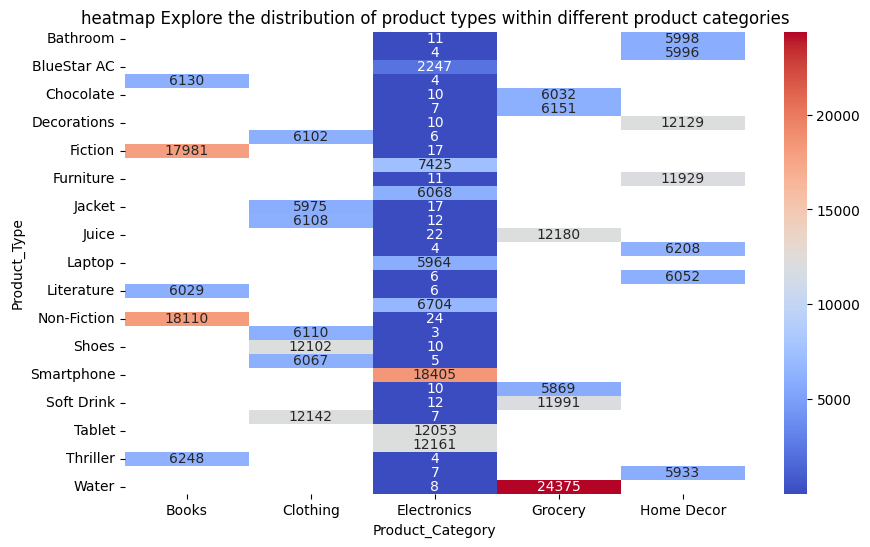

In [142]:
# Create a pivot table to aggregate counts
pivot_table = df.pivot_table(index='Product_Type', columns='Product_Category', aggfunc='size')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('heatmap Explore the distribution of product types within different product categories')
plt.xlabel('Product_Category')
plt.ylabel('Product_Type')
plt.show()

#Feedback and Order_Status: Analyze how feedback relates to the order status.
#Shipping_Method and Payment_Method: Explore the distribution of shipping methods and payment methods used.
#Payment_Method and Order_Status: Examine how payment methods are associated with different order statuses.

#Feedback and Order_Status: Analyze how feedback relates to the order status.

In [143]:
df['Feedback'].describe()


count        301211
unique            4
top       Excellent
freq         100691
Name: Feedback, dtype: object

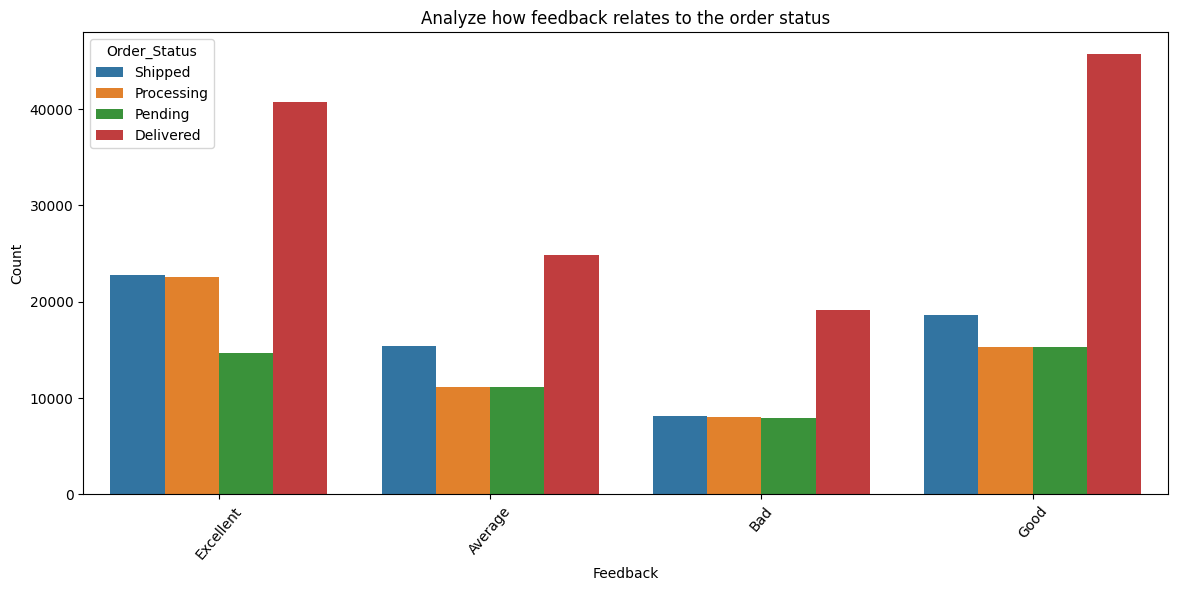

In [144]:
# Create a count plot
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Feedback', hue='Order_Status')
plt.title('Analyze how feedback relates to the order status')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.xticks(rotation=50)  # Rotate x-axis labels for better visibility
plt.legend(title='Order_Status')
plt.show()

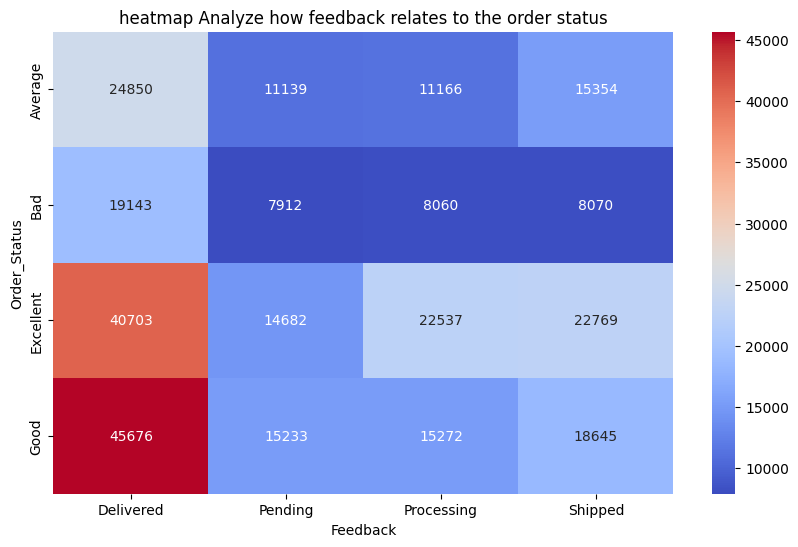

In [145]:
# Create a pivot table to aggregate counts
pivot_table = df.pivot_table(index='Feedback', columns='Order_Status', aggfunc='size')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('heatmap Analyze how feedback relates to the order status')
plt.xlabel('Feedback')
plt.ylabel('Order_Status')
plt.show()

#Shipping_Method and Payment_Method: Explore the distribution of shipping methods and payment methods used.

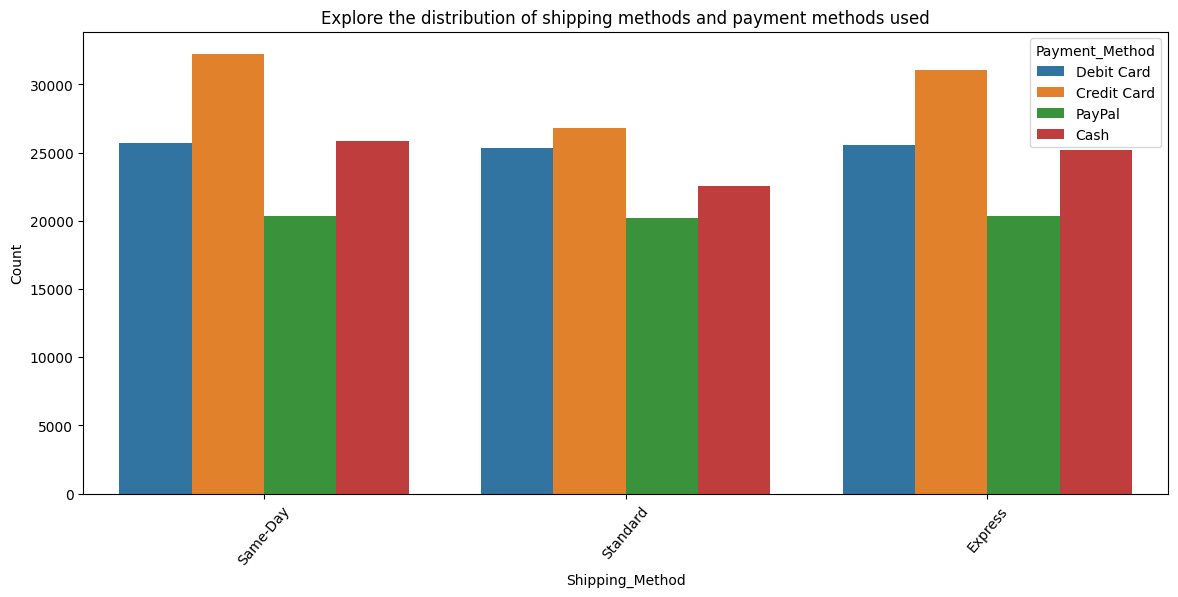

In [146]:
# Create a count plot
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Shipping_Method', hue='Payment_Method')
plt.title('Explore the distribution of shipping methods and payment methods used')
plt.xlabel('Shipping_Method')
plt.ylabel('Count')
plt.xticks(rotation=50)  # Rotate x-axis labels for better visibility
plt.legend(title='Payment_Method')
plt.show()

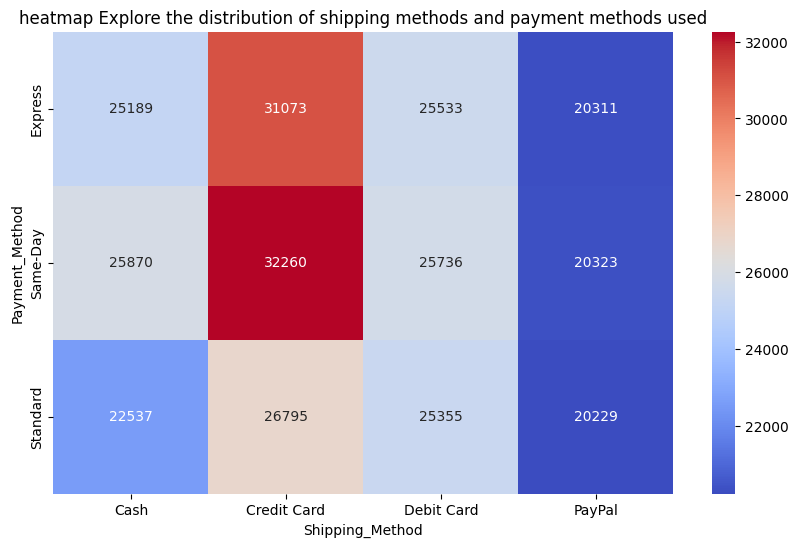

In [147]:
# Create a pivot table to aggregate counts
pivot_table = df.pivot_table(index='Shipping_Method', columns='Payment_Method', aggfunc='size')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('heatmap Explore the distribution of shipping methods and payment methods used')
plt.xlabel('Shipping_Method')
plt.ylabel('Payment_Method')
plt.show()

#Payment_Method and Order_Status: Examine how payment methods are associated with different order statuses.

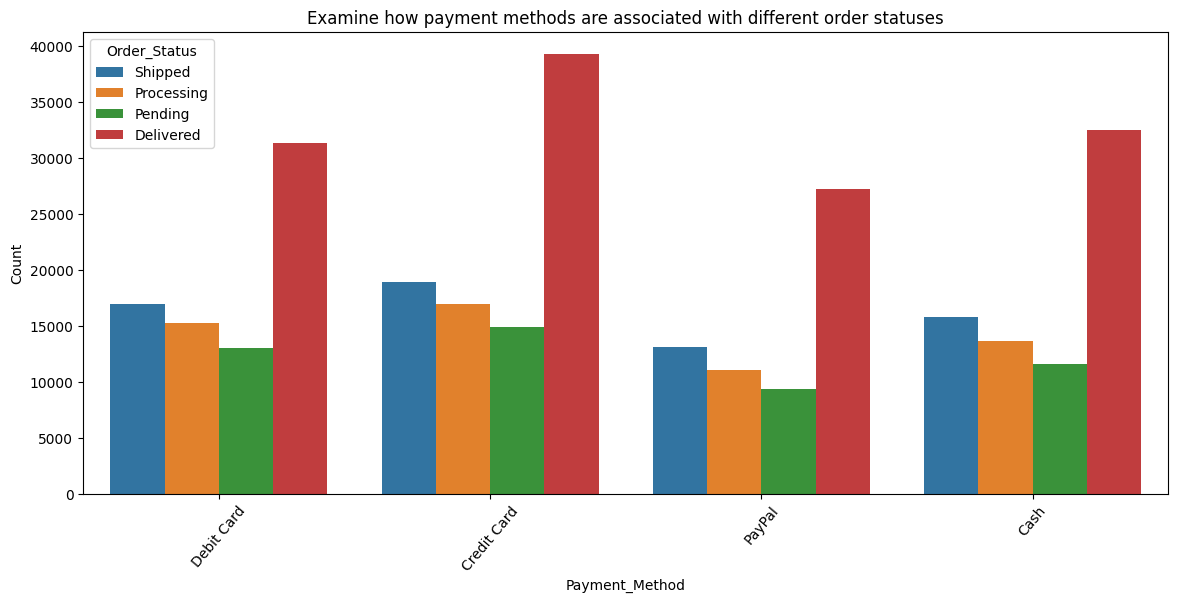

In [148]:
# Create a count plot
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Payment_Method', hue='Order_Status')
plt.title('Examine how payment methods are associated with different order statuses')
plt.xlabel('Payment_Method')
plt.ylabel('Count')
plt.xticks(rotation=50)  # Rotate x-axis labels for better visibility
plt.legend(title='Order_Status')
plt.show()

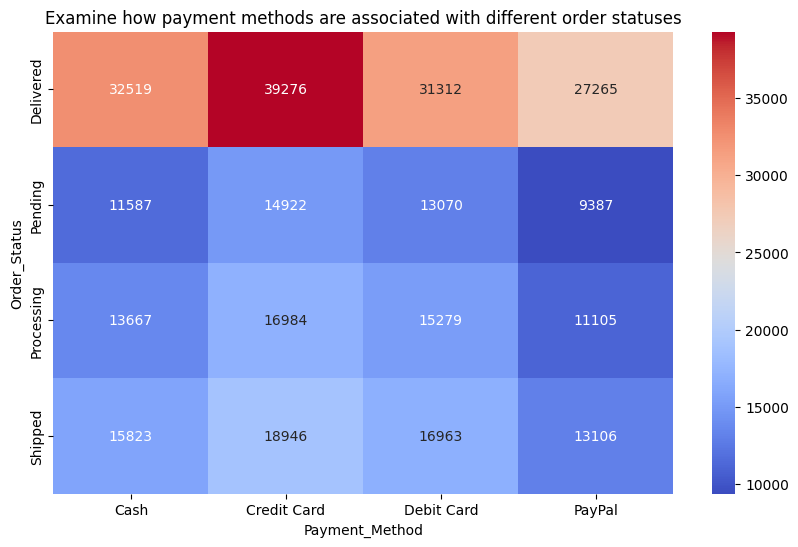

In [149]:
# Create a pivot table to aggregate counts
pivot_table = df.pivot_table(index='Order_Status', columns='Payment_Method', aggfunc='size')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('Examine how payment methods are associated with different order statuses')
plt.xlabel('Payment_Method')
plt.ylabel('Order_Status')
plt.show()

#Numerical And Categorical Bivariate Analysis

* Strip Plot: Display the distribution of a numerical variable for each category in a categorical variable, with individual data points.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



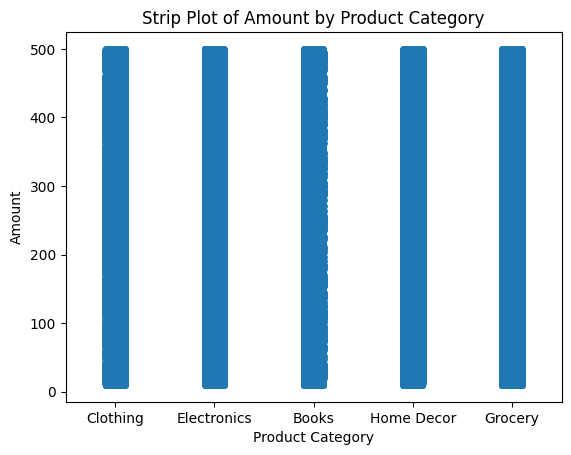

In [150]:
sns.stripplot(x='Product_Category', y='Amount', data=df, jitter=True)
plt.title('Strip Plot of Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Amount')
plt.show()



<Axes: ylabel='Frequency'>

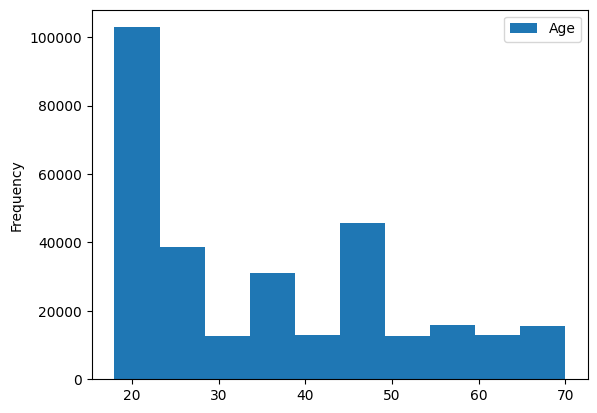

In [151]:
df[['Age','Gender']].plot(kind='hist')

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



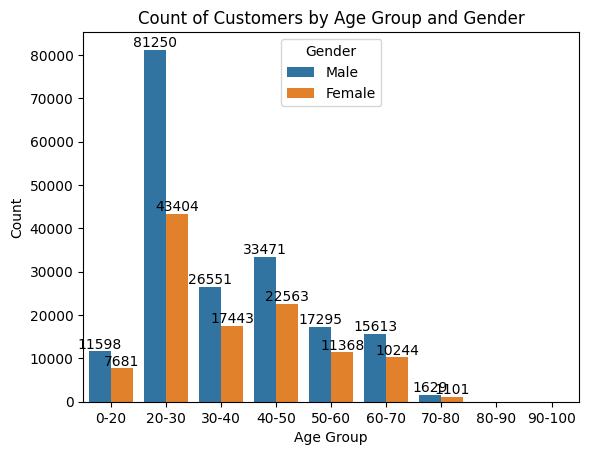

In [152]:
# now we devide it using age group count plot
# Define age groups
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Plot age groups count for each gender
age_grp = sns.countplot(data=df, x="Age Group", hue='Gender',alpha=1)

#if i want to show total men and women on plot then i use here this method is called label
for bars in age_grp.containers:
    age_grp.bar_label(bars)

age_grp.set_title('Count of Customers by Age Group and Gender')
age_grp.set_xlabel('Age Group')
age_grp.set_ylabel('Count')
plt.show()

### From above bars we can see here most of young age mens btw  20-30 age buyers

# Box plot with Hue

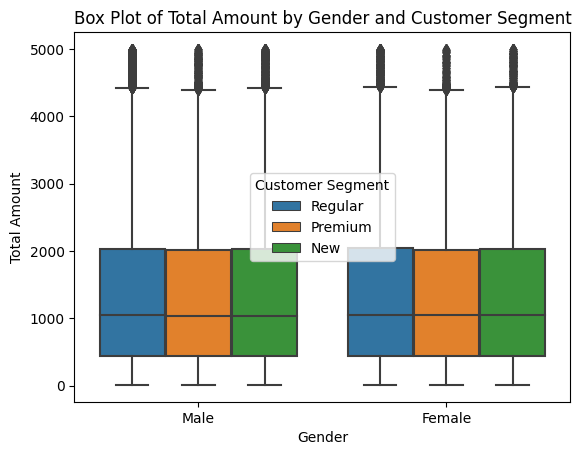

In [153]:
sns.boxplot(x='Gender', y='Total_Amount', hue='Customer_Segment', data=df)
plt.title('Box Plot of Total Amount by Gender and Customer Segment')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.legend(title='Customer Segment')
plt.show()


# Numeric - Categorical Scatter plot

* Pair Grid:  Create a grid of pairwise plots for multiple numerical variables to visualize their relationships.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



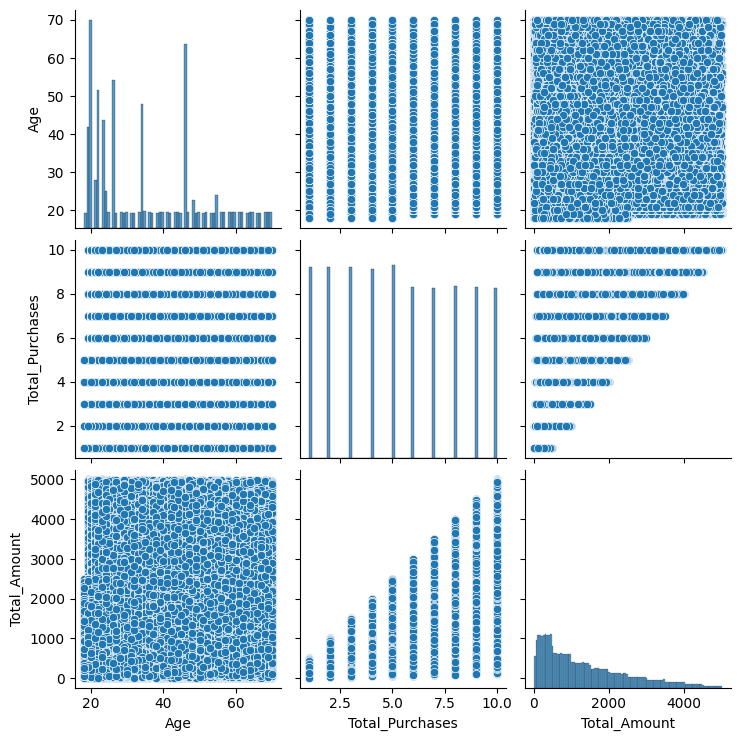

In [154]:
sns.pairplot(df[['Age', 'Total_Purchases', 'Total_Amount']])
plt.show()


#Use Cases : (EDA):Exploratory Data Analysis

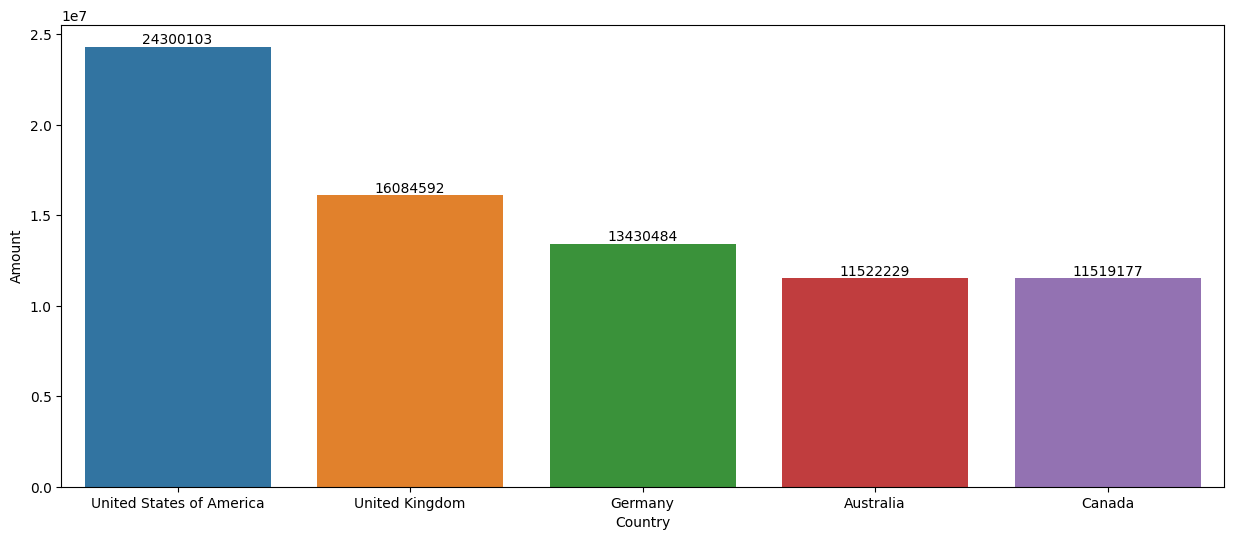

In [155]:
plt.figure(figsize=(15,6))
sales_loc=df.groupby(['Country'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(data=sales_loc, x='Country', y='Amount')
ax=plt.gca()
# Add annotations above the bars using containers
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')

plt.show()


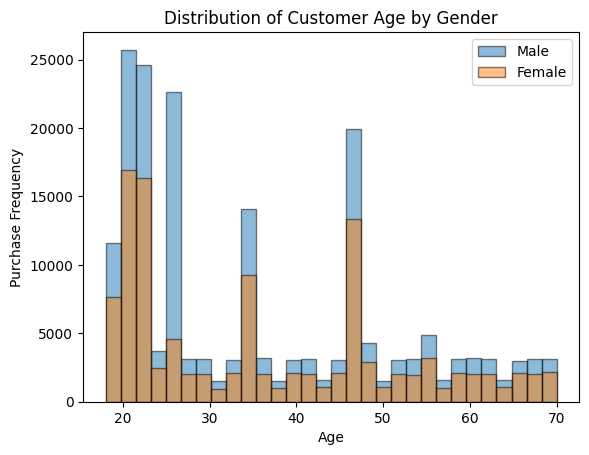

In [156]:
# now we create a histogram for see which age's people perchase product more
# Separate data by gender
male_age = df[df['Gender'] == 'Male']['Age']
female_age = df[df['Gender'] == 'Female']['Age']

# Create a histogram with age bins for both genders
plt.hist(male_age, bins=30, edgecolor='black', alpha=0.5, label='Male')
plt.hist(female_age, bins=30, edgecolor='black', alpha=0.5, label='Female')

plt.title('Distribution of Customer Age by Gender')
plt.xlabel('Age')
plt.ylabel('Purchase Frequency')
plt.legend()
plt.show()

# hist Plot of the total Amount and their frequiency

Text(0.5, 1.0, 'HistPlot of the total Amount Frequency wise')

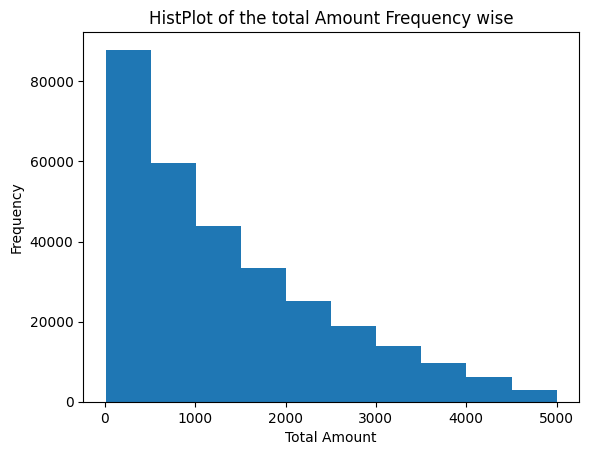

In [157]:
df['Total_Amount'].plot(kind='hist')
plt.xlabel('Total Amount')
plt.title('HistPlot of the total Amount Frequency wise')

* Here we get total Number of Person that purchase price is this ...

<Axes: xlabel='Order_Status', ylabel='count'>

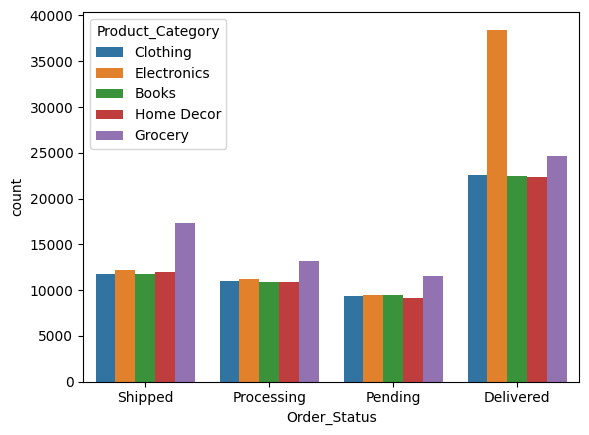

In [158]:
sns.countplot(data=df, x='Order_Status',hue= 'Product_Category')

**Product Category wise we can see that here electronics is more delivered**

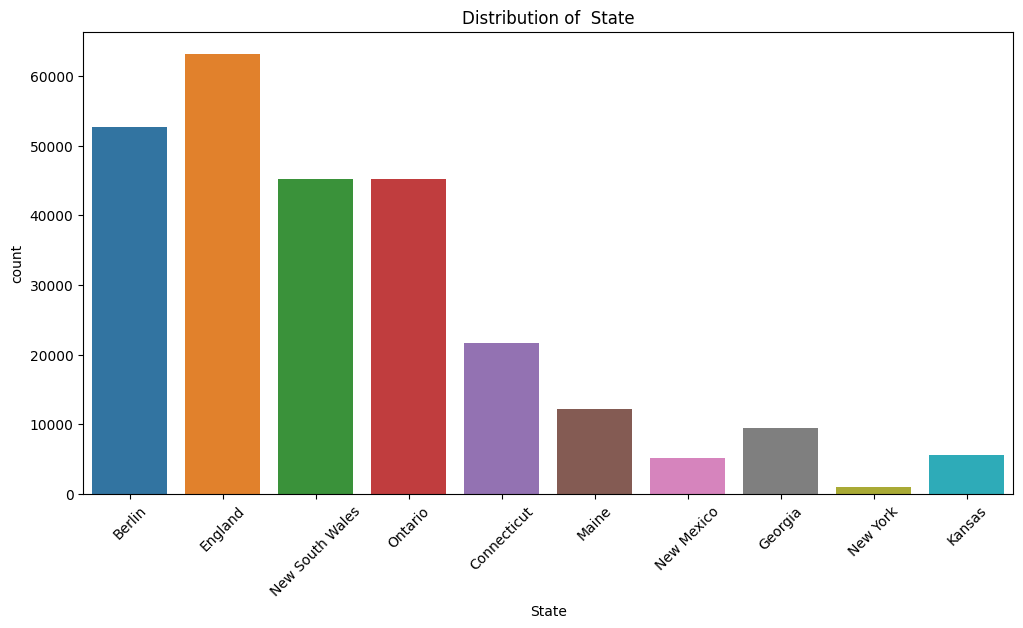

In [159]:
# top_10_States
top_10_state = df['State'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['State'].isin(top_10_state.index)], x='State')
plt.xlabel('State')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=45)
plt.show()

**Now here you can see that most buyers from the state name is England**

# Checking age group betwen 20 to 30  which type product purchase

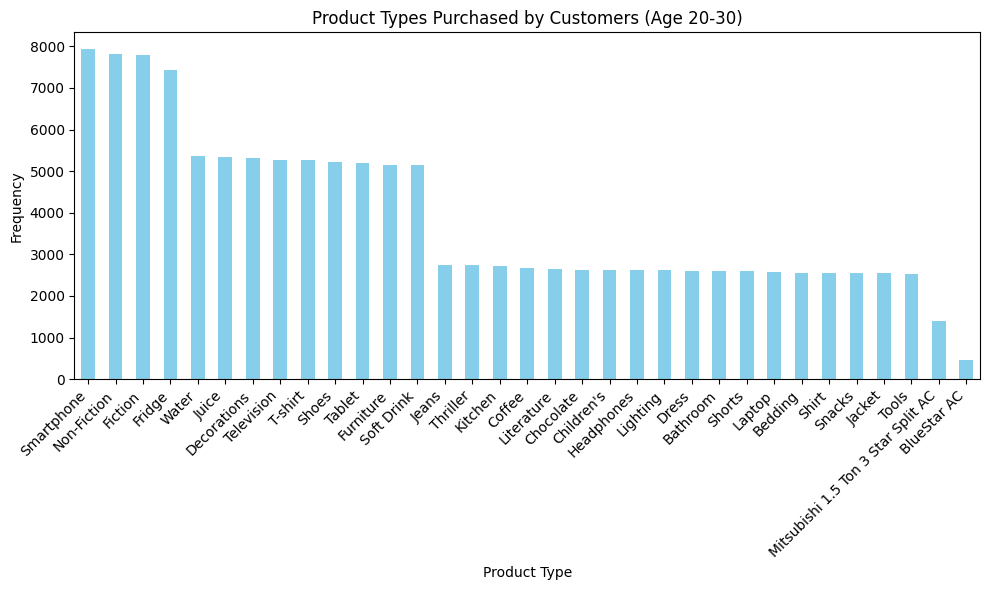

In [160]:
age_group_df = df[(df['Age'] >= 20) & (df['Age'] <= 30)]

product_type_counts = age_group_df['Product_Type'].value_counts()

plt.figure(figsize=(10, 6))
product_type_counts.plot(kind='bar', color='skyblue')
plt.title('Product Types Purchased by Customers (Age 20-30)')
plt.xlabel('Product Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**you can see that most buyers from age group 20-30 is smartphone**

#Which Age group give bad feedback based on which state with product name

In [161]:
# Filter data for bad feedback
bad_feedback_df = df[df['Feedback'] == 'Bad']

# Group data by Age, State, and Product_Type and calculate count
age_state_product_counts = bad_feedback_df.groupby(['Age', 'State', 'Product_Type']).size().reset_index(name='Count')

# Pivot the table to prepare for heatmap
pivot_table = age_state_product_counts.pivot_table(index=['Age', 'State'], columns='Product_Type', values='Count', aggfunc='sum', fill_value=0)

# Map product type codes to their original names
product_type_map = dict(zip(age_state_product_counts['Product_Type'], age_state_product_counts['Product_Type']))

# Format product names vertically
formatted_product_names = [f'<br>'.join(product_type_map[product_type_code].split()) for product_type_code in pivot_table.columns]

# Create a dictionary to map state codes to their original names
state_map = dict(zip(bad_feedback_df['State'], bad_feedback_df['State']))

# Increase the size of heatmap cells for better visibility
z_values = pivot_table.values * 10  # You can adjust the multiplier to increase the size further

# Define the colorscale for the heatmap
colorscale = [
    [0, 'blue'],    # Color for values <= 0
    [0.3, 'lightblue'],  # Color for values around the midpoint (300)
    [0.6, 'red'],      # Color for values around the midpoint (300)
    [1, 'red']      # Color for values >= 600
]

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=z_values,
    x=pivot_table.columns,
    y=pivot_table.index.get_level_values('State') + ' - ' + pivot_table.index.get_level_values('Age').astype(str),
    colorscale=colorscale,
    hoverongaps=True,
    hovertemplate='Product Type: %{x}<br>' +
                  'State Name - Age: %{y}<br>' +
                  'Count: %{z}<extra></extra>',
    text=pivot_table.index.get_level_values('Age'),
    textfont=dict(size=14)  # Increase the text size for better visibility
))


fig.update_layout(
    title='Distribution of Bad Feedback by Age, State, and Product Type',
    xaxis_title='Product Type',
    yaxis_title='State Name - Age',
    width=1000,
    height=600,
    coloraxis_colorbar=dict(
        thickness=25,  # Increase the thickness of the colorbar
        len=0.75,     # Increase the length of the colorbar
        dtick=100,    # Increase the spacing between color bands
    )
)

fig.show()

#note :
**The "Count" in the hover template represents the number of occurrences of a specific product type in a particular state and age group. It indicates how many times customers in that state and age group provided feedback categorized as "Bad" for the corresponding product type.**

#which Country purchase more product which type product analyse it

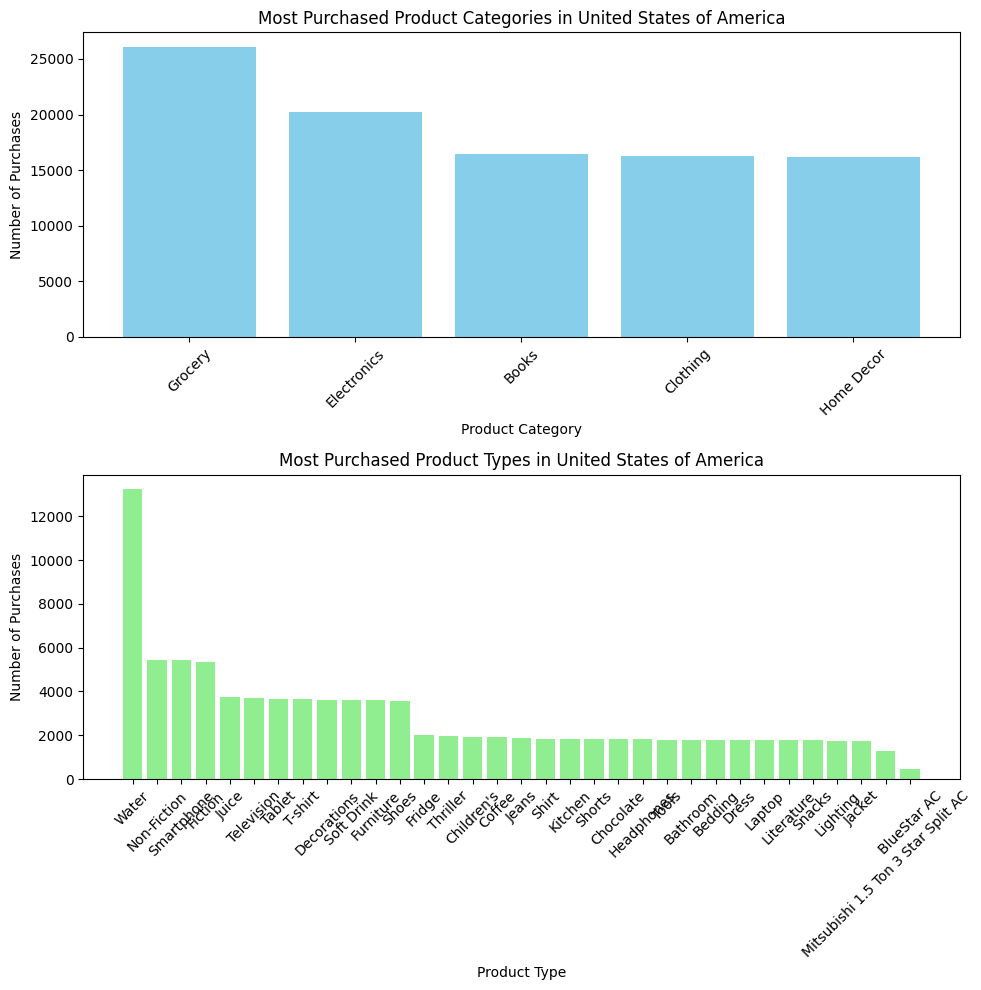

In [162]:
# Group the data by country and count the total number of purchases
country_purchase_counts = df['Country'].value_counts()

# Get the country with the highest number of purchases
top_country = country_purchase_counts.idxmax()

# Filter the data for the top country
top_country_df = df[df['Country'] == top_country]

# Group the filtered data by product category and count the occurrences
category_counts = top_country_df['Product_Category'].value_counts()

# Group the filtered data by product type and count the occurrences
type_counts = top_country_df['Product_Type'].value_counts()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

#  bar plot for product categories
ax1.bar(category_counts.index, category_counts.values, color='skyblue')
ax1.set_title('Most Purchased Product Categories in {}'.format(top_country))
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Number of Purchases')
ax1.tick_params(axis='x', rotation=45)

#  bar plot for product types
ax2.bar(type_counts.index, type_counts.values, color='lightgreen')
ax2.set_title('Most Purchased Product Types in {}'.format(top_country))
ax2.set_xlabel('Product Type')
ax2.set_ylabel('Number of Purchases')
ax2.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

#From which state and country provide bad feedbacks good and avg , excellent now we check it

<Figure size 1200x800 with 0 Axes>

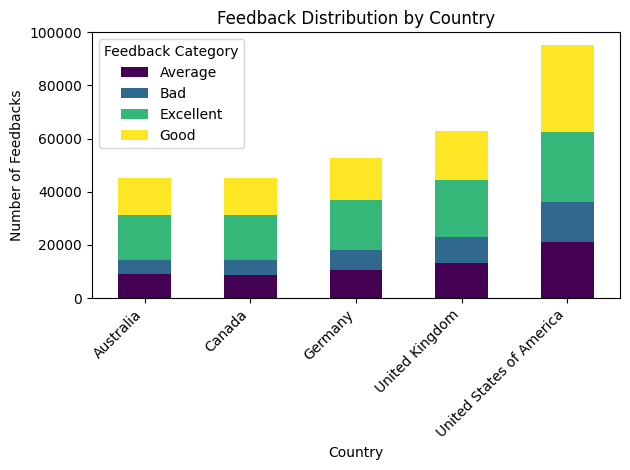

In [163]:
# Filter the dataset for rows with feedback types 'Bad', 'Good', 'Excellent', and 'Average'
feedback_categories = ['Bad', 'Good', 'Excellent', 'Average']
feedback_df = df[df['Feedback'].isin(feedback_categories)]

# Group the data by country and feedback category and count occurrences
country_feedback_counts = feedback_df.groupby(['Country', 'Feedback']).size().unstack(fill_value=0)

# Create the stacked bar plot
plt.figure(figsize=(12, 8))
country_feedback_counts.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Feedback Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Feedbacks')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Feedback Category')
plt.tight_layout()
plt.show()

#To show which type of product received feedback From each country

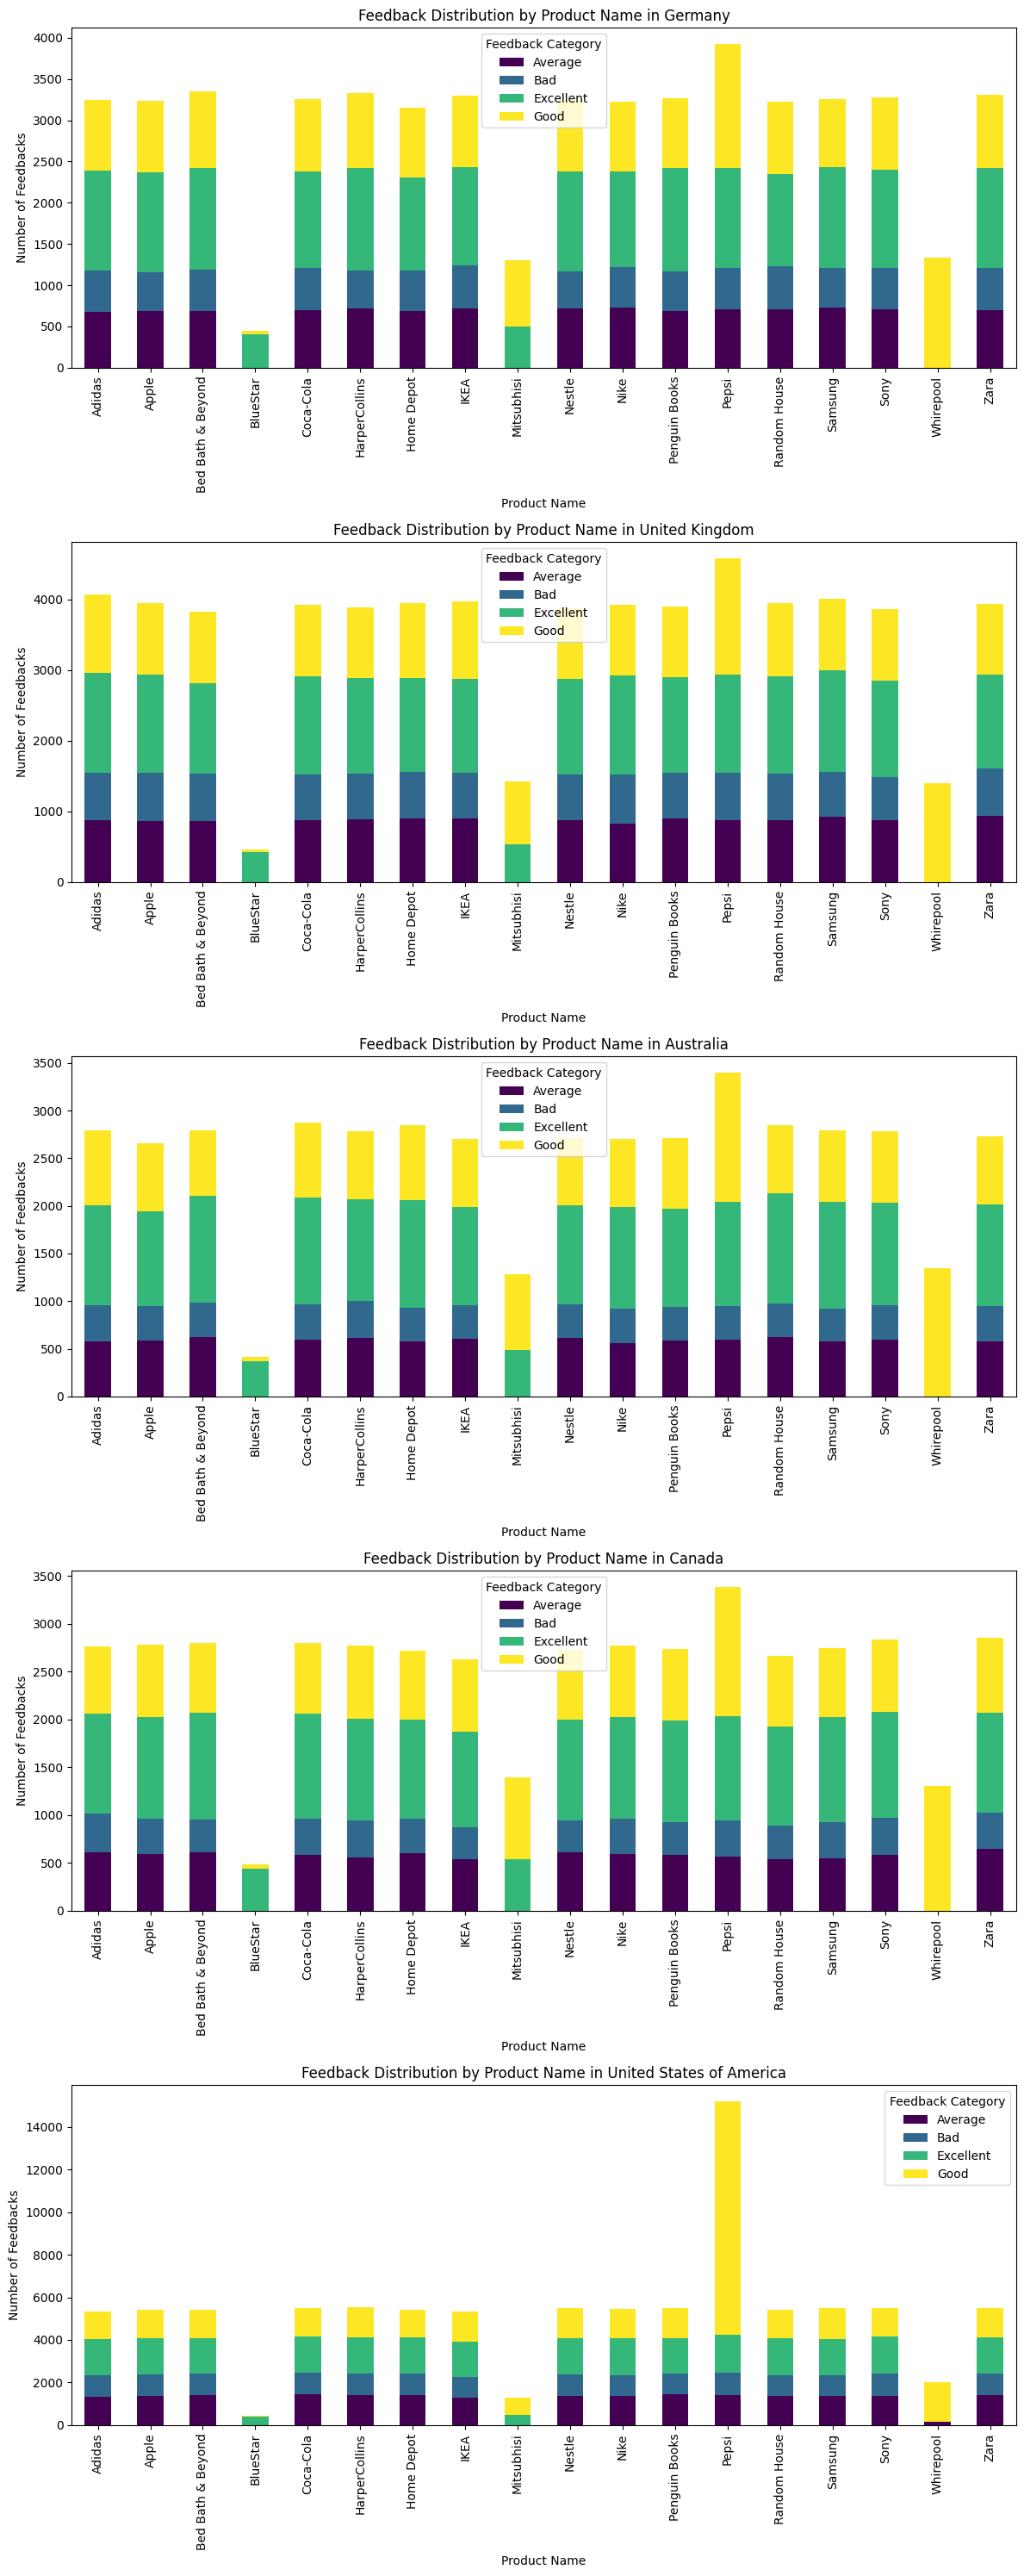

In [164]:
# Filter the dataset for rows with feedback types 'Bad', 'Good', 'Excellent', and 'Average'
feedback_categories = ['Bad', 'Good', 'Excellent', 'Average']
feedback_df = df[df['Feedback'].isin(feedback_categories)]

# Group the data by country, product name, and feedback category and count occurrences
country_product_name_feedback_counts = feedback_df.groupby(['Country', 'Product_Brand', 'Feedback']).size().unstack(fill_value=0)

# Get unique countries in the dataset
countries = df['Country'].unique()

# Create subplots for each country
fig, axes = plt.subplots(len(countries), figsize=(12, 6 * len(countries)))

# Iterate over each country
for i, country in enumerate(countries):
    # Filter the data for the current country
    country_product_name_feedback_counts_country = country_product_name_feedback_counts.loc[country]

    # Plot the stacked bar plot for the current country
    country_product_name_feedback_counts_country.plot(kind='bar', stacked=True, ax=axes[i], cmap='viridis')
    axes[i].set_title('Feedback Distribution by Product Name in {}'.format(country))
    axes[i].set_xlabel('Product Name')
    axes[i].set_ylabel('Number of Feedbacks')
    axes[i].legend(title='Feedback Category')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**Now you can See here list of country which product mostly get feedback bad, good, excellent like that ...**

# which country and their state which product brand more sale and generate more profite

In [165]:
country_state_brand_sales_profit = df.groupby(['Country', 'State', 'Product_Brand','Product_Type'])[['Total_Purchases', 'Total_Amount']].sum()

# Get the indices of maximum sales and profit for each country and state
max_sales_indices = country_state_brand_sales_profit.groupby(['Country', 'State'])['Total_Purchases'].idxmax()# used to return the index of the first occurrence of the maximum value
max_profit_indices = country_state_brand_sales_profit.groupby(['Country', 'State'])['Total_Amount'].idxmax()

# Get the product brands with maximum sales and profit for each country and state
max_sales_brands = country_state_brand_sales_profit.loc[max_sales_indices]
max_profit_brands = country_state_brand_sales_profit.loc[max_profit_indices]

# Plot the results for maximum sales
fig = go.Figure()
for index, row in max_sales_brands.reset_index().iterrows():
    fig.add_trace(go.Bar(x=[f"{row['Country']} - {row['State']} - {row['Product_Brand']}"], y=[row['Total_Purchases']],
                         name=row['Product_Brand'], marker_color='skyblue'))
fig.update_layout(title='Product Brands with Maximum Sales in Each State of Each Country',
                  xaxis_title='Country - State', yaxis_title='Total Purchases', xaxis_tickangle=-45)
fig.show()

# Plot the results for maximum profit
fig = go.Figure()
for index, row in max_profit_brands.reset_index().iterrows():
    fig.add_trace(go.Bar(x=[f"{row['Country']} - {row['State']} - {row['Product_Type']}"], y=[row['Total_Amount']],
                         name=row['Product_Brand'], marker_color='lightgreen'))
fig.update_layout(title='Product Brands with Maximum Profit in Each State of Each Country',
                  xaxis_title='Country - State', yaxis_title='Total Amount', xaxis_tickangle=-45)
fig.show()

#total amount generated per month for each product category and country

In [166]:
# Group the data by country, month, and product category, and sum the total amount
country_month_category_amount = df.groupby(['Country', 'Month', 'Product_Category'])['Total_Amount'].sum().reset_index()

# Pivot the DataFrame to have country as rows, month as columns, and total amount as values
pivot_table = country_month_category_amount.pivot_table(index='Country', columns='Month', values='Total_Amount', aggfunc='sum')

# Create the heatmap plot using Plotly
fig = go.Figure(data=go.Heatmap(
    z=pivot_table.values,
    x=pivot_table.columns,
    y=pivot_table.index,
    colorscale='Viridis',
    text=pivot_table.values,
    texttemplate='%{text:.2f}'
))

# Customize layout
fig.update_layout(
    title='Total Amount Generated per Month and Product Category',
    xaxis_title='Month',
    yaxis_title='Country',
    yaxis_autorange='reversed',
    width=1400,
    height=800
)

fig.show()

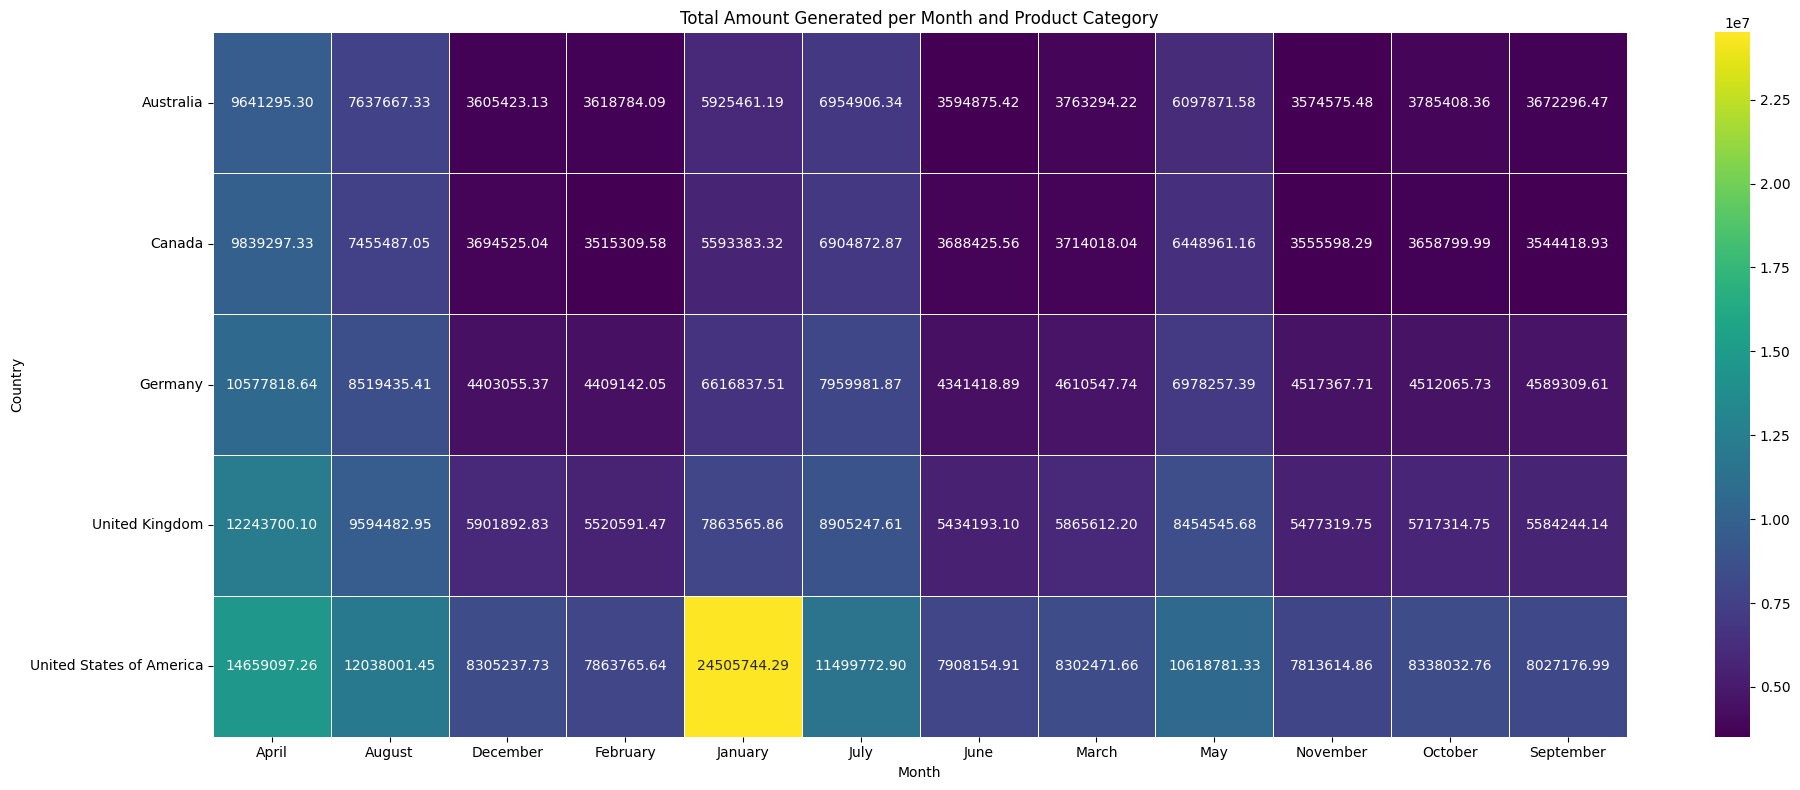

In [167]:
# Group the data by country, month, and product category, and sum the total amount
country_month_category_amount = df.groupby(['Country', 'Month', 'Product_Category'])['Total_Amount'].sum().reset_index()

# Pivot the DataFrame to have country as rows, month as columns, and total amount as values
pivot_table = country_month_category_amount.pivot_table(index='Country', columns='Month', values='Total_Amount', aggfunc='sum')

# Create the heatmap plot
plt.figure(figsize=(20, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='.2f', linewidths=.5)
plt.title('Total Amount Generated per Month and Product Category')
plt.xlabel('Month')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

#Total month wise trends on product category

In [168]:
import plotly.graph_objects as go
import pandas as pd

# Group the data by country, month, and product category, and sum the total amount
country_month_category_amount = df.groupby(['Country', 'Month', 'Product_Category'])['Total_Amount'].sum().reset_index()

# Pivot the DataFrame to have country and product category as rows, month as columns, and total amount as values
pivot_table = country_month_category_amount.pivot_table(index=['Country', 'Product_Category'], columns='Month', values='Total_Amount', aggfunc='sum')

# Concatenate country and product category names for y-axis labels
y_labels = [f"{country} - {category}" for country, category in pivot_table.index]

# Create the heatmap plot
fig = go.Figure(data=go.Heatmap(
    z=pivot_table.values,
    x=pivot_table.columns,
    y=y_labels,
    colorscale='Viridis',
    hoverongaps=False
))

fig.update_layout(
    title='Total Amount Generated per Month, Country, and Product Category',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Country - Product Category'),
    width=1500,
    height=700
)

fig.show()


#from which country retailers generate more prifit their pie chart

In [169]:

country_profit = df.groupby('Country')['Total_Amount'].sum().reset_index()

top_country = country_profit.loc[country_profit['Total_Amount'].idxmax()]

labels = country_profit['Country'].tolist()
values = country_profit['Total_Amount'].tolist()


fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, sort=False)])

# Add percentage and message for the country with the highest profit in the center hole
center_text = f"<b>{top_country['Country']}</b><br>{top_country['Total_Amount']:.2f}<br>has generated the highest profit"
fig.update_layout(annotations=[dict(text=center_text, showarrow=False)], width=1600, height=600)

# Add hover text to show profit percentage for each country
fig.update_traces(hoverinfo='label+percent')


fig.show()

#Sales trend Analysis over time for understand seasonal trends

In [170]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [171]:
sales_trend = df.groupby(['Year', 'Month'])['Total_Amount'].sum().reset_index()
sales_trend['Date'] = sales_trend['Year'].astype(str) + '-' + sales_trend['Month'].astype(str).str.zfill(2)
fig = px.line(sales_trend, x='Date', y='Total_Amount', markers=True,
              labels={'Total_Amount': 'Total Sales Amount', 'Date': 'Years And Months Wise Representation'},
              title='Sales Trend Analysis over Time')
fig.update_layout(xaxis_tickangle=-45, xaxis=dict(tickformat="%Y-%m"), yaxis_title='Total Sales Amount')
fig.show()

**Here we can see that from march to april month the sales trend goes down after that similarly it was for other month this graph up and down and suddunly from 2024 month 1 to 2 it was total goes down from genearate profit**

#Now we check Product trends on category wise

In [172]:
sales_trend = df.groupby(['Product_Category', 'Year', 'Month'])['Total_Amount'].sum().reset_index()
sales_trend['Date'] = sales_trend['Year'].astype(str) + '-' + sales_trend['Month'].astype(str).str.zfill(2)

fig = px.line(sales_trend, x='Date', y='Total_Amount', color='Product_Category',
              labels={'Total_Amount': 'Total Sales Amount', 'Date': 'Years And Months Wise Representation'},
              title='Sales Trend Analysis over product category and monthwise')
fig.update_layout(xaxis_tickangle=-45, xaxis=dict(tickformat="%Y-%m"), yaxis_title='Total Sales Amount')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



#Sales trends over a product type

* Here i used face grid method for better product type see in different subplotwise

In [173]:
# Grouping by Product_Type, Year, and Month to get total sales amount
sales_trend = df.groupby(['Product_Type', 'Year', 'Month'])['Total_Amount'].sum().reset_index()

# Creating a 'Date' column by combining Year and Month
sales_trend['Date'] = sales_trend['Year'].astype(str) + '-' + sales_trend['Month'].astype(str).str.zfill(2)

# Plotting the sales trend using Plotly
fig = px.line(sales_trend, x='Date', y='Total_Amount', color='Product_Type',
              labels={'Total_Amount': 'Total Sales Amount', 'Date': 'Years And Months Wise Representation'},
              title='Sales Trend Analysis over Product Types and Monthwise')
fig.update_layout(xaxis_tickangle=-45, xaxis=dict(tickformat="%Y-%m"), yaxis_title='Total Sales Amount')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [174]:
import pandas as pd

In [175]:
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

df['Month'] = df['Date'].dt.month.map(month_names).astype('category')

#  Ratings for different Products across different States and Product Types

In [176]:
# Create a cross-tabulation of State, Products with mean Ratings
pivot_table = pd.pivot_table(df, values='Ratings', index=['State'], columns='products', aggfunc='mean')

fig = go.Figure(data=go.Heatmap(
    z=pivot_table.values,
    x=pivot_table.columns,
    y=pivot_table.index,
    colorscale='Viridis',
    colorbar=dict(title='Ratings')
))

fig.update_layout(
    title='Heatmap of Ratings by State and Products',
    xaxis=dict(title='Products'),
    yaxis=dict(title='State'),
)
fig.show()


In [177]:
df.columns

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products', 'Age Group'],
      dtype='object')

# Recommendation System Model :
* This model Is Suggest Products to the customers that rating have more then 3 also not suggest products that ratings have very bad.
* Above 3 ratings products suggested to the Customers .



# Recommendation System Model : It can Suggest the higher ratings based products to the Customers.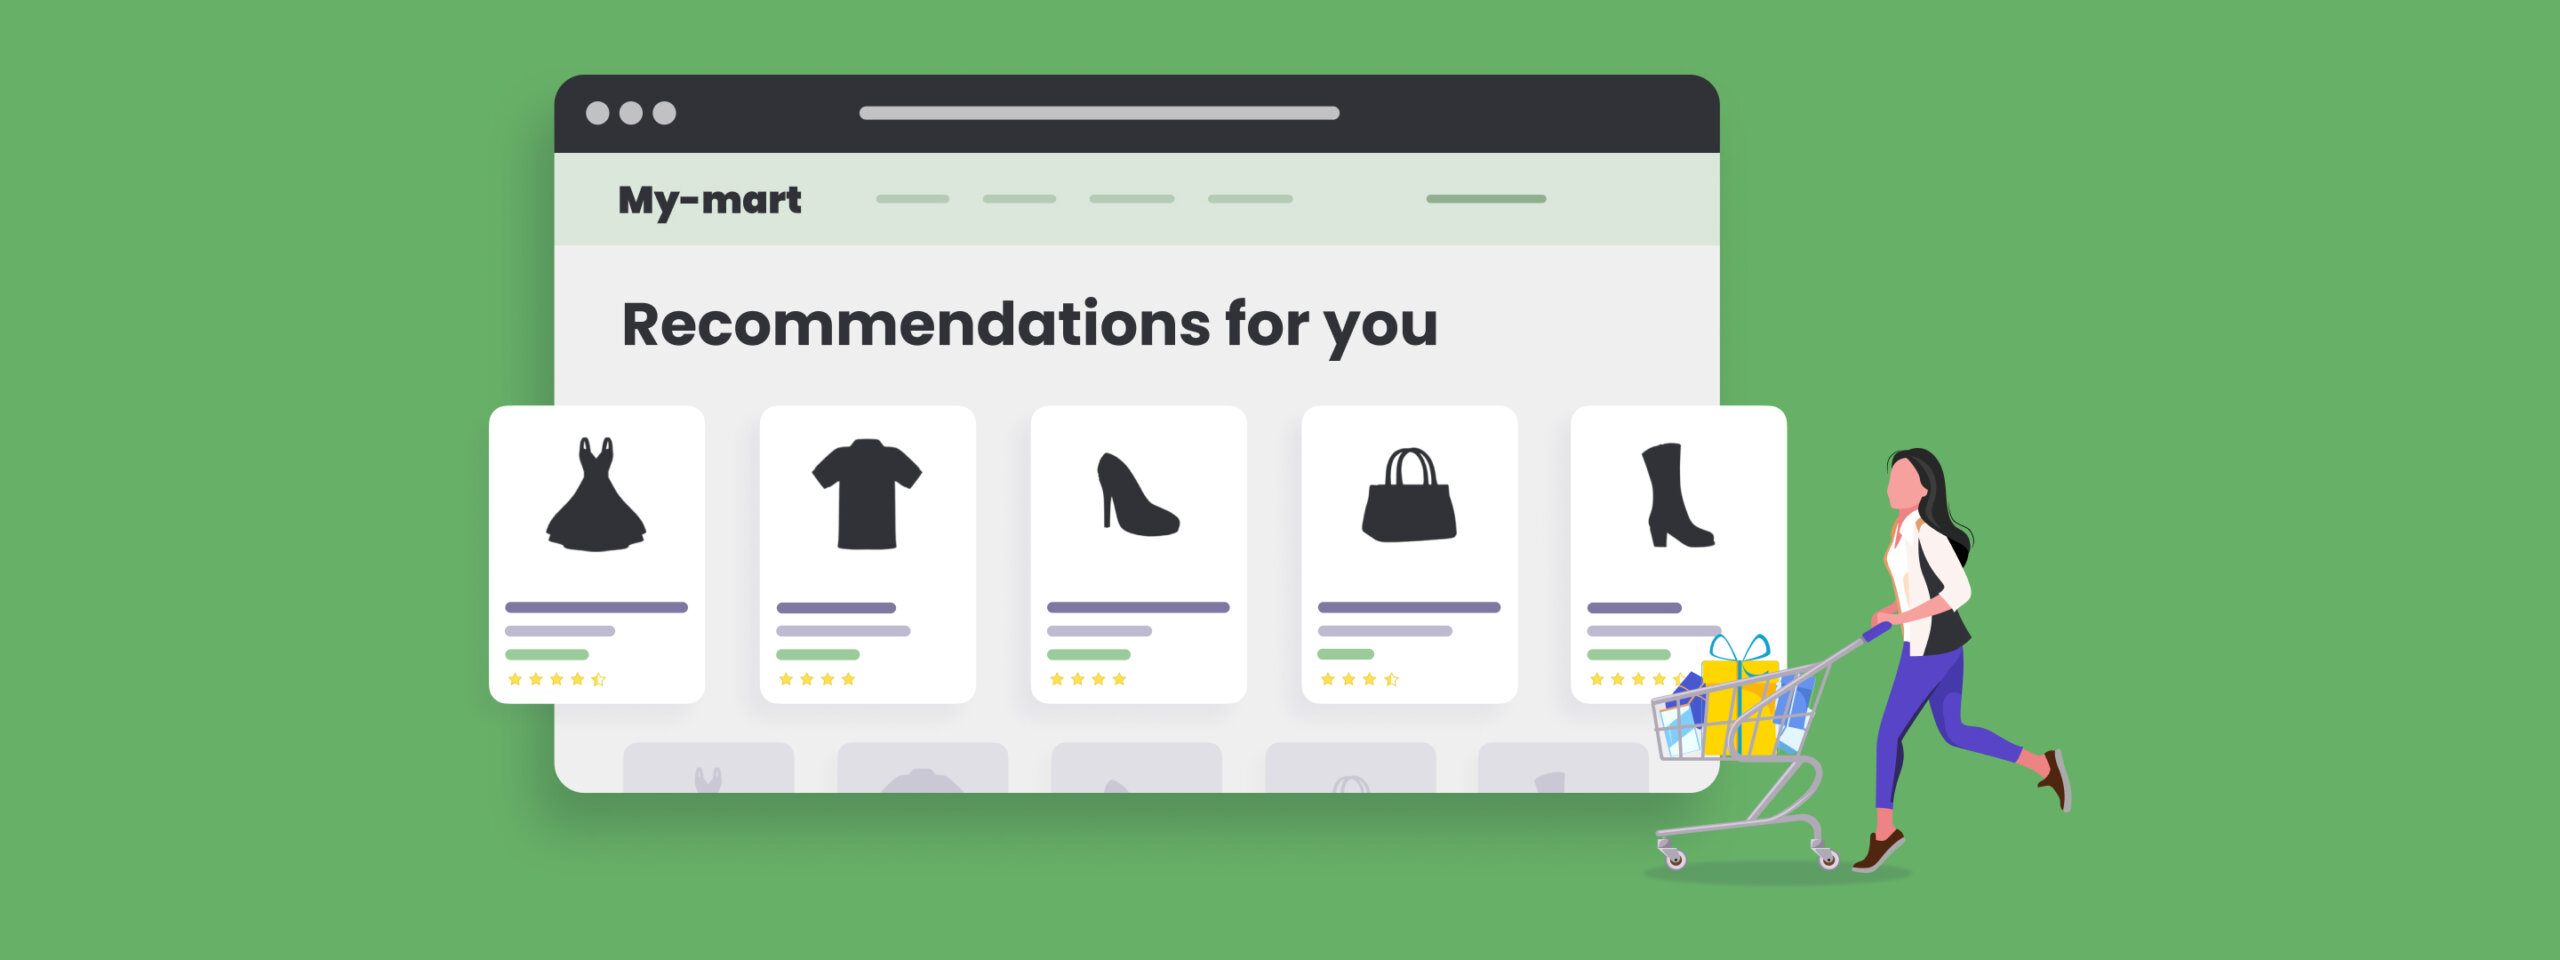

In [178]:
# import pandas as pd
# from prettytable import PrettyTable
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

# def welcome_message():
#     print("Welcome to our retail store!")
#     print("Please select one of the following options:")
#     print("1. Check Your Details")
#     print("2. Search Products")
#     print("3. Total Amount Spend By You")
#     print("4. Your Order Status")
#     print("5. Exit")

# def check_details():
#     customer_id = input("Enter your Customer ID: ")
#     try:
#         customer_id = int(customer_id)
#         if customer_id in df['Customer_ID'].unique():
#             customer_info = df[df['Customer_ID'] == customer_id]
#             print("Customer Details:")
#             display_table(customer_info)
#             while True:
#                 print("\n1. Exit")
#                 print("2. Proceed")
#                 try:
#                     choice = int(input("Enter your choice: "))
#                     if choice == 1:
#                         return False
#                     elif choice == 2:
#                         return True
#                     else:
#                         print("Please enter a valid choice!")
#                 except ValueError:
#                     print("Please enter a number!")
#         else:
#             print("Invalid Customer ID!")
#             return True
#     except ValueError:
#         print("Please enter a valid customer ID (numeric value)!")
#         return True

# def display_table(data):
#     table = PrettyTable()
#     table.field_names = ['Attribute', 'Value']
#     if isinstance(data, pd.DataFrame):
#         for index, row in data.iterrows():
#             for col in data.columns:
#                 table.add_row([col, row[col]])
#     elif isinstance(data, pd.Series):
#         for index, value in data.items():
#             table.add_row([index, value])
#     print(table)

# def search_products():
#     print("Select a product category:")
#     categories = df['Product_Category'].unique()
#     for i, category in enumerate(categories, 1):
#         print(f"{i}. {category}")
#     try:
#         category_choice = int(input("Enter the number corresponding to your choice: "))
#         selected_category = categories[category_choice - 1]
#         print(f"\nSelect a brand within the '{selected_category}' category:")

#         # Filter brands based on selected category
#         brands_in_category = df[df['Product_Category'] == selected_category]['Product_Brand'].unique()

#         for i, brand in enumerate(brands_in_category, 1):
#             print(f"{i}. {brand}")
#         brand_choice = int(input("Enter the number corresponding to your choice: "))
#         selected_brand = brands_in_category[brand_choice - 1]

#         print(f"\nSelect a product type within the '{selected_brand}' brand and '{selected_category}' category:")

#         # Filter product types based on selected category and brand
#         product_types_in_brand = df[(df['Product_Category'] == selected_category) & (df['Product_Brand'] == selected_brand)]['Product_Type'].unique()

#         for i, product_type in enumerate(product_types_in_brand, 1):
#             print(f"{i}. {product_type}")
#         product_type_choice = int(input("Enter the number corresponding to your choice: "))
#         selected_product_type = product_types_in_brand[product_type_choice - 1]
#         products = df[df['Product_Type'] == selected_product_type].head(3)
#         print("\nProducts based on your selected type:")
#         display_table(products[['products', 'Amount']])

#         recommendations = df[(df['Product_Type'] == selected_product_type) & (df['Ratings'].isin([3, 4, 5]))].head(3)
#         print("\nRecommendations of Products For You:")
#         display_table(recommendations[['products', 'Amount', 'Ratings']])
#         return True
#     except (ValueError, IndexError):
#         print("Please enter a valid choice!")


# def total_amount_spend():
#     customer_id = input("Enter your Customer ID: ")
#     try:
#         customer_id = int(customer_id)
#         if customer_id in df['Customer_ID'].unique():
#             total_spent = df[df['Customer_ID'] == customer_id]['Total_Amount'].sum()
#             print(f"Total Amount Spent By You: ${total_spent}")
#             while True:
#                 print("\n1. Proceed")
#                 print("2. Exit")
#                 try:
#                     choice = int(input("Enter your choice: "))
#                     if choice == 1:
#                         return True
#                     elif choice == 2:
#                         return False
#                     else:
#                         print("Please enter a valid choice!")
#                 except ValueError:
#                     print("Please enter a number!")
#         else:
#             print("Invalid Customer ID!")
#             return True
#     except ValueError:
#         print("Please enter a valid customer ID (numeric value)!")
#         return True

# def order_status():
#     customer_id = input("Enter your Customer ID: ")
#     try:
#         customer_id = int(customer_id)
#         if customer_id in df['Customer_ID'].unique():
#             order_status = df[df['Customer_ID'] == customer_id]['Order_Status'].iloc[0]
#             print(f"Your Order Status: {order_status}")
#             while True:
#                 print("\n1. Proceed")
#                 print("2. Exit")
#                 try:
#                     choice = int(input("Enter your choice: "))
#                     if choice == 1:
#                         return True
#                     elif choice == 2:
#                         return False
#                     else:
#                         print("Please enter a valid choice!")
#                 except ValueError:
#                     print("Please enter a number!")
#         else:
#             print("Invalid Customer ID!")
#             return True
#     except ValueError:
#         print("Please enter a valid customer ID (numeric value)!")
#         return True

# def welcome_menu():
#     while True:
#         welcome_message()
#         try:
#             choice = int(input("Enter your choice: "))
#             if choice == 1:
#                 if not check_details():
#                     return
#             elif choice == 2:
#                 if not search_products():
#                     return
#             elif choice == 3:
#                 if not total_amount_spend():
#                     return
#             elif choice == 4:
#                 if not order_status():
#                     return
#             elif choice == 5:
#                 print("Thank you for visiting our retail store. Goodbye!")
#                 return
#             else:
#                 print("Please enter a valid choice!")
#         except ValueError:
#             print("Please enter a number!")


# welcome_menu()


#Conclusion : After Complete Analysis this data i predict so many insights form it  
* During Finding Insight i face so many challanges to convert the columns in to different data type also

* it face Challanges to totally clean the dirty data from this dataset
* I Resolved All the dirty data issues from the dataset
* I Also Perform Different Assessment Processes
* Manual And Automatic Assesssment dome bu me
* I Detailed Explain each columns and about my dataset descriptions
* I also perform Univariate and Bivariate Analysis on Different columns wise like single columns wise and double columns wise

* Solution : After this Analysis i findout which types of product has get bad feedback so it need improvement on that and also which types of  product was more selected by person on which area so we can improve our marketing stratages
* Now After that i need to make recommandation system for better customer preferences
* Which Country wise which types of product more purchased i also findout it
* from which country retailers generate more prifit their pie chart
* total amount generated per month for each product category and country
*Sales trend Analysis over time for understand seasonal trends
* Sales Trand over a month and year checking
* Sales Trend over product type
* Sales TREND over Product Category
* Model Deelopment based on  python : Recommendation System That Suggest Customer best rating based their search related Products to the Customer .

# Note:TfidfVectorizer
* **TfidfVectorizer from sklearn.feature_extraction.text
Purpose: The TfidfVectorizer is used to convert a collection of raw text documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features.**

* How it works:

* TF (Term Frequency): Measures how frequently a term appears in a document. The assumption is that the more a word appears in a document, the more important it is.
* IDF (Inverse Document Frequency): Measures how important a term is in the entire corpus of documents. Words that are common across many documents (like "the", "is", "and") get lower scores.
* TF-IDF: Combines TF and IDF to calculate a weight that represents the importance of a term in a document relative to the entire corpus. This helps in downscaling the importance of terms that appear frequently across many documents and are therefore less informative.
* Usage:

* Text Processing: It is used in Natural Language Processing (NLP) to transform text data into numerical vectors that can be used by machine learning algorithms.

#Note:
* **cosine_similarity from sklearn.metrics.pairwise
Purpose: The cosine_similarity function is used to calculate the cosine similarity between vectors.**

* How it works:

* Cosine Similarity: Measures the cosine of the angle between two vectors in an inner product space. It is a measure of how similar two vectors are, regardless of their magnitude. The value ranges from -1 (exactly opposite) to 1 (exactly the same), with 0 indicating orthogonality (no similarity).
* Cosine similarity is often used in text analysis and information retrieval to measure the similarity between two documents or two sets of terms.
* Usage:

* Text Similarity: Often used to measure the similarity between documents after they have been converted into TF-IDF vectors.
* Recommendation Systems: Can be used to find similar items or users.